# STEM-Related Job Listings in the Philippines 2021
## Introduction of the Dataset
### Choice of dataset type
### Potential Uses: 
It might be beneficial to future employees and workers in the Science, Technology, Engineering, and Mathematics (STEM) field for observing job trends in the current and past hiring companies

Methods of web-scraping can be referenced for those who are interested in creating their own version for other fields

### Sources Used: 
- https://www.workbank.com/
- https://pinoyjobs.ph/
- https://www.monster.com.ph
- https://ph.joblum.com/

### Research Questions:

### Motivation

## Imports used (to be described)

* `os` - a module that provides functions to interact with the operating system.
* `pandas` - is a tool that helps analyze data.
* `numpy` - Library that contains multiple functions that help ease the work with arrays, matrices, and alike to better reassemble data.
* `json` - enables import and export from and to JSON files
* `re` - Short for Regular Expressions, help recognize patterns on strings of data and is used to orderly reassemble them.
* `gensim` - Library that efficiently handles large, unmanaged text collections of data.
* `nltk` - Short for Natural Language Toolkit. It helps the program to apply human language data to statistical natural language.
* `requests` - Requests allows the program to send HTTP requests easily.
* `Seaborn` - A library in python that is used to better visualize data through drawing informative graphs.
* `math` - Imported library that allows quick computations of mathematical tasks
* `calplot` - 
* `matplotlib.pyplot` -
* `gensim.utils` `simple_preprocess` - used to preprocess text by making them lower-cased, and transforming the words to their original form (de-tokenizing)
* `gensim.parsing.preprocessing` `STOPWORDS` - stop words common words that do not have value and are often removed in pre-processing
* `gensim` `corpora` - used to work with corpus and words
* `gensim` `models` - used for topic modelling and model training
* `nltk.stem` `WordNetLemmatizer` - used for grouping similar strings together
* `bs4` `BeautifulSoup` - library used to web scrape HTML from websites
* `datetime` `datetime` - An imported module in python to create an object that properly resembles date and time. Used for converting string of time into datetime format to month, day, and year.
* `datetime` `timedelta` - used for finding delta of time ago with time scraped if date has minutes, hours, days, or weeks ago
* `dateutil.relativedelta` `relativedelta` - used for finding delta of time ago with time scraped if date has months and years

In [1]:
import os
import pandas as pd
import numpy as np
import json
import re
import gensim
import nltk
import requests
import datetime
import seaborn as sns
import catplot
import matplotlib.pyplot as plt
import math

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

today = datetime.today()

C:\Users\Ghael\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Job Portal - WORKBANK

We will be using Beautiful Soup to scrape job posts from WorkBank.com
The following are the relevant data that we will need to take from the website.
- WORKBANK_JOB_TITLE - The title of the Job Post
- WORKBANK_JOB_CATEGORY - The category of the Job Post with relation to the STEM field 
- WORKBANK_JOB_COMPANY - The Company which is looking for applications for the Job Post
- WORKBANK_JOB_DATE - Date and time the Job Post was posted
- WORKBANK_JOB_LOCATION - Location where the Job Post is assigned to
- WORKBANK_JOB_STATUS - This determines the type of the job whether it is full time or not
- WORKBANK_JOB_SALARY - Monthly salary of the job listing in Philippine Pesos (PHP)
- WORKBANK_JOB_EDUCATION - Educational attainment requirements for the applicant
- WORKBANK_JOB_DESCRIPTION - A detailed job description
- WORKBANK_JOB_YEAR_WE - Years of Work Experience required for the job

In [2]:
WORKBANK_JOB_TITLE = []
WORKBANK_JOB_CATEGORY = []
WORKBANK_JOB_COMPANY = []
WORKBANK_JOB_DATE = []
WORKBANK_JOB_LOCATION = []
WORKBANK_JOB_STATUS = []
WORKBANK_JOB_SALARY = []
WORKBANK_JOB_EDUCATION = []
WORKBANK_JOB_DESCRIPTION = []
WORKBANK_JOB_YEAR_WE = []

### CATEGORY - Information Communications Technology

Since we are only looking for Job Posts in the STEM field, we will need to go over the website WorkBank.com and choose only the relevant categories, such as the Information Communications Technology. We will need to scrape every single page in that category result in the following code.

In [3]:
#Information Communications Technology
IT_WORKBANK_URL = 'https://www.workbank.com/job/information-communications-technology-job-openings?wb_q='
IT_WORKBANK = requests.get(IT_WORKBANK_URL)
IT_WORKBANK_soup = BeautifulSoup(IT_WORKBANK.content, 'html.parser')
IT_WORKBANK_PP = IT_WORKBANK_soup.find_all('select',{'class':'wb-pagination-select'})
if (len(IT_WORKBANK_PP)!=0):
    IT_WORKBANK_NUMPAGES=len(IT_WORKBANK_PP[0].select("option"))
else:
    IT_WORKBANK_NUMPAGES=0
IT_WORKBANK_PAGES=[]
if (IT_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        IT_WORKBANK_PAGES.append('https://www.workbank.com/job/information-communications-technology-job-openings?page='+ str(i))
else:
    IT_WORKBANK_PAGES.append('https://www.workbank.com/job/information-communications-technology-job-openings?page=1')
for i in range(len(IT_WORKBANK_PAGES)):
    IT_WORKBANK_URLs = IT_WORKBANK_PAGES[i]
    IT_WORKBANK_PAGE = requests.get(IT_WORKBANK_URLs)
    IT_WORKBANK_PAGE_soup = BeautifulSoup(IT_WORKBANK_PAGE.content, 'html.parser')
    IT_WORKBANK_JOBS = IT_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    IT_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(IT_WORKBANK_JOBS))
    IT_WORKBANK_JOB_DATEs = IT_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(IT_WORKBANK_JOB_URLs)):
        IT_WORKBANK_JOB_PAGE = requests.get(IT_WORKBANK_JOB_URLs[j])
        IT_WORKBANK_JOB_PAGE_soup = BeautifulSoup(IT_WORKBANK_JOB_PAGE.content, 'html.parser')
        IT_WORKBANK_JOB_PAGE_INFO1 = IT_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        IT_WORKBANK_JOB_TITLE = IT_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        IT_WORKBANK_JOB_COMPANY = IT_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        IT_WORKBANK_JOB_SALARY = IT_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        IT_WORKBANK_JOB_DATEPOSTED = IT_WORKBANK_JOB_DATEs[j].text.strip()
        IT_WORKBANK_JOB_LOCATION = IT_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        IT_WORKBANK_JOB_INFO2 = IT_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        IT_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        IT_WORKBANK_JOB_CATEGORY = "Information and Communications Technology"
        IT_WORKBANK_JOB_INFO3 = IT_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        IT_WORKBANK_JOB_DESCRIPTION = IT_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(IT_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(IT_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(IT_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(IT_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(IT_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(IT_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(IT_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(IT_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(IT_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(IT_WORKBANK_JOB_DESCRIPTION)

### Souptest

Getting the html of the URL of the Information Communications Technology job openings, it can be observed that it contains the list of jobs that we interested in.

In [4]:
souptest = BeautifulSoup(IT_WORKBANK.content, 'html.parser')
souptest

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><script async="" src="https://www.googletagmanager.com/gtag/js?id=GTM-TL4H9C5"></script><script> window.dataLayer = window.dataLayer || []; function gtag(){dataLayer.push(arguments);} gtag('js', new Date()); gtag('config', 'UA-120994141-1'); </script><title> Job hiring in Information Communications Technology | Find work @ Workbank </title><meta content="On a job search? You've found the right career website! Find jobs by industry. Sign up for free and find work at Workbank today!" name="description"/><meta content="website" name="og:type"><meta content="Find careers in Information Communications Technology. Sign up now!" name="og:title"><meta content="https://www.workbank.com/job/information-communications-technology-job-openings" name="og:url"/><meta content="See full list of careers in Information Communications Technology. Find work at Workbank today!" name="og:description"/><meta content="summary" name="twitter:card"/><m

### CATEGORY - Construction
The same process is done for the other sources to expand the dataset.

In [5]:
#Construction
CONSTRUCTION_WORKBANK_URL = 'https://www.workbank.com/job/construction-job-openings?wb_q='
CONSTRUCTION_WORKBANK = requests.get(CONSTRUCTION_WORKBANK_URL)
CONSTRUCTION_WORKBANK_soup = BeautifulSoup(CONSTRUCTION_WORKBANK.content, 'html.parser')
CONSTRUCTION_WORKBANK_PP = CONSTRUCTION_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(CONSTRUCTION_WORKBANK_PP)!=0):
    CONSTRUCTION_WORKBANK_NUMPAGES=len(CONSTRUCTION_WORKBANK_PP[0].select("option"))
else:
    CONSTRUCTION_WORKBANK_NUMPAGES=0
CONSTRUCTION_WORKBANK_PAGES=[]
if (CONSTRUCTION_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        CONSTRUCTION_WORKBANK_PAGES.append('https://www.workbank.com/job/construction-job-openings?page='+ str(i))
else:
    CONSTRUCTION_WORKBANK_PAGES.append('https://www.workbank.com/job/construction-job-openings?page=1')
for i in range(len(CONSTRUCTION_WORKBANK_PAGES)):
    CONSTRUCTION_WORKBANK_URLs = CONSTRUCTION_WORKBANK_PAGES[i]
    CONSTRUCTION_WORKBANK_PAGE = requests.get(CONSTRUCTION_WORKBANK_URLs)
    CONSTRUCTION_WORKBANK_PAGE_soup = BeautifulSoup(CONSTRUCTION_WORKBANK_PAGE.content, 'html.parser')
    CONSTRUCTION_WORKBANK_JOBS = CONSTRUCTION_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    CONSTRUCTION_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(CONSTRUCTION_WORKBANK_JOBS))
    CONSTRUCTION_WORKBANK_JOB_DATEs = CONSTRUCTION_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(CONSTRUCTION_WORKBANK_JOB_URLs)):
        CONSTRUCTION_WORKBANK_JOB_PAGE = requests.get(CONSTRUCTION_WORKBANK_JOB_URLs[j])
        CONSTRUCTION_WORKBANK_JOB_PAGE_soup = BeautifulSoup(CONSTRUCTION_WORKBANK_JOB_PAGE.content, 'html.parser')
        CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        CONSTRUCTION_WORKBANK_JOB_TITLE = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        CONSTRUCTION_WORKBANK_JOB_COMPANY = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        CONSTRUCTION_WORKBANK_JOB_SALARY = CONSTRUCTION_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        CONSTRUCTION_WORKBANK_JOB_DATEPOSTED = CONSTRUCTION_WORKBANK_JOB_DATEs[j].text.strip()
        CONSTRUCTION_WORKBANK_JOB_LOCATION = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        CONSTRUCTION_WORKBANK_JOB_INFO2 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        CONSTRUCTION_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(CONSTRUCTION_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(CONSTRUCTION_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        CONSTRUCTION_WORKBANK_JOB_CATEGORY = "Construction"
        CONSTRUCTION_WORKBANK_JOB_INFO3 = CONSTRUCTION_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        CONSTRUCTION_WORKBANK_JOB_DESCRIPTION = CONSTRUCTION_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(CONSTRUCTION_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(CONSTRUCTION_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(CONSTRUCTION_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(CONSTRUCTION_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(CONSTRUCTION_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(CONSTRUCTION_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(CONSTRUCTION_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(CONSTRUCTION_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(CONSTRUCTION_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(CONSTRUCTION_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Design and Architecture

In [6]:
#Design and Architecture
ARCHITECTURE_WORKBANK_URL = 'https://www.workbank.com/job/design-architecture-job-openings?wb_q='
ARCHITECTURE_WORKBANK = requests.get(ARCHITECTURE_WORKBANK_URL)
ARCHITECTURE_WORKBANK_soup = BeautifulSoup(ARCHITECTURE_WORKBANK.content, 'html.parser')
ARCHITECTURE_WORKBANK_PP = ARCHITECTURE_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(ARCHITECTURE_WORKBANK_PP)!=0):
    ARCHITECTURE_WORKBANK_NUMPAGES=len(ARCHITECTURE_WORKBANK_PP[0].select("option"))
else:
    ARCHITECTURE_WORKBANK_NUMPAGES=0
ARCHITECTURE_WORKBANK_PAGES=[]
if (ARCHITECTURE_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        ARCHITECTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/design-architecture-job-openings?page='+ str(i))
else:
    ARCHITECTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/design-architecture-job-openings?page=1')
for i in range(len(ARCHITECTURE_WORKBANK_PAGES)):
    ARCHITECTURE_WORKBANK_URLs = ARCHITECTURE_WORKBANK_PAGES[i]
    ARCHITECTURE_WORKBANK_PAGE = requests.get(ARCHITECTURE_WORKBANK_URLs)
    ARCHITECTURE_WORKBANK_PAGE_soup = BeautifulSoup(ARCHITECTURE_WORKBANK_PAGE.content, 'html.parser')
    ARCHITECTURE_WORKBANK_JOBS = ARCHITECTURE_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    ARCHITECTURE_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(ARCHITECTURE_WORKBANK_JOBS))
    ARCHITECTURE_WORKBANK_JOB_DATEs = ARCHITECTURE_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(ARCHITECTURE_WORKBANK_JOB_URLs)):
        ARCHITECTURE_WORKBANK_JOB_PAGE = requests.get(ARCHITECTURE_WORKBANK_JOB_URLs[j])
        ARCHITECTURE_WORKBANK_JOB_PAGE_soup = BeautifulSoup(ARCHITECTURE_WORKBANK_JOB_PAGE.content, 'html.parser')
        ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        ARCHITECTURE_WORKBANK_JOB_TITLE = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        ARCHITECTURE_WORKBANK_JOB_COMPANY = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        ARCHITECTURE_WORKBANK_JOB_SALARY = ARCHITECTURE_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        ARCHITECTURE_WORKBANK_JOB_DATEPOSTED = ARCHITECTURE_WORKBANK_JOB_DATEs[j].text.strip()
        ARCHITECTURE_WORKBANK_JOB_LOCATION = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        ARCHITECTURE_WORKBANK_JOB_INFO2 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        ARCHITECTURE_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(ARCHITECTURE_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(ARCHITECTURE_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        ARCHITECTURE_WORKBANK_JOB_CATEGORY = "Design and Architecture"
        ARCHITECTURE_WORKBANK_JOB_INFO3 = ARCHITECTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        ARCHITECTURE_WORKBANK_JOB_DESCRIPTION = ARCHITECTURE_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(ARCHITECTURE_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(ARCHITECTURE_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(ARCHITECTURE_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(ARCHITECTURE_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(ARCHITECTURE_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(ARCHITECTURE_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(ARCHITECTURE_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_EDUCATION.append(ARCHITECTURE_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_YEAR_WE.append(ARCHITECTURE_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_DESCRIPTION.append(ARCHITECTURE_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Agriculture and Wildlife Conservation

In [7]:
#Agriculture and Wildlife Conservation
AGRICULTURE_WORKBANK_URL = 'https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?wb_q='
AGRICULTURE_WORKBANK = requests.get(AGRICULTURE_WORKBANK_URL)
AGRICULTURE_WORKBANK_soup = BeautifulSoup(AGRICULTURE_WORKBANK.content, 'html.parser')
AGRICULTURE_WORKBANK_PP = AGRICULTURE_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(AGRICULTURE_WORKBANK_PP)!=0):
    AGRICULTURE_WORKBANK_NUMPAGES=len(AGRICULTURE_WORKBANK_PP[0].select("option"))
else:
    AGRICULTURE_WORKBANK_NUMPAGES=0
AGRICULTURE_WORKBANK_PAGES=[]
if (AGRICULTURE_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        AGRICULTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?page='+ str(i))
else:
    AGRICULTURE_WORKBANK_PAGES.append('https://www.workbank.com/job/agriculture-wildlife-conservation-job-openings?page=1')
for i in range(len(AGRICULTURE_WORKBANK_PAGES)):
    AGRICULTURE_WORKBANK_URLs = AGRICULTURE_WORKBANK_PAGES[i]
    AGRICULTURE_WORKBANK_PAGE = requests.get(AGRICULTURE_WORKBANK_URLs)
    AGRICULTURE_WORKBANK_PAGE_soup = BeautifulSoup(AGRICULTURE_WORKBANK_PAGE.content, 'html.parser')
    AGRICULTURE_WORKBANK_JOBS = AGRICULTURE_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    AGRICULTURE_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(AGRICULTURE_WORKBANK_JOBS))
    AGRICULTURE_WORKBANK_JOB_DATEs = AGRICULTURE_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(AGRICULTURE_WORKBANK_JOB_URLs)):
        AGRICULTURE_WORKBANK_JOB_PAGE = requests.get(AGRICULTURE_WORKBANK_JOB_URLs[j])
        AGRICULTURE_WORKBANK_JOB_PAGE_soup = BeautifulSoup(AGRICULTURE_WORKBANK_JOB_PAGE.content, 'html.parser')
        AGRICULTURE_WORKBANK_JOB_PAGE_INFO1 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        AGRICULTURE_WORKBANK_JOB_TITLE = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        AGRICULTURE_WORKBANK_JOB_COMPANY = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        AGRICULTURE_WORKBANK_JOB_SALARY = AGRICULTURE_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        AGRICULTURE_WORKBANK_JOB_DATEPOSTED = AGRICULTURE_WORKBANK_JOB_DATEs[j].text.strip()
        AGRICULTURE_WORKBANK_JOB_LOCATION = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        AGRICULTURE_WORKBANK_JOB_INFO2 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        AGRICULTURE_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(AGRICULTURE_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(AGRICULTURE_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        AGRICULTURE_WORKBANK_JOB_CATEGORY = "Agriculture and Wildlife Conservation"
        AGRICULTURE_WORKBANK_JOB_INFO3 = AGRICULTURE_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        AGRICULTURE_WORKBANK_JOB_DESCRIPTION = AGRICULTURE_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(AGRICULTURE_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(AGRICULTURE_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(AGRICULTURE_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(AGRICULTURE_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(AGRICULTURE_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(AGRICULTURE_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(AGRICULTURE_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(AGRICULTURE_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(AGRICULTURE_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(AGRICULTURE_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Environmental and Health Safety

In [8]:
#Environmental and Health Safety
SAFETY_WORKBANK_URL = 'https://www.workbank.com/job/environmental-health-safety-job-openings?wb_q='
SAFETY_WORKBANK = requests.get(SAFETY_WORKBANK_URL)
SAFETY_WORKBANK_soup = BeautifulSoup(SAFETY_WORKBANK.content, 'html.parser')
SAFETY_WORKBANK_PP = SAFETY_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(SAFETY_WORKBANK_PP)!=0):
    SAFETY_WORKBANK_NUMPAGES=len(SAFETY_WORKBANK_PP[0].select("option"))
else:
    SAFETY_WORKBANK_NUMPAGES=0
SAFETY_WORKBANK_PAGES=[]
if (SAFETY_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        SAFETY_WORKBANK_PAGES.append('https://www.workbank.com/job/environmental-health-safety-job-openings?page='+ str(i))
else:
    SAFETY_WORKBANK_PAGES.append('https://www.workbank.com/job/environmental-health-safety-job-openings?page=1')
for i in range(len(SAFETY_WORKBANK_PAGES)):
    SAFETY_WORKBANK_URLs = SAFETY_WORKBANK_PAGES[i]
    SAFETY_WORKBANK_PAGE = requests.get(SAFETY_WORKBANK_URLs)
    SAFETY_WORKBANK_PAGE_soup = BeautifulSoup(SAFETY_WORKBANK_PAGE.content, 'html.parser')
    SAFETY_WORKBANK_JOBS = SAFETY_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    SAFETY_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(SAFETY_WORKBANK_JOBS))
    SAFETY_WORKBANK_JOB_DATEs = SAFETY_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(SAFETY_WORKBANK_JOB_URLs)):
        SAFETY_WORKBANK_JOB_PAGE = requests.get(SAFETY_WORKBANK_JOB_URLs[j])
        SAFETY_WORKBANK_JOB_PAGE_soup = BeautifulSoup(SAFETY_WORKBANK_JOB_PAGE.content, 'html.parser')
        SAFETY_WORKBANK_JOB_PAGE_INFO1 = SAFETY_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        SAFETY_WORKBANK_JOB_TITLE = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        SAFETY_WORKBANK_JOB_COMPANY = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        SAFETY_WORKBANK_JOB_SALARY = SAFETY_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        SAFETY_WORKBANK_JOB_DATEPOSTED = SAFETY_WORKBANK_JOB_DATEs[j].text.strip()
        SAFETY_WORKBANK_JOB_LOCATION = SAFETY_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        SAFETY_WORKBANK_JOB_INFO2 = SAFETY_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        SAFETY_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(SAFETY_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(SAFETY_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        SAFETY_WORKBANK_JOB_CATEGORY = "Environmental and Health Safety"
        SAFETY_WORKBANK_JOB_INFO3 = SAFETY_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        SAFETY_WORKBANK_JOB_DESCRIPTION = SAFETY_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(SAFETY_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(SAFETY_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(SAFETY_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(SAFETY_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(SAFETY_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(SAFETY_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(SAFETY_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(SAFETY_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(SAFETY_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(SAFETY_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Medical and Healthcare

In [9]:
#Medical and Healthcare
HEALTH_WORKBANK_URL = 'https://www.workbank.com/job/medical-healthcare-job-openings?wb_q='
HEALTH_WORKBANK = requests.get(HEALTH_WORKBANK_URL)
HEALTH_WORKBANK_soup = BeautifulSoup(HEALTH_WORKBANK.content, 'html.parser')
HEALTH_WORKBANK_PP = HEALTH_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(HEALTH_WORKBANK_PP)!=0):
    HEALTH_WORKBANK_NUMPAGES=len(HEALTH_WORKBANK_PP[0].select("option"))
else:
    HEALTH_WORKBANK_NUMPAGES=0
HEALTH_WORKBANK_PAGES=[]
if (HEALTH_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        HEALTH_WORKBANK_PAGES.append('https://www.workbank.com/job/medical-healthcare-job-openings?page='+ str(i))
else:
    HEALTH_WORKBANK_PAGES.append('https://www.workbank.com/job/medical-healthcare-job-openings?page=1')
for i in range(len(HEALTH_WORKBANK_PAGES)):
    HEALTH_WORKBANK_URLs = HEALTH_WORKBANK_PAGES[i]
    HEALTH_WORKBANK_PAGE = requests.get(HEALTH_WORKBANK_URLs)
    HEALTH_WORKBANK_PAGE_soup = BeautifulSoup(HEALTH_WORKBANK_PAGE.content, 'html.parser')
    HEALTH_WORKBANK_JOBS = HEALTH_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    HEALTH_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(HEALTH_WORKBANK_JOBS))
    HEALTH_WORKBANK_JOB_DATEs = HEALTH_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(HEALTH_WORKBANK_JOB_URLs)):
        HEALTH_WORKBANK_JOB_PAGE = requests.get(HEALTH_WORKBANK_JOB_URLs[j])
        HEALTH_WORKBANK_JOB_PAGE_soup = BeautifulSoup(HEALTH_WORKBANK_JOB_PAGE.content, 'html.parser')
        HEALTH_WORKBANK_JOB_PAGE_INFO1 = HEALTH_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        HEALTH_WORKBANK_JOB_TITLE = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        HEALTH_WORKBANK_JOB_COMPANY = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        HEALTH_WORKBANK_JOB_SALARY = HEALTH_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        HEALTH_WORKBANK_JOB_DATEPOSTED = HEALTH_WORKBANK_JOB_DATEs[j].text.strip()
        HEALTH_WORKBANK_JOB_LOCATION = HEALTH_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        HEALTH_WORKBANK_JOB_INFO2 = HEALTH_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        HEALTH_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(HEALTH_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(HEALTH_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        HEALTH_WORKBANK_JOB_CATEGORY = "Medical and Healthcare"
        HEALTH_WORKBANK_JOB_INFO3 = HEALTH_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        HEALTH_WORKBANK_JOB_DESCRIPTION = HEALTH_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(HEALTH_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(HEALTH_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(HEALTH_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(HEALTH_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(HEALTH_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(HEALTH_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(HEALTH_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(HEALTH_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(HEALTH_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(HEALTH_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Sciences

In [10]:
#Sciences
SCIENCES_WORKBANK_URL = 'https://www.workbank.com/job/sciences-job-openings?wb_q='
SCIENCES_WORKBANK = requests.get(SCIENCES_WORKBANK_URL)
SCIENCES_WORKBANK_soup = BeautifulSoup(SCIENCES_WORKBANK.content, 'html.parser')
SCIENCES_WORKBANK_PP = SCIENCES_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(SCIENCES_WORKBANK_PP)!=0):
    SCIENCES_WORKBANK_NUMPAGES=len(SCIENCES_WORKBANK_PP[0].select("option"))
else:
    SCIENCES_WORKBANK_NUMPAGES=0
SCIENCES_WORKBANK_PAGES=[]
if (SCIENCES_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        SCIENCES_WORKBANK_PAGES.append('https://www.workbank.com/job/sciences-job-openings?page='+ str(i))
else:
    SCIENCES_WORKBANK_PAGES.append('https://www.workbank.com/job/sciences-job-openings?page=1')
for i in range(len(SCIENCES_WORKBANK_PAGES)):
    SCIENCES_WORKBANK_URLs = SCIENCES_WORKBANK_PAGES[i]
    SCIENCES_WORKBANK_PAGE = requests.get(SCIENCES_WORKBANK_URLs)
    SCIENCES_WORKBANK_PAGE_soup = BeautifulSoup(SCIENCES_WORKBANK_PAGE.content, 'html.parser')
    SCIENCES_WORKBANK_JOBS = SCIENCES_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    SCIENCES_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(SCIENCES_WORKBANK_JOBS))
    SCIENCES_WORKBANK_JOB_DATEs = SCIENCES_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(SCIENCES_WORKBANK_JOB_URLs)):
        SCIENCES_WORKBANK_JOB_PAGE = requests.get(SCIENCES_WORKBANK_JOB_URLs[j])
        SCIENCES_WORKBANK_JOB_PAGE_soup = BeautifulSoup(SCIENCES_WORKBANK_JOB_PAGE.content, 'html.parser')
        SCIENCES_WORKBANK_JOB_PAGE_INFO1 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        SCIENCES_WORKBANK_JOB_TITLE = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        SCIENCES_WORKBANK_JOB_COMPANY = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        SCIENCES_WORKBANK_JOB_SALARY = SCIENCES_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        SCIENCES_WORKBANK_JOB_DATEPOSTED = SCIENCES_WORKBANK_JOB_DATEs[j].text.strip()
        SCIENCES_WORKBANK_JOB_LOCATION = SCIENCES_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        SCIENCES_WORKBANK_JOB_INFO2 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        SCIENCES_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(SCIENCES_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(SCIENCES_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        SCIENCES_WORKBANK_JOB_CATEGORY = "Sciences"
        SCIENCES_WORKBANK_JOB_INFO3 = SCIENCES_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        SCIENCES_WORKBANK_JOB_DESCRIPTION = SCIENCES_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(SCIENCES_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(SCIENCES_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(SCIENCES_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(SCIENCES_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(SCIENCES_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(SCIENCES_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(SCIENCES_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(SCIENCES_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(SCIENCES_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(SCIENCES_WORKBANK_JOB_DESCRIPTION)

### CATEGORY - Actuarial

In [11]:
#Actuarial
ACTUARIAL_WORKBANK_URL = 'https://www.workbank.com/job/hiring-actuarial'
ACTUARIAL_WORKBANK = requests.get(ACTUARIAL_WORKBANK_URL)
ACTUARIAL_WORKBANK_soup = BeautifulSoup(ACTUARIAL_WORKBANK.content, 'html.parser')
ACTUARIAL_WORKBANK_PP = ACTUARIAL_WORKBANK_soup.find_all('div',{'class':'wb-pagination'})
if (len(ACTUARIAL_WORKBANK_PP)!=0):
    ACTUARIAL_WORKBANK_NUMPAGES=len(ACTUARIAL_WORKBANK_PP[0].select("option"))
else:
    ACTUARIAL_WORKBANK_NUMPAGES=0
ACTUARIAL_WORKBANK_PAGES=[]
if (ACTUARIAL_WORKBANK_NUMPAGES!=0):
    for i in range(1,IT_WORKBANK_NUMPAGES+1):
        ACTUARIAL_WORKBANK_PAGES.append('https://www.workbank.com/job/hiring-actuarial?page='+ str(i))
else:
    ACTUARIAL_WORKBANK_PAGES.append('https://www.workbank.com/job/hiring-actuarial?page=1')
for i in range(len(ACTUARIAL_WORKBANK_PAGES)):
    ACTUARIAL_WORKBANK_URLs = ACTUARIAL_WORKBANK_PAGES[i]
    ACTUARIAL_WORKBANK_PAGE = requests.get(ACTUARIAL_WORKBANK_URLs)
    ACTUARIAL_WORKBANK_PAGE_soup = BeautifulSoup(ACTUARIAL_WORKBANK_PAGE.content, 'html.parser')
    ACTUARIAL_WORKBANK_JOBS = ACTUARIAL_WORKBANK_PAGE_soup.find_all('a',{'class':'clearfix'})
    ACTUARIAL_WORKBANK_JOB_URLs = re.findall(r'(?s)(?<=href=").*?(?="><h5)',str(ACTUARIAL_WORKBANK_JOBS))
    ACTUARIAL_WORKBANK_JOB_DATEs = ACTUARIAL_WORKBANK_PAGE_soup.find_all('p',{'class':'publish-date-card mt-1 text-left mb-0'})
    for j in range(len(ACTUARIAL_WORKBANK_JOB_URLs)):
        ACTUARIAL_WORKBANK_JOB_PAGE = requests.get(ACTUARIAL_WORKBANK_JOB_URLs[j])
        ACTUARIAL_WORKBANK_JOB_PAGE_soup = BeautifulSoup(ACTUARIAL_WORKBANK_JOB_PAGE.content, 'html.parser')
        ACTUARIAL_WORKBANK_JOB_PAGE_INFO1 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('article',{'class':'job-ad-text-center pl-3'})
        ACTUARIAL_WORKBANK_JOB_TITLE = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[0].text.strip()
        ACTUARIAL_WORKBANK_JOB_COMPANY = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[1].text.strip()
        ACTUARIAL_WORKBANK_JOB_SALARY = ACTUARIAL_WORKBANK_JOB_PAGE_INFO1.contents[4].text.strip()
        ACTUARIAL_WORKBANK_JOB_DATEPOSTED = ACTUARIAL_WORKBANK_JOB_DATEs[j].text.strip()
        ACTUARIAL_WORKBANK_JOB_LOCATION = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('a',{'class':'cls-links'}).text.strip()
        ACTUARIAL_WORKBANK_JOB_INFO2 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('ul',{'class':'job-ad-des-ul mb-0'})
        ACTUARIAL_WORKBANK_JOB_STATUS = re.findall(r'(?s)(?<=Job Type</h5><p>).*?(?=</p>)',str(ACTUARIAL_WORKBANK_JOB_INFO2))[0]
        ACTUARIAL_WORKBANK_JOB_EDUCATION = re.findall(r'(?s)(?<=Educational Attainment</h5><p>).*?(?=</p>)',str(ACTUARIAL_WORKBANK_JOB_INFO2))[0]
        ACTUARIA_WORKBANK_JOB_YEARS_WE = re.findall(r'(?s)(?<=Years of Work Experience</h5><p>).*?(?=</p>)',str(IT_WORKBANK_JOB_INFO2))[0]
        ACTUARIAL_WORKBANK_JOB_CATEGORY = "Actuarial"
        ACTUARIAL_WORKBANK_JOB_INFO3 = ACTUARIAL_WORKBANK_JOB_PAGE_soup.find('article',{'class':'pl-4 pr-4 pb-0 pt-4'})
        ACTUARIAL_WORKBANK_JOB_DESCRIPTION = ACTUARIAL_WORKBANK_JOB_INFO3.contents[1].getText(separator=u' ')
        WORKBANK_JOB_TITLE.append(ACTUARIAL_WORKBANK_JOB_TITLE)
        WORKBANK_JOB_CATEGORY.append(ACTUARIAL_WORKBANK_JOB_CATEGORY)
        WORKBANK_JOB_COMPANY.append(ACTUARIAL_WORKBANK_JOB_COMPANY)
        WORKBANK_JOB_DATE.append(ACTUARIAL_WORKBANK_JOB_DATEPOSTED)
        WORKBANK_JOB_LOCATION.append(ACTUARIAL_WORKBANK_JOB_LOCATION)
        WORKBANK_JOB_STATUS.append(ACTUARIAL_WORKBANK_JOB_STATUS)
        WORKBANK_JOB_SALARY.append(ACTUARIAL_WORKBANK_JOB_SALARY)
        WORKBANK_JOB_YEAR_WE.append(ACTUARIA_WORKBANK_JOB_YEARS_WE)
        WORKBANK_JOB_EDUCATION.append(ACTUARIAL_WORKBANK_JOB_EDUCATION)
        WORKBANK_JOB_DESCRIPTION.append(ACTUARIAL_WORKBANK_JOB_DESCRIPTION)

### Data check
Print the acquired data set to check the gathered data.

In [12]:
workbank={'Website': "Workbank" ,
          'Job Title': WORKBANK_JOB_TITLE, 
          'Category': WORKBANK_JOB_CATEGORY, 
          'Company': WORKBANK_JOB_COMPANY, 
          'Date Posted': WORKBANK_JOB_DATE, 
          'Location': WORKBANK_JOB_LOCATION, 
          'Status': WORKBANK_JOB_STATUS, 
          'Salary': WORKBANK_JOB_SALARY, 
          'Education': WORKBANK_JOB_EDUCATION, 
          'Years of Work Experience': WORKBANK_JOB_YEAR_WE,
          'Job Description': WORKBANK_JOB_DESCRIPTION}
workbank_df = pd.DataFrame(data=workbank)
workbank_df

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Experience,Job Description
0,Workbank,Flutter Developer,Information and Communications Technology,"Indra Philippines, Inc.",Posted 13 hours ago,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,Qualifications: 3 years of experience working...
1,Workbank,Web And Mobile Developer,Information and Communications Technology,"Indra Philippines, Inc.",Posted 14 hours ago,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,Qualifications: With 2-3 years’ experience in ...
2,Workbank,Senior Google Cloud Platform Developer,Information and Communications Technology,"Indra Philippines, Inc.",Posted 14 hours ago,Work from Home,Full Time,,Bachelor’s Degree,5 - 8 Years,Qualifications: Completed minimum 4-years of C...
3,Workbank,Senior Network Administrator,Information and Communications Technology,H.I.S GLOBAL BUSINESS INC,Posted 15 hours ago,Makati,Full Time,"PHP 40,000 - 60,000",Bachelor’s Degree,3 - 5 Years,● The company's troubleshoot network and syst...
4,Workbank,Product Sr. Analyst,Information and Communications Technology,SnapMart Inc.,Posted 1 day ago,Taguig,Full Time,"PHP 35,000 - 40,000",Bachelor’s Degree,3 - 5 Years,"JOB SUMMARY: In this position, you will join..."
...,...,...,...,...,...,...,...,...,...,...,...
76,Workbank,PH Registered Nurse (PHRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,"PHP 25,000 - 30,000",Bachelor’s Degree,1 - 3 Years,MINIMUM QUALIFICATIONS: BS NURSING Graduate Mu...
77,Workbank,US Registered Nurse (USRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,,Bachelor’s Degree,1 - 3 Years,US Registered Nurse (USRN) with 100k Retention...
78,Workbank,Company Nurse,Medical and Healthcare,"Gardenia Bakeries Philippines, Inc.",Posted 3 months ago,Biñan City,Contract,,Bachelor’s Degree,1 - 3 Years,Administer first aid treatments and provide me...
79,Workbank,US Registered Nurse Analyst,Medical and Healthcare,"Accenture, Inc.",Posted 3 months ago,National Capital Region,Full Time,"PHP 35,000 - 40,000",Bachelor’s Degree,1 - 3 Years,Go through a faster and more convenient recrui...


### Parsing the Data to JSON

Store the gathered data into a json file

In [13]:
data = workbank_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('workbank.json', 'w') as json_file:
    json.dump(parsed, json_file)

## Data Cleaning (WORKBANK)

### Loading the Data

Load the gathered data into a json file

In [76]:
#Read from Json File 
workbank_df_json = pd.read_json (r'workbank.json')
workbank_df_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Experience,Job Description
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",Posted 21 hours ago,Work from Home,Full Time,,Bachelor’s Degree,3 - 5 Years,The ideal candidate will perform day to day su...
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",Posted 1 day ago,Work from Home,Contract,"PHP 80,000 - 90,000",Bachelor’s Degree,3 - 5 Years,- Analyze and understand requirements provided...
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",Posted 4 days ago,Work from Home,Contract,"PHP 40,000 - 70,000",Bachelor’s Degree,1 - 3 Years,Participate in all Scrum ceremonies (Sprint P...
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",Posted 4 days ago,Work from Home,Contract,"PHP 40,000 - 75,000",Bachelor’s Degree,3 - 5 Years,Self-organizing and cross functional developme...
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,Posted 4 days ago,Taguig,Full Time,"PHP 80,000 - 130,000",Bachelor’s Degree,3 - 5 Years,"In this position, you will work closely with o..."
...,...,...,...,...,...,...,...,...,...,...,...
109,Workbank,PH Registered Nurse (PHRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,"PHP 25,000 - 30,000",Bachelor’s Degree,1 - 3 Years,MINIMUM QUALIFICATIONS: BS NURSING Graduate Mu...
110,Workbank,US Registered Nurse (USRN),Medical and Healthcare,Hinduja Global Solutions,Posted 3 months ago,Quezon City,Full Time,,Bachelor’s Degree,1 - 3 Years,US Registered Nurse (USRN) with 100k Retention...
111,Workbank,Company Nurse,Medical and Healthcare,"Gardenia Bakeries Philippines, Inc.",Posted 3 months ago,Biñan City,Contract,,Bachelor’s Degree,1 - 3 Years,Administer first aid treatments and provide me...
112,Workbank,US Registered Nurse Analyst,Medical and Healthcare,"Accenture, Inc.",Posted 3 months ago,National Capital Region,Full Time,"PHP 35,000 - 40,000",Bachelor’s Degree,1 - 3 Years,Go through a faster and more convenient recrui...


### Getting Minimum Salary
Line up the salary values to make the minimum values uniform.

In [77]:
#Gets the Min Salary
def salary_seperatorinator_MIN(salary):
    if salary:
        str2 = (salary.replace('PHP', ''))
        str3 = (str2.replace(',', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            return stroutput[0]
    else:
        return "Not Specified"

### Getting Maximum Salary

Line up the salary values to make the maximum values uniform.

In [78]:
#Gets the Max Salary
def salary_seperatorinator_MAX(salary):
    if salary:
        str2 = (salary.replace('PHP', ''))
        str3 = (str2.replace(',', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            if len(stroutput) > 1:
                return stroutput[1]
            else:
                return stroutput[0]
    else:
        return "Not Specified"

### Getting Minimum Years of Experience

Line up the years of experience values to make the minimum values uniform.

In [79]:
#Gets the Min Years Experience
def experience_inator_MIN(years):
    if years:
        str3 = (years.replace('-', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            return stroutput[0]
    else:
        return "Not Specified"

### Getting Maximum Years of Experience

Line up the years of experience values to make the maximum values uniform.

In [80]:
#Gets the Max Years Experience
def experience_inator_Max(years):
    if years:
        str3 = (years.replace('-', ''))
        stroutput = [int(s) for s in str3.split() if s.isdigit()]
        if not len(stroutput):
            return salary
        else:
            try:
                return stroutput[1]
            except:
                return stroutput[0]
    else:
        return "Not Specified"

### Getting Employment Status

Unifying different strings for status into Full Time, Part Time, Contract Base, Project Base, and Freelance

In [81]:
def status_cleanator_workbank(status):
    if (len(re.findall(r"Full",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Part",status, re.IGNORECASE)) > 0):
        return ("Part Time")
    elif(len(re.findall(r"Contract",status, re.IGNORECASE)) > 0):
        return ("Contract Base")
    elif(len(re.findall(r"Project",status, re.IGNORECASE)) > 0):
        return ("Project Base")    
    elif(len(re.findall(r"Freelance",status, re.IGNORECASE)) > 0):
        return ("Freelance")        
    else: return status

### Check for the unique categories in the dataset

In [82]:
workbank_df_json["Category"].unique()

array(['Information and Communications Technology', 'Construction',
       'Design and Architecture', 'Environmental and Health Safety',
       'Medical and Healthcare'], dtype=object)

### Categorizing for Combined Dataset
#### For Categorizing
- <a href="https://www.bestcolleges.com/careers/stem/">
    bestcolleges.com
</a> 

    - Basis for careers from "Information and Communications Technology" were classified as IT
    - Basis for careers from "Construction" were classified as Engineering
    - Basis for careers from "Environmental and Health Safety" AND "Medical and Healthcare" were classified as Medicine

- <a href="https://www.istemnetwork.org/parents-students/stem-career-opportunities/">
    careerwise.minnstate.edu
</a>

    - Basis for careers from "Design and Architecture" were classified as Engineering

In [83]:
def field_deciderinator_workbank(field):
    if (len(re.findall(r"Information and Communications Technology",field, re.IGNORECASE)) > 0):
        return ("IT")
    elif (len(re.findall(r"Construction",field, re.IGNORECASE)) > 0):
        return ("Engineering")
    elif (len(re.findall(r"Design and Architecture",field, re.IGNORECASE)) > 0):
        return ("Engineering")
    elif (len(re.findall(r"Environmental and Health Safety",field, re.IGNORECASE)) > 0):
        return ("Medicine")
    elif (len(re.findall(r"Medical and Healthcare",field, re.IGNORECASE)) > 0):
        return ("Medicine")

### Getting Date Posted
Since the values of the data in the column of "Date Posted" are too abstract, they will be adjusted to a uniform value with the format of yyyy-mm-dd for clarity.

In [84]:
#Converts the Date Format
date_scraped = '5/26/21'
date_scraped = datetime.strptime(date_scraped, '%m/%d/%y')
new_date_posted = []
for index, row in workbank_df_json.iterrows():
    if "minutes" in row["Date Posted"]:
        then = date_scraped - timedelta(minutes=int(re.sub('\D', '', row["Date Posted"])))
    elif "hour" in row["Date Posted"]:
        then = date_scraped - timedelta(hours=int(re.sub('\D', '', row["Date Posted"])))
    elif "day" in row["Date Posted"]:
        then = date_scraped - timedelta(days=int(re.sub('\D', '', row["Date Posted"])))
    elif "week" in row["Date Posted"]:
        then = date_scraped - timedelta(weeks=int(re.sub('\D', '', row["Date Posted"])))
    elif "month" in row["Date Posted"]:
        then = date_scraped - relativedelta(months=int(re.sub('\D', '', row["Date Posted"])))
    elif "year" in row["Date Posted"]:
        then = date_scraped - relativedelta(years=int(re.sub('\D', '', row["Date Posted"])))
    new_date_posted.append(then.date())
workbank_df_json["Date Posted"] = new_date_posted

### Applying Functions

Apply all functions for data clean up to their specified feature

In [85]:
workbank_df_json["Min Salary"]= workbank_df_json["Salary"].apply(salary_seperatorinator_MIN)
workbank_df_json["Max Salary"]= workbank_df_json["Salary"].apply(salary_seperatorinator_MAX)
workbank_df_json["Min Years of Work Experience"]= workbank_df_json["Years of Work Experience"].apply(experience_inator_MIN)
workbank_df_json["Max Years of Work Experience"]= workbank_df_json["Years of Work Experience"].apply(experience_inator_Max)
workbank_df_json["Status"]= workbank_df_json["Status"].apply(status_cleanator_workbank)
workbank_df_json["Field"]= workbank_df_json["Category"].apply(field_deciderinator_workbank)
workbank_df_json = workbank_df_json.drop(['Salary'], axis=1)
workbank_df_json = workbank_df_json.drop(['Years of Work Experience'], axis=1)
workbank_df_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Education,Job Description,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience,Field
0,Workbank,ServiceNow Administrator,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Full Time,Bachelor’s Degree,The ideal candidate will perform day to day su...,Not Specified,Not Specified,3,5,IT
1,Workbank,Angular Developer,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-25,Work from Home,Contract Base,Bachelor’s Degree,- Analyze and understand requirements provided...,80000,90000,3,5,IT
2,Workbank,API Tester,Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,Bachelor’s Degree,Participate in all Scrum ceremonies (Sprint P...,40000,70000,1,3,IT
3,Workbank,QA Tester (Manual/Functional Testing),Information and Communications Technology,"Indra Philippines, Inc.",2021-05-22,Work from Home,Contract Base,Bachelor’s Degree,Self-organizing and cross functional developme...,40000,75000,3,5,IT
4,Workbank,Senior QA Test Engineer,Information and Communications Technology,SnapMart Inc.,2021-05-22,Taguig,Full Time,Bachelor’s Degree,"In this position, you will work closely with o...",80000,130000,3,5,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,Workbank,PH Registered Nurse (PHRN),Medical and Healthcare,Hinduja Global Solutions,2021-02-26,Quezon City,Full Time,Bachelor’s Degree,MINIMUM QUALIFICATIONS: BS NURSING Graduate Mu...,25000,30000,1,3,Medicine
110,Workbank,US Registered Nurse (USRN),Medical and Healthcare,Hinduja Global Solutions,2021-02-26,Quezon City,Full Time,Bachelor’s Degree,US Registered Nurse (USRN) with 100k Retention...,Not Specified,Not Specified,1,3,Medicine
111,Workbank,Company Nurse,Medical and Healthcare,"Gardenia Bakeries Philippines, Inc.",2021-02-26,Biñan City,Contract Base,Bachelor’s Degree,Administer first aid treatments and provide me...,Not Specified,Not Specified,1,3,Medicine
112,Workbank,US Registered Nurse Analyst,Medical and Healthcare,"Accenture, Inc.",2021-02-26,National Capital Region,Full Time,Bachelor’s Degree,Go through a faster and more convenient recrui...,35000,40000,1,3,Medicine


### Parsing the Data to JSON

Store the gathered data into a json file

In [24]:
data = workbank_df_json.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('workbank_df_json_clean.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Job Portal - Pinoy Jobs

Web scraping https://pinoyjobs.ph/ using Beautiful Soup.
    
### Fetch Data from the Website's Jobs in 'IT, Programming, Systems & Network' category (for testing)

For Pinoy Jobs dataset, the Beautiful Soup method will be used to manually extract raw html text data from the website specified in the URL. This will return the html only of the relevant category that the group is interested in. This will return a list of related job results which will be further examined later.

In [25]:
URL = "https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/"
page=requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
soup

<!DOCTYPE html>
<html lang="en"> <head> <meta charset="utf-8"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta charset="utf-8"/> <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/> <meta content="Dy8A81zPPIE31iptu7e9zTk2F3AJJ8NPzURlEuh5Kjc" name="google-site-verification"> <title>Jobs in | PinoyJobs.ph</title> <link href="https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/" rel="canonical"/><title>Jobs in | PinoyJobs.ph</title><meta content="Jobs, Employment, Careers at PinoyJobs.ph" name="description"><meta content="index, follow, max-snippet:-1, max-image-preview:large, max-video-preview:-1" name="robots"><link href="https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/page/2/" rel="next"/><meta content="en_US" property="og:locale"><meta content="article" property="og:type"/><meta content="Jobs in | PinoyJobs.ph" property="og:title"/><meta content="Jobs, Employment, Careers at PinoyJobs.ph" pr

### Get the Job URLS

Taking a closer look at the html code of the website results, it can be observed that the jobs list only a few details of the job like the date, location, title, and the company looking. However the description where we can find further relevant details is cut off from view. Therefore, to be able to fully view the desrcription, the pages should be accessed and the data then extracted.
Fortunately, we can also find the links of the job posts also. We now put all the links we can find into a list.


In [26]:
jobURL_List = []
i=0
for div in soup.find_all('div', class_='card-content'):
     for a in div.find_all('a', href=True):
        jobURL_List.append(a['href'])
        ##print(jobURL_List[1]
        print ("Found the URL:", a['href'])
        i=i+1
        print(i)

Found the URL: https://pinoyjobs.ph/job-hiring/salesforce-commerce-cloud-front-end-developer-bossjob-2557587/
1
Found the URL: https://pinoyjobs.ph/job-hiring/application-development-senior-programmer-bossjob-2556865/
2
Found the URL: https://pinoyjobs.ph/job-hiring/it-developer-bossjob-2556850/
3
Found the URL: https://pinoyjobs.ph/job-hiring/senior-automation-specialist-bossjob-2556346/
4
Found the URL: https://pinoyjobs.ph/job-hiring/master-data-associate-bossjob-2556129/
5
Found the URL: https://pinoyjobs.ph/job-hiring/core-connectivity-engineer-bossjob-2555680/
6
Found the URL: https://pinoyjobs.ph/job-hiring/application-and-database-developer-bossjob-2554675/
7
Found the URL: https://pinoyjobs.ph/job-hiring/back-end-developer-nodejs-home-based-bossjob-2554594/
8
Found the URL: https://pinoyjobs.ph/job-hiring/ppm-technical-consultant-bossjob-2549360/
9
Found the URL: https://pinoyjobs.ph/job-hiring/test-engineer-w-signing-bonus-bossjob-2548006/
10
Found the URL: https://pinoyjobs.

### HTML Parsing of the Job Links

In [27]:
jobURL = jobURL_List[0]
print(jobURL)
jobPage=requests.get(jobURL)
soupJobs = BeautifulSoup(jobPage.content, 'html.parser')

https://pinoyjobs.ph/job-hiring/salesforce-commerce-cloud-front-end-developer-bossjob-2557587/


### Getting the Job Title

From the list of job URLS, the respective data listed below will be fetched from each one of the URLS in list jobURL_List to get the following:

- Job_Title : The title of the job position

In [28]:
Job_Title = soupJobs.findAll("h1", {"itemprop": "title"})
print (Job_Title[0].text)

Salesforce Commerce Cloud Front-End Developer


### Getting the Job Employment Type
 - Job_employmentType : Full-time/Part-time

Job_employmentType = soupJobs.findAll("li", {"itemprop": "employmentType"})
print (Job_employmentType[0].text)

### Getting the Job Location
- Job_jobLocation : The location where the position is stationed in, in some cases the employer writes this as Anywhere/Online or other terms for home-based jobs

In [29]:
Job_jobLocation = soupJobs.find_all('li',{"itemprop": "addressLocality"})
print (Job_jobLocation[0].text)

 Makati 


### Getting the Date Posted
- Job_dateposted : The date and time when the job was posted

In [30]:
Job_dateposted = soupJobs.find_all('li',{"itemprop": "datePosted"})
print (Job_dateposted[0].text)

Posted on November 19, 2020


### Getting the Job Salary
- Job_salary : The expected salary in Philippine Peso (PHP)

In [31]:
Job_salary = soupJobs.find_all('i', {"itemprop": "salary"})
print(Job_salary[0].text)

₱60000 - ₱120000


for div in soupJobs.find_all('div', {"itemprop": "description"}):
        Job_desc = div.find_all("p")
        for i in range(len(Job_desc)):
            print (Job_desc[i].text)### Getting the Job Description
 - Job_desc : A detailed job description containing the requirements and responsibilities included in the job

In [32]:
for div in soupJobs.find_all('div', {"itemprop": "description"}):
        Job_desc = div.find_all("p")
        for i in range(len(Job_desc)):
            print (Job_desc[i].text)

Description: 
• Take ownership over big components of our projects and always look for better, more efficient ways to reach your goals as well as project goals 
• Collaborate with an international team of Project Managers and Architects to understand client needs and communicate project progress 
• Write great code! Independently determine the best approach to solving complex business problems with technology 
• Keep our clients happy, but do not forget to have fun! 
• Consultancy is key for us, so you’ll work closely with our clients to agree the best technology strategy 
• Analyze client business needs and recommend innovative solutions that leverage technology to provide market differentiation, efficiency improvements, and better user experiences; 
• Collaborate with an international team of Project Managers and Architects to understand client needs and communicate project progress; 
• Write great code! Independently determine the best approach to solving complex business problems w

### Extracting the Data

Putting it all together, the job posts in categories:
- Engineering, Construction, Electrical
- IT, Programming, Systems & Networks
- Manufacturing Production
- Nursing, Medical, Dental Health
- Sciences, Lab Research
- Web Development, Design, HTML, SEO

will be fetched and turned into a dataframe with the following variables:   
- Job Type
- Job Title
- Employment Type
- Office Location
- Date Posted
- Description
- Salary
- Job Location

In [33]:
PinoyJobs_URL_List = []
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/engineering-construction-electrical/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/it-programming-systems-networks/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/manufacturing-production/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/nursing-medical-dental-health/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/sciences-lab-research/")
PinoyJobs_URL_List.append("https://pinoyjobs.ph/job-hiring/category/web-development-design-html-seo/")
job_title_list = []
job_employment_type_list = []
job_jobLocation_list = []
job_dateposted_list = []
job_desc_list = []
job_salary_list = []
job_location_list = []
job_type_list = []
comapny_name_list = []
for web_URL in range(len(PinoyJobs_URL_List)):
    URL = PinoyJobs_URL_List[web_URL]
    #print(PinoyJobs_URL_List[web_URL])
    page=requests.get(URL)
    soup = BeautifulSoup(page.content, 'html.parser')
    for ul in soup.find_all('ul', {"class": "pagination hide-on-small-only"}):
        page_num = ul.find_all("li")
        max_page = int(page_num[len(page_num)-2].text.strip())
        #print(page_num[len(page_num)-2].text)
    for web_pages in range(0,max_page): ##max_page
        URL = PinoyJobs_URL_List[web_URL] + "page/{}/".format(web_pages)
        page=requests.get(URL)
        soup = BeautifulSoup(page.content, 'html.parser')
        jobURL_List = []
        for div in soup.find_all('div', class_='card-content'):
             for a in div.find_all('a', href=True):
                jobURL_List.append(a['href'])
                ##print ("Found the URL:", a['href'])
        for k in range(len(jobURL_List)): ##len(jobURL_List)
            jobURL = jobURL_List[k]
            ##print(jobURL)
            jobPage=requests.get(jobURL)
            soupJobs = BeautifulSoup(jobPage.content, 'html.parser')

            job_type = soup.findAll("h1")
            #print(job_type[0].text)
            job_type_list.append(job_type[0].text)

            Job_title = soupJobs.findAll("h1", {"itemprop": "title"})
            #print (titleinfo[0].text)
            job_title_list.append(Job_title[0].text)

            Company_name = soupJobs.find_all('h5',{"itemprop": "hiringOrganization"})
            ##print (Company_name[0].text)
            comapny_name_list.append(Company_name[0].text)

            Job_employmentType = soupJobs.findAll("li", {"itemprop": "employmentType"})
            #print (Job_employmentType[0].text)
            job_employment_type_list.append(Job_employmentType[0].text)

            Job_jobLocation = soupJobs.find_all('li',{"itemprop": "addressLocality"})
            #print (Job_jobLocation[0].text)
            job_jobLocation_list.append(Job_jobLocation[0].text)

            Job_dateposted = soupJobs.find_all('li',{"itemprop": "datePosted"})
            #print (Job_dateposted[0].text)
            job_dateposted_list.append(Job_dateposted[0].text)

            Job_desc =  soupJobs.find_all('div', {"itemprop": "description"})
            #print (Job_desc[0].text)
            job_desc_list.append(Job_desc[0].text)

            Job_salary = soupJobs.find_all('i', {"itemprop": "salary"})
            #print(Job_salary[0].text)
            job_salary_list.append(Job_salary[0].text)

            Job_location = soupJobs.find_all('i')
            #print (Job_location[len(Job_location)-1].text)
            job_location_list.append(Job_location[len(Job_location)-1].text)

    jobs_data={'Website': 'Pinoy Jobs',
               'Job Title': job_title_list, 
               'Category': job_type_list,
               'Company': comapny_name_list,
               'Date Posted': job_dateposted_list,
               'Location': job_location_list,
               'Status': job_employment_type_list, 
               'Salary': job_salary_list,
               #'Office Location': job_jobLocation_list, 
               'Education': "Not Specified / In Description",
               'Years of Work Experience': "Not Specified / In Description",
               'Job Description': job_desc_list,
               }
    pinoy_jobs_df = pd.DataFrame(data=jobs_data)
    #Website 	Job Title 	Category 	Company 	Date Posted 	Location 	Status 	Salary 	Education 	Job Description

KeyboardInterrupt: 

### Parsing to JSON File

Store the cleaned gathered data into json file

In [ ]:
#Save DF to JSON file
data = pinoy_jobs_df.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('pinoy_jobs.json', 'w') as json_file:
    json.dump(parsed, json_file)

### Pinoy Jobs Dataset
The data that we will gather will contain the following variables:
- `Job Title` - The title of the job position
- `Category` - The type of the job, or job category
- `Company` - Employer
- `Date Posted` - date when the listing was posted in the sites
- `Location` - location of the job listing where the applicants are to be deployed to. If the job is available as Work From Home (WFH), it will be marked "Homebased"
- `Status` - Whether the job is available for full-time or part-time
- `Salary` - monetary compensation range in Philippine Peso (PHP)
- `Years of Work Experience` - years of experienced required
- `Description` - detailed description of the job listing


In [ ]:
pinoy_jobs_df

## Data Cleaning (Pinoy Jobs)

### Importing JSON File

Testing the importing of the created JSON file.

In [36]:
#Read from Json File 
pinoyjobs_df_json = pd.read_json (r'pinoy_jobs.json')
pinoyjobs_df_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Experience,Job Description
0,Pinoy Jobs,Project Manager,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱40,000 - ₱80,000",Not Specified / In Description,Not Specified / In Description,Description: Responsible for the performance a...
1,Pinoy Jobs,Project Engineer,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,"Posted on January 17, 2020","The Forum Bldg., #71-A Scout Borromeo St. Brgy...",Full-time,"₱25,000 - ₱45,000",Not Specified / In Description,Not Specified / In Description,Description: Over all supervision of field act...
2,Pinoy Jobs,CAD Sketch up Operator,"Jobs in Engineering, Construction & Electrical",BestBuilders Inc.,"Posted on September 17, 2019","Unit 7 3rd Floor CVA Bldg. National Rd, Putata...",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Design and draft CAD (computer-ai...
3,Pinoy Jobs,Mechanical / Painting Technician,"Jobs in Engineering, Construction & Electrical",Aero Auto Metal Products LLC,"Posted on September 12, 2019","Abudhabi, United Arab Emirates",Full-time,₱35000 - ₱65000,Not Specified / In Description,Not Specified / In Description,Description: Assembly/Mechanical TechnicianExe...
4,Pinoy Jobs,Project Engineer – Mechanical,"Jobs in Engineering, Construction & Electrical",JAM Industrial Sales,"Posted on September 10, 2019","2946 Molave Street Tondo, Manila",Full-time,₱15000 - ₱20000,Not Specified / In Description,Not Specified / In Description,Description: Assessing project requirementsMea...
...,...,...,...,...,...,...,...,...,...,...,...
3735,Pinoy Jobs,Online Marketing Manager – SEO Manager,"Jobs in Web Development & Design, HTML, SEO",Placidway,"Posted on June 19, 2015",homebased/virtual,full time,negotiable,Not Specified / In Description,Not Specified / In Description,We are looking for a result-oriented and self-...
3736,Pinoy Jobs,Web Developer,"Jobs in Web Development & Design, HTML, SEO",4th SHift Global Inc.,"Posted on June 5, 2015","919/F Trafalgar Plaza, HV Dela Costa st., Salc...",Full time,,Not Specified / In Description,Not Specified / In Description,JOB SUMMARYResponsible for the development an...
3737,Pinoy Jobs,Web Designer / Graphics Designer ***Work from ...,"Jobs in Web Development & Design, HTML, SEO",CONFIDENTIAL,"Posted on May 28, 2015",Located in USA but Work From Home!,Full Time - HomeBased,Negotiable,Not Specified / In Description,Not Specified / In Description,Candidate must be willing to work US Eastern S...
3738,Pinoy Jobs,Web Designer/Developer (WordPress),"Jobs in Web Development & Design, HTML, SEO",Hyper6,"Posted on May 26, 2015",Work From Home,Full Time,Negotiable,Not Specified / In Description,Not Specified / In Description,"Our company is seeking a very talented, full-t..."


In [37]:
pinoyjobs_df_json["Category"].unique()

array(['Jobs in Engineering, Construction & Electrical',
       'Jobs in IT, Programming, Systems & Networks',
       'Jobs in Manufacturing, Production',
       'Jobs in Nursing, Medical, Dental & Health',
       'Jobs in Sciences, Lab, R&D',
       'Jobs in Web Development & Design, HTML, SEO'], dtype=object)

### Getting the Date Posted
Taking a look at the Date Posted column of the created dataframe for PinoyJobs, we can see that it is not formatted correctly, therefore we will be reformatting it to YYYY-MM-DD.

In [38]:
#Converts the Date Format (PinoyJobs)
new_date_posted = []
for index, row in pinoyjobs_df_json.iterrows():
    new_date_posted.append(datetime.strptime(row["Date Posted"], 'Posted on %B %d, %Y'))
pinoyjobs_df_json["Date Posted"] = new_date_posted

### Salary

As we can observe from the Salary column, we can see that it has two components: minimum salary and maximum salary since it takes the range of the salary. We will be putting those two components into two different columns: Min Salary and Max Salary.
### Getting the Min Salary

In [39]:
#Gets the MIN salary (PinoyJobs)
def salary_seperatorinator_MIN_PJ(salary):
    if not len(salary):
        salary = "Not Specified"
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[0]

### Getting the Max Salary

In [40]:
#Gets the MAX salary (PinoyJobs)
def salary_seperatorinator_MAX_PJ(salary):
    if not len(salary):
        salary = "Not Specified"
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        try:
            return stroutput[1]
        except:
            return salary

### Getting the Years of Experience from Description

In [41]:
#Trying to get the years of experience from description
def find_experienceinator(description):
    yearoutput = [int(s) for s in description.split() if s.isdigit()]
    if len(yearoutput) > 0:
        if (yearoutput[0] < 20):
            if len(yearoutput) > 1:
                return ("{0} - {1}").format(yearoutput[0],yearoutput[1])
            elif len(yearoutput) == 1:
                return ("{}").format(yearoutput[0])
            else:
                return "Not Specified"
        else:
            return "Not Specified"
    else:
        return "Not Specified"

### Getting the Min Years

As from the Min and Max salaries, we can also observe that there are two components from the years of experience sometimes. They will be separated into Maximum Years of Experience, and Minimum Years of Experience. If there are two components found, we will take the first one, else if there is only one digit found, we take that instead for the min years.

In [42]:
#Gets the MAX year (PinoyJobs)
def year_seperatorinator_MIN_PJ(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ' '))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[0]
        except:
            return year_exp

### Getting the Max Years
Extracting Maximum Years from the years of experience. Like the Minimum Years, we look at the component(s) in the years of experience, if we find two, we take the latter, else if there is only one, then we take that instead for the max years.

In [43]:
#Gets the MAX year (PinoyJobs)
def year_seperatorinator_MAX_PJ(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[1]
        except:
            return stroutput[0]

### Getting Educational Attainment

In the details we can further find that it sometimes contains the Educational Attainment as part of the requirements.

There are three keywords that we will use to find these such as "Bachelor", "Degree", and "BS". If the keywords are found, we will write in "Bachelor's Degree" for the Education, otherwise "Not Specified"

In [44]:
def find_education(description):
    eduoutput = (description.replace('/', ''))
    education_list = ['Bachelor','Degree','BS']
    if any(x in eduoutput for x in education_list):
        return "Bachelor's Degree"
    else:
        return "Not Specified"

### Getting the Work Experience in Years
From the description, we find the number of years by looking up anything related to the spelling of years in any capitalization.

In [45]:
def find_experienceinator_test(description):
    yearoutput = [int(s) for s in description.split() if s.isdigit()]
    find_list = ["year","Years","YEARS","Year","YEAR"]
    if (len(re.findall(r"\d-\d \w+",description)) > 0):
        return (re.findall(r"\d-\d \w+",description))[0]

    elif (len(re.findall(r"\d \w+ \w+ \w+",description)) > 0):
        return (re.findall(r"\d+ \w+ \w+ \w+",description))[0]

    elif (len(re.findall(r"\d+ year",description)) > 0):
        return (re.findall(r"\d+ year",description))[0]

    elif (len(re.findall(r"\w+ year",description)) > 0):
        return (re.findall(r"\w+ year",description))[0]
    else:
        return "Not Specified"

### Getting the Employment Status

In [46]:
def status_cleanator_PJ(status):
    if (len(re.findall(r"Full",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Part",status, re.IGNORECASE)) > 0):
        return ("Part Time")
    elif(len(re.findall(r"Contract",status, re.IGNORECASE)) > 0):
        return ("Contract")
    elif(len(re.findall(r"Project",status, re.IGNORECASE)) > 0):
        return ("Project Base")    
    elif(len(re.findall(r"Freelance",status, re.IGNORECASE)) > 0):
        return ("Freelance")        
    elif(len(re.findall(r"OJT",status, re.IGNORECASE)) > 0):
        return ("OJT")    
    elif(len(re.findall(r"Intern",status, re.IGNORECASE)) > 0):
        return ("OJT")    
    elif(len(re.findall(r"Regular",status, re.IGNORECASE)) > 0):
        return ("Full Time")
    elif(len(re.findall(r"Temporary",status, re.IGNORECASE)) > 0):
        return ("Contract")   
    elif(len(re.findall(r"Permanent",status, re.IGNORECASE)) > 0):
        return ("Full Time")  
    else: return ("Not Specified")

### Getting the Job Location

In [47]:
def location_cleanator_PJ(location):
    if (len(re.findall(r"Home",location, re.IGNORECASE)) > 0):
        return ("Work From Home")
    elif (len(re.findall(r"\w+ City",location, re.IGNORECASE)) > 0):
        output = (re.findall(r"\w+ City",location, re.IGNORECASE))
        return (output[0])
    elif (len(re.findall(r"Metro Manila",location, re.IGNORECASE)) > 0):
        return ("Metro Manila")
    elif (len(re.findall(r"Manila",location, re.IGNORECASE)) > 0):
        return ("Manila City")
    elif (len(re.findall(r"Laguna",location, re.IGNORECASE)) > 0):
        return ("Laguna")
    elif (len(re.findall(r"Pasig",location, re.IGNORECASE)) > 0):
        return ("Pasig City")
    elif (len(re.findall(r"Paranaque",location, re.IGNORECASE)) > 0):
        return ("Paranaque")
    elif (len(re.findall(r"Pampanga",location, re.IGNORECASE)) > 0):
        return ("Pampanga")
    elif (len(re.findall(r"Batangas",location, re.IGNORECASE)) > 0):
        return ("Batangas")
    elif (len(re.findall(r"Cavite",location, re.IGNORECASE)) > 0):
        return ("Cavite")
    else:
        return location

### Categorizing for Combined Dataset

* <a href="https://www.bestcolleges.com/careers/stem/">
    bestcolleges.com
</a> 

    - Basis for careers from "IT, Programming, Systems & Networks" AND "Jobs in Web Development & Design, HTML, SEO" were classified as IT
    - Basis for careers from "Jobs in Engineering, Construction & Electrical" and "Jobs in Manufacturing, Production" were classified as Engineering
    - Basis for careers from "Jobs in Sciences, Lab, R&D" were classified as Science
    - Basis for careers from "Jobs in Nursing, Medical, Dental & Health" were classified as Medicine

In [48]:
def field_deciderinator_PJ(field):
    if (len(re.findall(r"Jobs in IT, Programming, Systems & Networks",field, re.IGNORECASE)) > 0):
        return ("IT")
    elif (len(re.findall(r"Jobs in Engineering, Construction & Electrical",field, re.IGNORECASE)) > 0):
        return ("Engineering")
    elif (len(re.findall(r"Jobs in Manufacturing, Production",field, re.IGNORECASE)) > 0):
        return ("Engineering")
    elif (len(re.findall(r"Jobs in Nursing, Medical, Dental & Health",field, re.IGNORECASE)) > 0):
        return ("Medicine")
    elif (len(re.findall(r"Jobs in Web Development & Design, HTML, SEO",field, re.IGNORECASE)) > 0):
        return ("IT")
    elif (len(re.findall(r"Jobs in Sciences, Lab, R&D",field, re.IGNORECASE)) > 0):
        return ("Science")

### Applying Functions

Apply all functions for data clean up to their specified feature

In [49]:
pinoyjobs_df_json["Min Salary"]= pinoyjobs_df_json["Salary"].apply(salary_seperatorinator_MIN_PJ) 
pinoyjobs_df_json["Max Salary"]= pinoyjobs_df_json["Salary"].apply(salary_seperatorinator_MAX_PJ) 
pinoyjobs_df_json["Years of Work Experience"] = pinoyjobs_df_json["Job Description"].apply(find_experienceinator_test)
pinoyjobs_df_json["Education"] = pinoyjobs_df_json["Job Description"].apply(find_education)
pinoyjobs_df_json["Min Years of Work Experience"]= pinoyjobs_df_json["Years of Work Experience"].apply(year_seperatorinator_MIN_PJ) 
pinoyjobs_df_json["Max Years of Work Experience"]= pinoyjobs_df_json["Years of Work Experience"].apply(year_seperatorinator_MAX_PJ) 
pinoyjobs_df_json["Status"]= pinoyjobs_df_json["Status"].apply(status_cleanator_PJ) 
pinoyjobs_df_json["Location"]= pinoyjobs_df_json["Location"].apply(location_cleanator_PJ) 
pinoyjobs_df_json["Field"]= pinoyjobs_df_json["Category"].apply(field_deciderinator_PJ)
pinoyjobs_df_json = pinoyjobs_df_json.drop(['Salary'], axis=1)
pinoyjobs_df_json = pinoyjobs_df_json.drop(['Years of Work Experience'], axis=1)
pinoyjobs_df_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Education,Job Description,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience,Field
0,Pinoy Jobs,Project Manager,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,2020-01-17,Quezon City,Full Time,Not Specified,Description: Responsible for the performance a...,40000,80000,10,10,Engineering
1,Pinoy Jobs,Project Engineer,"Jobs in Engineering, Construction & Electrical",C.M Pancho Construction Inc.,2020-01-17,Quezon City,Full Time,Not Specified,Description: Over all supervision of field act...,25000,45000,7,7,Engineering
2,Pinoy Jobs,CAD Sketch up Operator,"Jobs in Engineering, Construction & Electrical",BestBuilders Inc.,2019-09-17,Muntinlupa City,Full Time,Not Specified,Description: Design and draft CAD (computer-ai...,15000,20000,2,2,Engineering
3,Pinoy Jobs,Mechanical / Painting Technician,"Jobs in Engineering, Construction & Electrical",Aero Auto Metal Products LLC,2019-09-12,"Abudhabi, United Arab Emirates",Full Time,Bachelor's Degree,Description: Assembly/Mechanical TechnicianExe...,35000,65000,Not Specified,Not Specified,Engineering
4,Pinoy Jobs,Project Engineer – Mechanical,"Jobs in Engineering, Construction & Electrical",JAM Industrial Sales,2019-09-10,Manila City,Full Time,Bachelor's Degree,Description: Assessing project requirementsMea...,15000,20000,1,4,Engineering
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3735,Pinoy Jobs,Online Marketing Manager – SEO Manager,"Jobs in Web Development & Design, HTML, SEO",Placidway,2015-06-19,Work From Home,Full Time,Not Specified,We are looking for a result-oriented and self-...,negotiable,negotiable,Not Specified,Not Specified,IT
3736,Pinoy Jobs,Web Developer,"Jobs in Web Development & Design, HTML, SEO",4th SHift Global Inc.,2015-06-05,Makati City,Full Time,Not Specified,JOB SUMMARYResponsible for the development an...,Not Specified,Not Specified,3,5,IT
3737,Pinoy Jobs,Web Designer / Graphics Designer ***Work from ...,"Jobs in Web Development & Design, HTML, SEO",CONFIDENTIAL,2015-05-28,Work From Home,Full Time,Not Specified,Candidate must be willing to work US Eastern S...,Negotiable,Negotiable,Not Specified,Not Specified,IT
3738,Pinoy Jobs,Web Designer/Developer (WordPress),"Jobs in Web Development & Design, HTML, SEO",Hyper6,2015-05-26,Work From Home,Full Time,Not Specified,"Our company is seeking a very talented, full-t...",Negotiable,Negotiable,Not Specified,Not Specified,IT


### Parsing to JSON File

Store the cleaned gathered data into json file

In [ ]:
data = pinoyjobs_df_json.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('pinoyjobs_df_json_clean.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Job Portal - Monster Jobs

Monster is another job listing site that has been around for more than 20 years, providing a "job board" globally for job seeking, career management, recruitment, and talent management products and services. They are also one of the companies that take advantage of technology to create and deliver the best receruiting media, technologies, and platforms for connecting jobs and people via helping hire and find people jobs.

## Web Scraping Data

### Selecting Categories

For web scraping the different jobs available, we selected job links in monster.com.ph's site that are related to the STEM course.monster_ph_df_json_1 = pd.read_json(r'Monster Data/monster_ph_IT.json')

In [34]:
#The List of Categories Relevant to the Paper
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) '\
           'AppleWebKit/537.36 (KHTML, like Gecko) '\
           'Chrome/75.0.3770.80 Safari/537.36'}
Category_URL_List = ['https://www.monster.com.ph/search/it-computers-hardware-networking-jobs',
                     'https://www.monster.com.ph/search/it-computers-software-jobs',
                     'https://www.monster.com.ph/search/engineering-design-jobs',
                     'https://www.monster.com.ph/search/electrical-switchgears-jobs',
                     'https://www.monster.com.ph/search/chemicals-petrochemicals-jobs', 
                     'https://www.monster.com.ph/search/construction-engineering-jobs',
                     'https://www.monster.com.ph/search/hospitals-healthcare-hiagnostics-jobs']
                     
#Category_URL_List

### Parse HTML data

We then try to get the all of the listed job URLs within that category via Parsing the data with Beautiful Soup. The links provided from `Category_URL_List` are then used to scrape through the various individual job listings and are given the following features in a dataframe:
* `Website` - Monster PH
* `Job Title` - name of the job listed
* `Category` - job category based on Monster PH
* `Company` - employer company
* `Date Posted` - date job was posted
* `Location` - where the work site is located
* `Status` - employment type (Full/Part time)
* `Salary` - not specified 
* `Education` - highest level of education attainment required
* `Years of Work Experience` - years of working experience required
* `Job Description` - body text description

In [35]:
for kekw in range(len(Category_URL_List)):
    #URL Page Gatherer
    print (Category_URL_List[kekw])
    isNext = True
    isNext_Page = 1
    isPer_Page = []
    #kekw = 6
    URL = Category_URL_List[kekw]
    page=requests.get(URL,headers=headers)
    soup = BeautifulSoup(page.content, 'html.parser')
    while isNext:
        page=requests.get(URL,headers=headers)
        soup = BeautifulSoup(page.content, 'html.parser')
        for div in soup.findAll('div', {"class": "srp-navigation"}):
            Test = div.find_all("button")
        if len(Test) > 1:
            isOutput = Test[1].get_text().replace('\n','').replace(' ','').replace('\t','')
            if isOutput == "Next":
                #print(isOutput)
                isNext_Page = isNext_Page + 1
                #print(isNext_Page)
                URL = Category_URL_List[kekw] + "-{}?".format(isNext_Page)
                #print(URL)
                isPer_Page.append(Category_URL_List[kekw] + "-{}?".format(isNext_Page))
            else:
                #print(isOutput)
                #print(isNext_Page)
                isNext = False
        elif (len(Test) == 1):
            isOutput = Test[0].get_text().replace('\n','').replace(' ','').replace('\t','')
            if isOutput == "Next":
                #print(isOutput)
                #print(isNext_Page)
                URL = Category_URL_List[kekw] + "-{}?".format(isNext_Page)
                #print(URL)
                isPer_Page.append(Category_URL_List[kekw] + "-{}?".format(isNext_Page))
                isNext_Page = isNext_Page + 1
            elif isOutput == "Previous":
                #print(Test[0].get_text().replace('\n',''))
                #print ("Test")
                #print(isNext_Page)
                isNext = False
        else:
            break
            
    #Gathering Data 
    job_title_list = []
    job_employment_type_list = []
    job_jobLocation_list = []
    job_dateposted_list = []
    job_desc_list = []
    job_salary_list = []
    job_location_list = []
    job_type_list = []
    comapny_name_list = []
    job_years_list = []
    job_education_list = []

    #The number of pages
    for kek in range(0,len(isPer_Page)): ##len(isPer_Page)
        #print("Page Number: ",kek)
        #Getting the Job URL per page
        URL = isPer_Page[kek]
        page=requests.get(URL,headers=headers)
        soup = BeautifulSoup(page.content, 'html.parser')
        jobURL_List = []
        i=0
        for div in soup.find_all('div', class_='job-tittle'):
            isSponsored = div.find_all('div', class_='sponsr') 
            if(len(isSponsored)):
                print("do nothing")
            else:
                for h3 in div.find_all('h3', class_='medium'):
                     for a in h3.find_all('a', href=True):
                        jobURL_List.append(a['href'])
                        i=i+1

        #Getting the Info of the JOB                

        for i in range(len(jobURL_List)):
            Monster_URL = jobURL_List[i]
            Monster_page=requests.get(Monster_URL,headers=headers)
            Monstersoup = BeautifulSoup(Monster_page.content, 'html.parser')
            for div in Monstersoup.findAll('div', {"class": "job-tittle detail-job-tittle jd-mt-0"}):
                    Job_Title = div.findAll('h1')
                    Company_name = div.findAll('a')
                    Office_Location = div.findAll('span',{"class": "loc jd-loc"} )
                    Salary = div.findAll('span',{"class": "package"} )
                    Years_WE = div.findAll("span",{"class": "loc"})
            Job_location =  Monstersoup.findAll("div",{"class": "posted-update pl5 w100"})
            Date_posted = Monstersoup.findAll('span',{"class": "posted seprator pLR-10"} )
            Job_Description = Monstersoup.findAll('div', {"class": "card-body card-body-apply pd20"})
            Job_detail = Monstersoup.findAll('div', {"class": "job-detail-list"})
            #Job_Education = Monstersoup.findAll('a', {"href": "https://www.monster.com.ph/search/bachelors-degree-jobs"})
            Job_Education = Monstersoup.findAll('div', {"class": "job-detail-list"})

            #Data Appending
            try:
                job_title_list.append(Job_Title[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                comapny_name_list.append("Error")


            try:
                comapny_name_list.append(Company_name[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                comapny_name_list.append("Not Specified")

            try:
                job_employment_type_list.append(Job_detail[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_employment_type_list.append("Not Specified")
            try:    
                job_type_list.append(Job_detail[1].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_type_list.append("Not Specified")

            try:
                job_jobLocation_list.append(Office_Location[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_jobLocation_list.append("Not Specified")

            try:
                job_dateposted_list.append(Date_posted[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_dateposted_list.append("Not Specified")

            try:            
                job_desc_list.append(Job_Description[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_desc_list.append("Not Specified")

            try:
                job_salary_list.append(Salary[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_salary_list.append("Not Specified")

            try:
                job_location_list.append(Job_location[0].get_text().replace('\n',' '))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_location_list.append("Not Specified")

            try:
                job_years_list.append(Years_WE[1].get_text().replace('\n',''))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_years_list.append.append("Not Specified")

            try:
                job_education_list.append(Job_Education[5].get_text().replace('\n',''))
            except:
                #print("An exception occurred") 
                #print(Job_Title[0].get_text().replace('\n',' '))
                #print(jobURL_List[i]) 
                job_education_list.append("Not Specified")

            jobs_data={'Website:': "Monster PH",
                       'Job Title': job_title_list, 
                       'Category': job_type_list,
                       'Company': comapny_name_list,
                       'Date Posted': job_dateposted_list, 
                       'Location': job_location_list,
                       'Status': job_employment_type_list, 
                       'Salary': job_salary_list,
                       'Education': job_education_list,
                       'Years of Work Experience': job_years_list,
                       'Job Description': job_desc_list,
                       'Office Location': job_jobLocation_list, 
                       }
            monster_jobs_df = pd.DataFrame(data=jobs_data)

    if(kekw == 0):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_IT_HW.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 1):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_IT_SW.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 2):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_ENG_DE.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 3):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_ELEC_SG.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 4):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_CHEM_ENG.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 5):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_CON_ENG.json', 'w') as json_file:
            json.dump(parsed, json_file)
    elif(kekw == 6):
        data = monster_jobs_df.to_json(orient='records')
        parsed = json.loads(data)
        json.dumps(parsed, indent=4) 
        with open('monster_ph_HEALTH.json', 'w') as json_file:
            json.dump(parsed, json_file)


https://www.monster.com.ph/search/it-computers-hardware-networking-jobs


KeyboardInterrupt: 

## Data Cleaning (MONSTER PH)

### Load JSON to dataframe

For ease of access, after webscraping data, we use the raw json file for cleaning, processing, and feature extracting data

### For Categorizing

* <a href="https://www.bestcolleges.com/careers/stem/">
    bestcolleges.com
</a> 

    - Basis for careers from "monster_ph_IT.json" AND "monster_ph_telecom-isp" were classified as IT
    - Basis for careers from "monster_ph_manufacturing-engineering" AND "monster_ph_engineering-mechanical-automotive-industrial-jobs" were classified as Engineering
    - Basis for careers from "monster_ph_health-care" AND "monster_ph_pharmaceutical-biotechnology" were classified as Medicine


In [50]:
monster_ph_df_json_1 = pd.read_json(r'Monster Data/monster_ph_IT_HW.json')
monster_ph_df_json_1["Field"] = "IT"
monster_ph_df_json_2 = pd.read_json(r'Monster Data/monster_ph_IT_SW.json')
monster_ph_df_json_2["Field"] = "IT"
monster_ph_df_json_3 = pd.read_json(r'Monster Data/monster_ph_CHEM_ENG.json')
monster_ph_df_json_3["Field"] = "Engineering"
monster_ph_df_json_4 = pd.read_json(r'Monster Data/monster_ph_CON_ENG.json')
monster_ph_df_json_4["Field"] = "Engineering"
monster_ph_df_json_5 = pd.read_json(r'Monster Data/monster_ph_ELEC_SG.json')
monster_ph_df_json_5["Field"] = "Egninnering"
monster_ph_df_json_6 = pd.read_json(r'Monster Data/monster_ph_ENG_DE.json')
monster_ph_df_json_6["Field"] = "Engineering"
monster_ph_df_json_7 = pd.read_json(r'Monster Data/monster_ph_HEALTH.json')
monster_ph_df_json_7["Field"] = "MEDICINE"
#monster_ph_json["Status"].unique() 
monster_ph_json = pd.concat([monster_ph_df_json_1,monster_ph_df_json_2,monster_ph_df_json_3,monster_ph_df_json_4,monster_ph_df_json_5,monster_ph_df_json_6,monster_ph_df_json_7])
monster_ph_json
#result = pd.concat([df1, df4], axis=1).reindex(df1.index)

,Website:,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Expirience,Job Description,Office Location,Field
0,Monster PH,Network Security Engineer - Cisco - Remote,Industry: IT / Computers - Hardware & Ne...,Sysgen RPO Inc,Posted On: 4 days ago,"Permanent Job, ...",Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,5-...,Job Description Primary Responsibilities:W...,Oth...,IT
1,Monster PH,Network Security Engineer - Remote,Industry: IT / Computers - Hardware & Ne...,Sysgen RPO Inc,Posted On: 4 days ago,"Permanent Job, ...",Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,5-...,Job Description Primary Responsibilities:L...,Oth...,IT
2,Monster PH,IT Voice Services Design Engineer II,Industry: IT / Computers - Hardware & Ne...,Alorica Teleservices Inc,Posted On: 9 days ago,"Permanent Job, ...",Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,5-...,Job Description DescriptionSupports new an...,Met...,IT
3,Monster PH,IT Project Manager,Industry: IT / Computers - Hardware & Ne...,Alorica Teleservices Inc,Posted On: 9 days ago,"Permanent Job, ...",Employment Types: Full time,Not Spec...,Education:Bachelors/ Degree,3-...,Job Description Essential Duties & Respons...,Met...,IT
4,Monster PH,Network System Engineer,Industry: IT / Computers - Hardware & Ne...,Nityo Infotech Services Pte. Ltd.,Posted On: 13 days ago,Permanent Job ...,Employment Types: Full time,35000 - ...,Education:Bachelors/ Degree,1-...,"Job Description Location: BGC, Taguig (Ons...",Cen...,IT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Monster PH,Area Senior Brand Manager,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,Posted On: a month ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Not Specified,10...,Job Description Job Description :Are you l...,Phi...,MEDICINE
467,Monster PH,Brand Manager,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,Posted On: a month ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Not Specified,No...,Job Description Job Description :Are you l...,Phi...,MEDICINE
468,Monster PH,"Project Manager, Area Marketing, SEAT",Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,Posted On: a month ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Not Specified,No...,Job Description Job Description :This role...,Phi...,MEDICINE
469,Monster PH,Customer Service & Logistics Lead,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,Posted On: a month ago,Permanent Job ...,Employment Types: Full time,Not Spec...,Not Specified,No...,Job Description Job Description :Are you e...,Phi...,MEDICINE


### Getting Minimum Salary
Line up the salary values to make the minimum values uniform.

In [51]:
#Gets the MIN salary (Monster)
def salary_seperatorinator_MIN_monster(salary):
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[0]

### Getting Maximum Salary

Line up the salary values to make the maximum values uniform.

In [52]:
#Gets the MAX salary (Monster)
def salary_seperatorinator_MAX_monster(salary):
    str2 = (salary.replace('₱', ''))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return salary
    else:
        return stroutput[1]

### Getting Minimum Years of Experience

Line up the years of experience values to make the minimum values uniform.

In [53]:
#Gets the MIN year (monster)
def year_seperatorinator_MIN_monster(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ' '))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[0]
        except:
            return year_exp

### Getting Maximum Years of Experience

Line up the years of experience values to make the maximum values uniform.

In [54]:
#Gets the MAX year (monster)
def year_seperatorinator_MAX_monster(year_exp):
    if not len(year_exp):
        year_exp = "Not Specified"
    str2 = (year_exp.replace('-', ' '))
    str3 = (str2.replace(',', ''))
    stroutput = [int(s) for s in str3.split() if s.isdigit()]
    if not len(stroutput):
        return year_exp
    else:
        try:
            return stroutput[1]
        except:
            return stroutput[0]

### Getting Employment Status

Unifying different strings for status into Full Time, Part Time, Contract Base, Project Base, and Freelance

In [55]:
def status_formaterinator_monster(status):
    if status.find("Full time") > 1:
        return ("Full Time")
    elif status.find("Part time") > 1:
        return ("Part time")
    else:
        return status

### Getting location for working area from location and office_location

In [56]:
def location_replacinator_monster(location, office_location):
    if (len(re.findall(r"Home",location, re.IGNORECASE)) > 0):
        return ("Work From Home")
    elif (len(re.findall(r"Permanent",location, re.IGNORECASE)) > 0):
        return office_location.strip(' ').rstrip()
    elif (len(re.findall(r"Contract",location, re.IGNORECASE)) > 0):
        return office_location.strip(' ').rstrip()
    else:
        return location.strip(' ').strip("\n")

### Getting location for regions from location

In [57]:
def location_cleanator_monster(location):
    if (len(re.findall(r"Manila",location, re.IGNORECASE)) > 0):
        return ("Metro Manila")
    elif (len(re.findall(r"Northern Mindanao",location, re.IGNORECASE)) > 0):
        return ("Northern Mindanao")
    elif (len(re.findall(r"Western Visayas",location, re.IGNORECASE)) > 0):
        return ("Western Visayas")
    elif (len(re.findall(r"Eastern Visayas",location, re.IGNORECASE)) > 0):
        return ("Eastern Visayas")
    elif (len(re.findall(r"C.A.R",location, re.IGNORECASE)) > 0):
        return ("C.A.R")
    elif (len(re.findall(r"\w+ \w+ \w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+ \w+ \w+",location, re.IGNORECASE))[0]
    elif (len(re.findall(r"\w+ \w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+ \w+",location, re.IGNORECASE))[0]
    elif (len(re.findall(r"\w+",location, re.IGNORECASE)) > 0):
        return (re.findall(r"\w+",location, re.IGNORECASE))[0]
    else:
        return location

### Getting Educational Attainment

In [58]:
def education_cleanator_monster(education):
    if (len(re.findall(r"Bachelor",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Degree",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Diploma",education, re.IGNORECASE)) > 0):
        return ("Bachelor’s Degree")
    elif (len(re.findall(r"Vocation",education, re.IGNORECASE)) > 0):
        return ("Vocational Degree")
    elif (len(re.findall(r"Master",education, re.IGNORECASE)) > 0):
        return ("Master's Degree")
    elif (len(re.findall(r"Certificate",education, re.IGNORECASE)) > 0):
        return ("Certificate")
    elif (len(re.findall(r"Professional",education, re.IGNORECASE)) > 0):
        return ("Certificate")
    else:
        return education 

### Getting Date Posted
Since the values of the data in the column of "Date Posted" are too abstract, they will be adjusted to a uniform value with the format of yyyy-mm-dd for clarity. There are also times where 1 month ago is represented as "a month ago"

In [59]:
#Converts the Date Format
def date_formaterinator_monster(date):
    if date.find("a month ago") > 1:
        return ("1 month ago")
    else:
        return date
    
monster_ph_json["Date Posted"]= monster_ph_json["Date Posted"].apply(date_formaterinator_monster)
date_scraped = '5/28/21' #date scraped
date_scraped = datetime.strptime(date_scraped, '%m/%d/%y')
new_date_posted = []
for index, row in monster_ph_json.iterrows():
    if "minutes" in row["Date Posted"]:
        then = date_scraped - timedelta(minutes=int(re.sub('\D', '', row["Date Posted"])))
    elif "hours" in row["Date Posted"]:
        then = date_scraped - timedelta(hours=int(re.sub('\D', '', row["Date Posted"])))
    elif "days" in row["Date Posted"]:
        then = date_scraped - timedelta(days=int(re.sub('\D', '', row["Date Posted"])))
    elif "week" in row["Date Posted"]:
        then = date_scraped - timedelta(weeks=int(re.sub('\D', '', row["Date Posted"])))
    elif "month" in row["Date Posted"]:
        then = date_scraped - relativedelta(months=int(re.sub('\D', '', row["Date Posted"])))
    elif "year" in row["Date Posted"]:
        then = date_scraped - relativedelta(years=int(re.sub('\D', '', row["Date Posted"])))
    new_date_posted.append(then.date())
monster_ph_json["Date Posted"] = new_date_posted

### Applying Functions

Apply all functions for data clean up to their specified feature

In [61]:
monster_ph_json["Min Salary"]= monster_ph_json["Salary"].apply(salary_seperatorinator_MIN_monster) 
monster_ph_json["Max Salary"]= monster_ph_json["Salary"].apply(salary_seperatorinator_MAX_monster)
monster_ph_json["Min Years of Work Experience"]= monster_ph_json["Years of Work Expirience"].apply(year_seperatorinator_MIN_monster) 
monster_ph_json["Max Years of Work Experience"]= monster_ph_json["Years of Work Expirience"].apply(year_seperatorinator_MAX_monster)
monster_ph_json["Status"]= monster_ph_json["Status"].apply(status_formaterinator_monster)
monster_ph_json["Education"]= monster_ph_json["Education"].apply(education_cleanator_monster)
#monster_ph_json["Date Posted"]= monster_ph_json["Date Posted"].apply(date_formaterinator_monster)
monster_ph_json["Location"]= monster_ph_json.apply(lambda x: location_replacinator_monster(x["Location"],x["Office Location"]), axis = 1) 
monster_ph_json["Location"]= monster_ph_json["Location"].apply(location_cleanator_monster)
monster_ph_json.drop(['Office Location'], axis =1 )
monster_ph_json.rename(columns = {"Website:": "Website"},inplace = True)
#date_formaterinator_monster
monster_ph_json = monster_ph_json.drop(['Salary'], axis=1)
monster_ph_json = monster_ph_json.drop(['Years of Work Expirience'], axis=1)
monster_ph_json

,Website,Job Title,Category,Company,Date Posted,Location,Status,Education,Job Description,Office Location,Field,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience
0,Monster PH,Network Security Engineer - Cisco - Remote,Industry: IT / Computers - Hardware & Ne...,Sysgen RPO Inc,2021-05-24,Work From Home,Full Time,Bachelor’s Degree,Job Description Primary Responsibilities:W...,Oth...,IT,Not Spec...,Not Spec...,5,10
1,Monster PH,Network Security Engineer - Remote,Industry: IT / Computers - Hardware & Ne...,Sysgen RPO Inc,2021-05-24,Work From Home,Full Time,Bachelor’s Degree,Job Description Primary Responsibilities:L...,Oth...,IT,Not Spec...,Not Spec...,5,10
2,Monster PH,IT Voice Services Design Engineer II,Industry: IT / Computers - Hardware & Ne...,Alorica Teleservices Inc,2021-05-19,Work From Home,Full Time,Bachelor’s Degree,Job Description DescriptionSupports new an...,Met...,IT,Not Spec...,Not Spec...,5,10
3,Monster PH,IT Project Manager,Industry: IT / Computers - Hardware & Ne...,Alorica Teleservices Inc,2021-05-19,Work From Home,Full Time,Bachelor’s Degree,Job Description Essential Duties & Respons...,Met...,IT,Not Spec...,Not Spec...,3,5
4,Monster PH,Network System Engineer,Industry: IT / Computers - Hardware & Ne...,Nityo Infotech Services Pte. Ltd.,2021-05-15,Metro Manila,Full Time,Bachelor’s Degree,"Job Description Location: BGC, Taguig (Ons...",Cen...,IT,35000,40000,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Monster PH,Area Senior Brand Manager,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,2021-04-28,Philippines,Full Time,Not Specified,Job Description Job Description :Are you l...,Phi...,MEDICINE,Not Spec...,Not Spec...,10,13
467,Monster PH,Brand Manager,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,2021-04-28,Philippines,Full Time,Not Specified,Job Description Job Description :Are you l...,Phi...,MEDICINE,Not Spec...,Not Spec...,No...,No...
468,Monster PH,"Project Manager, Area Marketing, SEAT",Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,2021-04-28,Philippines,Full Time,Not Specified,Job Description Job Description :This role...,Phi...,MEDICINE,Not Spec...,Not Spec...,No...,No...
469,Monster PH,Customer Service & Logistics Lead,Industry: Pharmaceutical,GlaxoSmithKline Pte Ltd,2021-04-28,Philippines,Full Time,Not Specified,Job Description Job Description :Are you e...,Phi...,MEDICINE,Not Spec...,Not Spec...,No...,No...


### Parsing to JSON File

Store the cleaned gathered data into json file

In [ ]:
data = monster_ph_json.to_json(orient='records')
parsed = json.loads(data)
json.dumps(parsed, indent=4) 
with open('monster_ph_json_clean.json', 'w') as json_file:
    json.dump(parsed, json_file)

# Job Portal - JOBLUM

Joblum.com is an online career portal that features relevant and up-to-the-minute job listings. 


### Check number of jobs in soup

In [ ]:
#Get number of jobs per category (JOBLUM)
def getNumJobs(soup):
    NUM_JOBS = soup.find_all('p',{'class':'no-of-jobs'})
    NUM_JOBS =  re.findall(r'(?s)(?<= of ).*?(?= jobs)',str(NUM_JOBS[1]))
    if NUM_JOBS:
        return int(NUM_JOBS[0])
    else:
        return 0

### Souptest

Getting the html of the URL of the Information Communications Technology job openings, it can be observed that it contains the list of jobs that we interested in.

In [ ]:
#Loading the page and parsing HTML data (JOBLUM)
def getSoup(JOBLUM_JOB_URL):
    page = requests.get(JOBLUM_JOB_URL)
    return BeautifulSoup(page.content, 'html.parser')

### Check number of pages in soup

In [ ]:
#Find number of pages (JOBLUM)
def getNumPages(NUM_JOBS):
    return math.ceil(NUM_JOBS/10)

### Get links for each page

In [ ]:
#Get the links of each page (JOBLUM)
def getLinks(Num_Pages, JOBLUM_URLs):
    JOB_LINKS = []
    for j in range(1,NUM_PAGES+1):
        JOB_LINKS.append(JOBLUM_URLs + str(j))
    return JOB_LINKS

### Get url for each job in each page

In [ ]:
#Geting the URLs of each job posting (JOBLUM)
def getJobURL(JOBLUM_SOUP):
    JOBLUM_JOBS_URL = JOBLUM_SOUP.find_all('div',{'class':'mobile-company-logo hidden-md hidden-lg'})
    return re.findall(r'(?s)(?<= href=").*?(?=" )',str(JOBLUM_JOBS_URL))    

### Get the job description of the job

In [ ]:
#Geting Job Description (JOBLUM)
def getJobDescription(JOB_SOUP):
    try:
        JOB_INFO = JOB_SOUP.find('span',{'itemprop':'description'})
        JOB_INFO_ARRAY = []
        for n in range(len(JOB_INFO.contents[1].contents[0])):
            if(isinstance(JOB_INFO.contents[1].contents[0].contents[n],NavigableString)):
                JOB_INFO_ARRAY.append(JOB_INFO.contents[1].contents[0].contents[n])
            else:
                for s in range(len(JOB_INFO.contents[1].contents[0].contents[n])):
                    if(isinstance(JOB_INFO.contents[1].contents[0].contents[n].contents[s], Tag)):
                        JOB_INFO_ARRAY.append(JOB_INFO.contents[1].contents[0].contents[n].contents[s].text)
                    else:
                        JOB_INFO_ARRAY.append(JOB_INFO.contents[1].contents[0].contents[n].contents[s])
        JOB_DESCRIPTION = ' '.join(JOB_INFO_ARRAY)
        JOB_DESCRIPTION = JOB_DESCRIPTION.replace("\xa0"," ")
        JOB_DESCRIPTION = re.sub(' +', ' ', JOB_DESCRIPTION) 
        return JOB_DESCRIPTION
    except:
        return None

### Get the job salary of the job

In [ ]:
#Geting Job Salary (JOBLUM)
def getJobSalary(JOB_SOUP):
    JOB_INFO = JOB_SOUP.find('span',{'itemprop':'description'})
    JOB_SALARY_FINDER = JOB_SOUP.find('p',{'class':'job-subinfo'})
    JOB_SALARY_ARRAY = re.findall('[0-9]+,[0-9]+',str(JOB_SALARY_FINDER))
    JOB_SALARY = ""
    JOB_SALARY_MIN = "Not Specified"
    JOB_SALARY_MAX = "Not Specified"
    JOB_SALARY_CHECKER = re.findall('(?i)Salary',str(JOB_SALARY_FINDER))
    if not JOB_SALARY_CHECKER:
        JOB_SALARY_CHECKER = re.findall('(?i)Salary',str(JOB_INFO))
    if not JOB_SALARY_CHECKER:
        JOB_SALARY_CHECKER = re.findall('(?i)PHP',str(JOB_INFO))
    if not JOB_SALARY_CHECKER:
        JOB_SALARY_CHECKER = re.findall('(?i)pesos',str(JOB_INFO))
    if not JOB_SALARY_ARRAY:
        JOB_SALARY_ARRAY = re.findall('[0-9]+,[0-9]+',str(JOB_INFO))
    if JOB_SALARY_CHECKER:
        if (len(JOB_SALARY_ARRAY)==2):
            if (int(JOB_SALARY_ARRAY[1].replace(",","")) > int(JOB_SALARY_ARRAY[0].replace(",",""))):
                if (int(JOB_SALARY_ARRAY[1].replace(",","")) > 1000):
                    JOB_SALARY = '-'.join(JOB_SALARY_ARRAY)
                    JOB_SALARY_MIN = JOB_SALARY_ARRAY[0]
                    JOB_SALARY_MAX = JOB_SALARY_ARRAY[1]                
        elif (len(JOB_SALARY_ARRAY)==1):
            JOB_SALARY = JOB_SALARY_ARRAY[0]
            JOB_SALARY_MIN = JOB_SALARY_ARRAY[0]
            JOB_SALARY_MAX = JOB_SALARY_ARRAY[0]
    return JOB_SALARY, JOB_SALARY_MIN, JOB_SALARY_MAX

### Get the job type of the job

In [ ]:
#Geting Job Type (JOBLUM)
def getJobType(JOB_SOUP):
    JOB_INFO = JOB_SOUP.find('div',{'class':'col-sm-8 job-main-col'})
    if (len(re.findall('(?i)Full-time',str(JOB_INFO)))>0):
        return "Full Time"
    elif (len(re.findall('(?i)Fulltime',str(JOB_INFO)))>0):
        return "Full Time"
    elif (len(re.findall('(?i)Full time',str(JOB_INFO)))>0):
        return "Full Time"
    elif (len(re.findall('(?i)Part-time',str(JOB_INFO)))>0):
        return "Part Time"
    elif (len(re.findall('(?i)Parttime',str(JOB_INFO)))>0):
        return "Part Time"
    elif (len(re.findall('(?i)Part time',str(JOB_INFO)))>0):
        return "Part Time"
    else:
        return "Not Specified"

### Web Scraping function based on selected category

In [ ]:
#Scraping data of each job posting (JOBLUM)
def scrapeJob(URL, JOB_STATUS_LIST, JOB_SALARY_LIST, JOB_SALARY_MIN_LIST, 
              JOB_SALARY_MAX_LIST, JOB_DESCRIPTION_LIST):
    
    for m in range(len(URL)):
        JOB_SOUP = getSoup('https://ph.joblum.com' + URL[m])
        JOB_DESCRIPTION = getJobDescription(JOB_SOUP)
        JOB_SALARY, JOB_SALARY_MIN, JOB_SALARY_MAX = getJobSalary(JOB_SOUP)
        JOB_STATUS = getJobType(JOB_SOUP)
        JOB_STATUS_LIST.append(JOB_STATUS)
        JOB_SALARY_LIST.append(JOB_SALARY)
        JOB_SALARY_MIN_LIST.append(JOB_SALARY_MIN)
        JOB_SALARY_MAX_LIST.append(JOB_SALARY_MAX)
        JOB_DESCRIPTION_LIST.append(JOB_DESCRIPTION)

### CATEGORY - Actuarial/Statistic First Half

In [ ]:
#Scraping data of Actuarial/Statistics (JOBLUM) - FIRST HALF

STAT_TITLE_FIRST = []
STAT_COMPANY_FIRST = []
STAT_DATE_FIRST = []
STAT_LOCATION_FIRST = []
STAT_STATUS_FIRST = []
STAT_SALARY_FIRST = []
STAT_SALARY_MIN_FIRST = []
STAT_SALARY_MAX_FIRST = []
STAT_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-actuarial-statistics?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        STAT_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        STAT_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        STAT_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        STAT_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, STAT_STATUS_FIRST, STAT_SALARY_FIRST, STAT_SALARY_MIN_FIRST, 
              STAT_SALARY_MAX_FIRST, STAT_DESCRIPTION_FIRST)

### CATEGORY - Actuarial/Statistic Second Half

In [ ]:
#Scraping data of Actuarial/Statistics (JOBLUM) - SECOND HALF

STAT_TITLE_SECOND = []
STAT_COMPANY_SECOND = []
STAT_DATE_SECOND = []
STAT_LOCATION_SECOND = []
STAT_STATUS_SECOND = []
STAT_SALARY_SECOND = []
STAT_SALARY_MIN_SECOND = []
STAT_SALARY_MAX_SECOND = []
STAT_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        STAT_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        STAT_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        STAT_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        STAT_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, STAT_STATUS_SECOND, STAT_SALARY_SECOND, STAT_SALARY_MIN_SECOND, 
              STAT_SALARY_MAX_SECOND, STAT_DESCRIPTION_SECOND)

### CATEGORY - Joined Actuarial/Statistic

In [ ]:
#Joining Scrape data of Actuarial/Statistics (JOBLUM) 

STAT_TITLE_LIST = np.concatenate((STAT_TITLE_FIRST, STAT_TITLE_SECOND))
STAT_COMPANY_LIST = np.concatenate((STAT_COMPANY_FIRST, STAT_COMPANY_SECOND))
STAT_DATE_LIST = np.concatenate((STAT_DATE_FIRST, STAT_DATE_SECOND))
STAT_LOCATION_LIST = np.concatenate((STAT_LOCATION_FIRST, STAT_LOCATION_SECOND))
STAT_STATUS_LIST = np.concatenate((STAT_STATUS_FIRST, STAT_STATUS_SECOND))
STAT_SALARY_LIST = np.concatenate((STAT_SALARY_FIRST, STAT_SALARY_SECOND))
STAT_SALARY_MIN_LIST = np.concatenate((STAT_SALARY_MIN_FIRST, STAT_SALARY_MIN_SECOND))
STAT_SALARY_MAX_LIST = np.concatenate((STAT_SALARY_MAX_FIRST, STAT_SALARY_MAX_SECOND))
STAT_DESCRIPTION_LIST = np.concatenate((STAT_DESCRIPTION_FIRST, STAT_DESCRIPTION_SECOND))

### CATEGORY - Actuarial/Statistic Dataframe

In [ ]:
#Creating Data Frame for Actuarial/Statistics (JOBLUM) 
STAT={'Website': "Joblum",
      'Job Title': STAT_TITLE_LIST, 
      'Category': "Actuarial/Statistics", 
      'Company': STAT_COMPANY_LIST, 
      'Date Posted': STAT_DATE_LIST, 
      'Location': STAT_LOCATION_LIST, 
      'Status': STAT_STATUS_LIST, 
      'Salary': STAT_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': STAT_DESCRIPTION_LIST,
      'Min Salary': STAT_SALARY_MIN_LIST,
      'Max Salary': STAT_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Mathematics"}
STAT_df = pd.DataFrame(data=STAT)
STAT_df

### Parse data into a csv

In [ ]:
STAT_df.to_csv ('Joblum Data\JOBLUM-STAT.csv', index = False)

### CATEGORY - Agriculture

In [ ]:
#Scraping data of Agriculture (JOBLUM) - FIRST HALF

AGRI_TITLE_FIRST = []
AGRI_COMPANY_FIRST = []
AGRI_DATE_FIRST = []
AGRI_LOCATION_FIRST = []
AGRI_STATUS_FIRST = []
AGRI_SALARY_FIRST = []
AGRI_SALARY_MIN_FIRST = []
AGRI_SALARY_MAX_FIRST = []
AGRI_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-agriculture?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        AGRI_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        AGRI_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        AGRI_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        AGRI_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, AGRI_STATUS_FIRST, AGRI_SALARY_FIRST, AGRI_SALARY_MIN_FIRST, 
              AGRI_SALARY_MAX_FIRST, AGRI_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Agriculture (JOBLUM) - SECOND HALF

AGRI_TITLE_SECOND = []
AGRI_COMPANY_SECOND = []
AGRI_DATE_SECOND = []
AGRI_LOCATION_SECOND = []
AGRI_STATUS_SECOND = []
AGRI_SALARY_SECOND = []
AGRI_SALARY_MIN_SECOND = []
AGRI_SALARY_MAX_SECOND = []
AGRI_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        AGRI_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        AGRI_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        AGRI_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        AGRI_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, AGRI_STATUS_SECOND, AGRI_SALARY_SECOND, AGRI_SALARY_MIN_SECOND, 
              AGRI_SALARY_MAX_SECOND, AGRI_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Agriculture (JOBLUM) 

AGRI_TITLE_LIST = np.concatenate((AGRI_TITLE_FIRST, AGRI_TITLE_SECOND))
AGRI_COMPANY_LIST = np.concatenate((AGRI_COMPANY_FIRST, AGRI_COMPANY_SECOND))
AGRI_DATE_LIST = np.concatenate((AGRI_DATE_FIRST, AGRI_DATE_SECOND))
AGRI_LOCATION_LIST = np.concatenate((AGRI_LOCATION_FIRST, AGRI_LOCATION_SECOND))
AGRI_STATUS_LIST = np.concatenate((AGRI_STATUS_FIRST, AGRI_STATUS_SECOND))
AGRI_SALARY_LIST = np.concatenate((AGRI_SALARY_FIRST, AGRI_SALARY_SECOND))
AGRI_SALARY_MIN_LIST = np.concatenate((AGRI_SALARY_MIN_FIRST, AGRI_SALARY_MIN_SECOND))
AGRI_SALARY_MAX_LIST = np.concatenate((AGRI_SALARY_MAX_FIRST, AGRI_SALARY_MAX_SECOND))
AGRI_DESCRIPTION_LIST = np.concatenate((AGRI_DESCRIPTION_FIRST, AGRI_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Agriculture (JOBLUM) 
AGRI={'Website': "Joblum",
      'Job Title': AGRI_TITLE_LIST, 
      'Category': "Agriculture", 
      'Company': AGRI_COMPANY_LIST, 
      'Date Posted': AGRI_DATE_LIST, 
      'Location': AGRI_LOCATION_LIST, 
      'Status': AGRI_STATUS_LIST, 
      'Salary': AGRI_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': AGRI_DESCRIPTION_LIST,
      'Min Salary': AGRI_SALARY_MIN_LIST,
      'Max Salary': AGRI_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Agriculture"}
AGRI_df = pd.DataFrame(data=AGRI)
AGRI_df

In [ ]:
AGRI_df.to_csv ('Joblum Data\JOBLUM-AGRI.csv', index = False)

### CATEGORY - Architect/Interior Design

In [ ]:
#Scraping data of Architect/Interior Design (JOBLUM) - FIRST HALF

ARCHI_TITLE_FIRST = []
ARCHI_COMPANY_FIRST = []
ARCHI_DATE_FIRST = []
ARCHI_LOCATION_FIRST = []
ARCHI_STATUS_FIRST = []
ARCHI_SALARY_FIRST = []
ARCHI_SALARY_MIN_FIRST = []
ARCHI_SALARY_MAX_FIRST = []
ARCHI_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-architect-interior-design?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ARCHI_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ARCHI_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ARCHI_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ARCHI_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ARCHI_STATUS_FIRST, ARCHI_SALARY_FIRST, ARCHI_SALARY_MIN_FIRST, 
              ARCHI_SALARY_MAX_FIRST, ARCHI_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Architect/Interior Design (JOBLUM) - SECOND HALF

ARCHI_TITLE_SECOND = []
ARCHI_COMPANY_SECOND = []
ARCHI_DATE_SECOND = []
ARCHI_LOCATION_SECOND = []
ARCHI_STATUS_SECOND = []
ARCHI_SALARY_SECOND = []
ARCHI_SALARY_MIN_SECOND = []
ARCHI_SALARY_MAX_SECOND = []
ARCHI_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ARCHI_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ARCHI_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ARCHI_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ARCHI_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ARCHI_STATUS_SECOND, ARCHI_SALARY_SECOND, ARCHI_SALARY_MIN_SECOND, 
              ARCHI_SALARY_MAX_SECOND, ARCHI_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Architect/Interior Design (JOBLUM) 

ARCHI_TITLE_LIST = np.concatenate((ARCHI_TITLE_FIRST, ARCHI_TITLE_SECOND))
ARCHI_COMPANY_LIST = np.concatenate((ARCHI_COMPANY_FIRST, ARCHI_COMPANY_SECOND))
ARCHI_DATE_LIST = np.concatenate((ARCHI_DATE_FIRST, ARCHI_DATE_SECOND))
ARCHI_LOCATION_LIST = np.concatenate((ARCHI_LOCATION_FIRST, ARCHI_LOCATION_SECOND))
ARCHI_STATUS_LIST = np.concatenate((ARCHI_STATUS_FIRST, ARCHI_STATUS_SECOND))
ARCHI_SALARY_LIST = np.concatenate((ARCHI_SALARY_FIRST, ARCHI_SALARY_SECOND))
ARCHI_SALARY_MIN_LIST = np.concatenate((ARCHI_SALARY_MIN_FIRST, ARCHI_SALARY_MIN_SECOND))
ARCHI_SALARY_MAX_LIST = np.concatenate((ARCHI_SALARY_MAX_FIRST, ARCHI_SALARY_MAX_SECOND))
ARCHI_DESCRIPTION_LIST = np.concatenate((ARCHI_DESCRIPTION_FIRST, ARCHI_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Architect/Interior Design (JOBLUM) 
ARCHI={'Website': "Joblum",
      'Job Title': ARCHI_TITLE_LIST, 
      'Category': "Architect/Interior Design", 
      'Company': ARCHI_COMPANY_LIST, 
      'Date Posted': ARCHI_DATE_LIST, 
      'Location': ARCHI_LOCATION_LIST, 
      'Status': ARCHI_STATUS_LIST, 
      'Salary': ARCHI_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ARCHI_DESCRIPTION_LIST,
      'Min Salary': ARCHI_SALARY_MIN_LIST,
      'Max Salary': ARCHI_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ARCHI_df = pd.DataFrame(data=ARCHI)
ARCHI_df

In [ ]:
ARCHI_df.to_csv ('Joblum Data\JOBLUM-ARCHI.csv', index = False)

### CATEGORY - Aviation

In [ ]:
#Scraping data of Aviation (JOBLUM) - FIRST HALF

AVI_TITLE_FIRST = []
AVI_COMPANY_FIRST = []
AVI_DATE_FIRST = []
AVI_LOCATION_FIRST = []
AVI_STATUS_FIRST = []
AVI_SALARY_FIRST = []
AVI_SALARY_MIN_FIRST = []
AVI_SALARY_MAX_FIRST = []
AVI_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-aviation?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        AVI_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        AVI_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        AVI_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        AVI_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, AVI_STATUS_FIRST, AVI_SALARY_FIRST, AVI_SALARY_MIN_FIRST, 
              AVI_SALARY_MAX_FIRST, AVI_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Aviation (JOBLUM) - SECOND HALF

AVI_TITLE_SECOND = []
AVI_COMPANY_SECOND = []
AVI_DATE_SECOND = []
AVI_LOCATION_SECOND = []
AVI_STATUS_SECOND = []
AVI_SALARY_SECOND = []
AVI_SALARY_MIN_SECOND = []
AVI_SALARY_MAX_SECOND = []
AVI_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        AVI_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        AVI_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        AVI_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        AVI_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, AVI_STATUS_SECOND, AVI_SALARY_SECOND, AVI_SALARY_MIN_SECOND, 
              AVI_SALARY_MAX_SECOND, AVI_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Aviation (JOBLUM) 

AVI_TITLE_LIST = np.concatenate((AVI_TITLE_FIRST, AVI_TITLE_SECOND))
AVI_COMPANY_LIST = np.concatenate((AVI_COMPANY_FIRST, AVI_COMPANY_SECOND))
AVI_DATE_LIST = np.concatenate((AVI_DATE_FIRST, AVI_DATE_SECOND))
AVI_LOCATION_LIST = np.concatenate((AVI_LOCATION_FIRST, AVI_LOCATION_SECOND))
AVI_STATUS_LIST = np.concatenate((AVI_STATUS_FIRST, AVI_STATUS_SECOND))
AVI_SALARY_LIST = np.concatenate((AVI_SALARY_FIRST, AVI_SALARY_SECOND))
AVI_SALARY_MIN_LIST = np.concatenate((AVI_SALARY_MIN_FIRST, AVI_SALARY_MIN_SECOND))
AVI_SALARY_MAX_LIST = np.concatenate((AVI_SALARY_MAX_FIRST, AVI_SALARY_MAX_SECOND))
AVI_DESCRIPTION_LIST = np.concatenate((AVI_DESCRIPTION_FIRST, AVI_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Aviation (JOBLUM) 
AVI={'Website': "Joblum",
      'Job Title': AVI_TITLE_LIST, 
      'Category': "Aviation", 
      'Company': AVI_COMPANY_LIST, 
      'Date Posted': AVI_DATE_LIST, 
      'Location': AVI_LOCATION_LIST, 
      'Status': AVI_STATUS_LIST, 
      'Salary': AVI_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': AVI_DESCRIPTION_LIST,
      'Min Salary': AVI_SALARY_MIN_LIST,
      'Max Salary': AVI_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
AVI_df = pd.DataFrame(data=AVI)
AVI_df

In [ ]:
AVI_df.to_csv ('Joblum Data\JOBLUM-AVI.csv', index = False)

### CATEGORY - Biomedical

In [ ]:
#Scraping data of Biomedical (JOBLUM) - FIRST HALF

BIOMED_TITLE_FIRST = []
BIOMED_COMPANY_FIRST = []
BIOMED_DATE_FIRST = []
BIOMED_LOCATION_FIRST = []
BIOMED_STATUS_FIRST = []
BIOMED_SALARY_FIRST = []
BIOMED_SALARY_MIN_FIRST = []
BIOMED_SALARY_MAX_FIRST = []
BIOMED_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-biomedical?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        BIOMED_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        BIOMED_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        BIOMED_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        BIOMED_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, BIOMED_STATUS_FIRST, BIOMED_SALARY_FIRST, BIOMED_SALARY_MIN_FIRST, 
              BIOMED_SALARY_MAX_FIRST, BIOMED_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Biomedical (JOBLUM) - SECOND HALF

BIOMED_TITLE_SECOND = []
BIOMED_COMPANY_SECOND = []
BIOMED_DATE_SECOND = []
BIOMED_LOCATION_SECOND = []
BIOMED_STATUS_SECOND = []
BIOMED_SALARY_SECOND = []
BIOMED_SALARY_MIN_SECOND = []
BIOMED_SALARY_MAX_SECOND = []
BIOMED_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        BIOMED_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        BIOMED_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        BIOMED_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        BIOMED_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, BIOMED_STATUS_SECOND, BIOMED_SALARY_SECOND, BIOMED_SALARY_MIN_SECOND, 
              BIOMED_SALARY_MAX_SECOND, BIOMED_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Biomedical (JOBLUM) 

BIOMED_TITLE_LIST = np.concatenate((BIOMED_TITLE_FIRST, BIOMED_TITLE_SECOND))
BIOMED_COMPANY_LIST = np.concatenate((BIOMED_COMPANY_FIRST, BIOMED_COMPANY_SECOND))
BIOMED_DATE_LIST = np.concatenate((BIOMED_DATE_FIRST, BIOMED_DATE_SECOND))
BIOMED_LOCATION_LIST = np.concatenate((BIOMED_LOCATION_FIRST, BIOMED_LOCATION_SECOND))
BIOMED_STATUS_LIST = np.concatenate((BIOMED_STATUS_FIRST, BIOMED_STATUS_SECOND))
BIOMED_SALARY_LIST = np.concatenate((BIOMED_SALARY_FIRST, BIOMED_SALARY_SECOND))
BIOMED_SALARY_MIN_LIST = np.concatenate((BIOMED_SALARY_MIN_FIRST, BIOMED_SALARY_MIN_SECOND))
BIOMED_SALARY_MAX_LIST = np.concatenate((BIOMED_SALARY_MAX_FIRST, BIOMED_SALARY_MAX_SECOND))
BIOMED_DESCRIPTION_LIST = np.concatenate((BIOMED_DESCRIPTION_FIRST, BIOMED_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Biomedical (JOBLUM) 
BIOMED={'Website': "Joblum",
      'Job Title': BIOMED_TITLE_LIST, 
      'Category': "Biomedical", 
      'Company': BIOMED_COMPANY_LIST, 
      'Date Posted': BIOMED_DATE_LIST, 
      'Location': BIOMED_LOCATION_LIST, 
      'Status': BIOMED_STATUS_LIST, 
      'Salary': BIOMED_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': BIOMED_DESCRIPTION_LIST,
      'Min Salary': BIOMED_SALARY_MIN_LIST,
      'Max Salary': BIOMED_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
BIOMED_df = pd.DataFrame(data=BIOMED)
BIOMED_df

In [ ]:
BIOMED_df.to_csv ('Joblum Data\JOBLUM-BIOMED.csv', index = False)

### CATEGORY - Biotechnology

In [ ]:
#Scraping data of Biotechnology (JOBLUM) - FIRST HALF

BIOTECH_TITLE_FIRST = []
BIOTECH_COMPANY_FIRST = []
BIOTECH_DATE_FIRST = []
BIOTECH_LOCATION_FIRST = []
BIOTECH_STATUS_FIRST = []
BIOTECH_SALARY_FIRST = []
BIOTECH_SALARY_MIN_FIRST = []
BIOTECH_SALARY_MAX_FIRST = []
BIOTECH_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-biotechnology?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        BIOTECH_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        BIOTECH_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        BIOTECH_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        BIOTECH_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, BIOTECH_STATUS_FIRST, BIOTECH_SALARY_FIRST, BIOTECH_SALARY_MIN_FIRST, 
              BIOTECH_SALARY_MAX_FIRST, BIOTECH_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Biotechnology (JOBLUM) - SECOND HALF

BIOTECH_TITLE_SECOND = []
BIOTECH_COMPANY_SECOND = []
BIOTECH_DATE_SECOND = []
BIOTECH_LOCATION_SECOND = []
BIOTECH_STATUS_SECOND = []
BIOTECH_SALARY_SECOND = []
BIOTECH_SALARY_MIN_SECOND = []
BIOTECH_SALARY_MAX_SECOND = []
BIOTECH_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        BIOTECH_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        BIOTECH_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        BIOTECH_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        BIOTECH_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, BIOTECH_STATUS_SECOND, BIOTECH_SALARY_SECOND, BIOTECH_SALARY_MIN_SECOND, 
              BIOTECH_SALARY_MAX_SECOND, BIOTECH_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Biotechnology (JOBLUM) 

BIOTECH_TITLE_LIST = np.concatenate((BIOTECH_TITLE_FIRST, BIOTECH_TITLE_SECOND))
BIOTECH_COMPANY_LIST = np.concatenate((BIOTECH_COMPANY_FIRST, BIOTECH_COMPANY_SECOND))
BIOTECH_DATE_LIST = np.concatenate((BIOTECH_DATE_FIRST, BIOTECH_DATE_SECOND))
BIOTECH_LOCATION_LIST = np.concatenate((BIOTECH_LOCATION_FIRST, BIOTECH_LOCATION_SECOND))
BIOTECH_STATUS_LIST = np.concatenate((BIOTECH_STATUS_FIRST, BIOTECH_STATUS_SECOND))
BIOTECH_SALARY_LIST = np.concatenate((BIOTECH_SALARY_FIRST, BIOTECH_SALARY_SECOND))
BIOTECH_SALARY_MIN_LIST = np.concatenate((BIOTECH_SALARY_MIN_FIRST, BIOTECH_SALARY_MIN_SECOND))
BIOTECH_SALARY_MAX_LIST = np.concatenate((BIOTECH_SALARY_MAX_FIRST, BIOTECH_SALARY_MAX_SECOND))
BIOTECH_DESCRIPTION_LIST = np.concatenate((BIOTECH_DESCRIPTION_FIRST, BIOTECH_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Biotechnology (JOBLUM) 
BIOTECH={'Website': "Joblum",
      'Job Title': BIOTECH_TITLE_LIST, 
      'Category': "Biotechnology", 
      'Company': BIOTECH_COMPANY_LIST, 
      'Date Posted': BIOTECH_DATE_LIST, 
      'Location': BIOTECH_LOCATION_LIST, 
      'Status': BIOTECH_STATUS_LIST, 
      'Salary': BIOTECH_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': BIOTECH_DESCRIPTION_LIST,
      'Min Salary': BIOTECH_SALARY_MIN_LIST,
      'Max Salary': BIOTECH_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
BIOTECH_df = pd.DataFrame(data=BIOTECH)
BIOTECH_df

In [ ]:
BIOTECH_df.to_csv ('Joblum Data\JOBLUM-BIOTECH.csv', index = False)

### CATEGORY - Chemical Engineering

In [ ]:
#Scraping data of Chemical Engineering (JOBLUM) - FIRST HALF

CHEMENG_TITLE_FIRST = []
CHEMENG_COMPANY_FIRST = []
CHEMENG_DATE_FIRST = []
CHEMENG_LOCATION_FIRST = []
CHEMENG_STATUS_FIRST = []
CHEMENG_SALARY_FIRST = []
CHEMENG_SALARY_MIN_FIRST = []
CHEMENG_SALARY_MAX_FIRST = []
CHEMENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-chemical-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CHEMENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        CHEMENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        CHEMENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CHEMENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CHEMENG_STATUS_FIRST, CHEMENG_SALARY_FIRST, CHEMENG_SALARY_MIN_FIRST, 
              CHEMENG_SALARY_MAX_FIRST, CHEMENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Chemical Engineering (JOBLUM) - SECOND HALF

CHEMENG_TITLE_SECOND = []
CHEMENG_COMPANY_SECOND = []
CHEMENG_DATE_SECOND = []
CHEMENG_LOCATION_SECOND = []
CHEMENG_STATUS_SECOND = []
CHEMENG_SALARY_SECOND = []
CHEMENG_SALARY_MIN_SECOND = []
CHEMENG_SALARY_MAX_SECOND = []
CHEMENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CHEMENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        CHEMENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        CHEMENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CHEMENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CHEMENG_STATUS_SECOND, CHEMENG_SALARY_SECOND, CHEMENG_SALARY_MIN_SECOND, 
              CHEMENG_SALARY_MAX_SECOND, CHEMENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Chemical Engineering (JOBLUM) 

CHEMENG_TITLE_LIST = np.concatenate((CHEMENG_TITLE_FIRST, CHEMENG_TITLE_SECOND))
CHEMENG_COMPANY_LIST = np.concatenate((CHEMENG_COMPANY_FIRST, CHEMENG_COMPANY_SECOND))
CHEMENG_DATE_LIST = np.concatenate((CHEMENG_DATE_FIRST, CHEMENG_DATE_SECOND))
CHEMENG_LOCATION_LIST = np.concatenate((CHEMENG_LOCATION_FIRST, CHEMENG_LOCATION_SECOND))
CHEMENG_STATUS_LIST = np.concatenate((CHEMENG_STATUS_FIRST, CHEMENG_STATUS_SECOND))
CHEMENG_SALARY_LIST = np.concatenate((CHEMENG_SALARY_FIRST, CHEMENG_SALARY_SECOND))
CHEMENG_SALARY_MIN_LIST = np.concatenate((CHEMENG_SALARY_MIN_FIRST, CHEMENG_SALARY_MIN_SECOND))
CHEMENG_SALARY_MAX_LIST = np.concatenate((CHEMENG_SALARY_MAX_FIRST, CHEMENG_SALARY_MAX_SECOND))
CHEMENG_DESCRIPTION_LIST = np.concatenate((CHEMENG_DESCRIPTION_FIRST, CHEMENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Chemical Engineering (JOBLUM) 
CHEMENG={'Website': "Joblum",
      'Job Title': CHEMENG_TITLE_LIST, 
      'Category': "Chemical Engineering", 
      'Company': CHEMENG_COMPANY_LIST, 
      'Date Posted': CHEMENG_DATE_LIST, 
      'Location': CHEMENG_LOCATION_LIST, 
      'Status': CHEMENG_STATUS_LIST, 
      'Salary': CHEMENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': CHEMENG_DESCRIPTION_LIST,
      'Min Salary': CHEMENG_SALARY_MIN_LIST,
      'Max Salary': CHEMENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
CHEMENG_df = pd.DataFrame(data=CHEMENG)
CHEMENG_df

In [ ]:
CHEMENG_df.to_csv ('Joblum Data\JOBLUM-CHEMENG.csv', index = False)

### CATEGORY - Chemistry

In [ ]:
#Scraping data of Chemistry (JOBLUM) - FIRST HALF

CHEM_TITLE_FIRST = []
CHEM_COMPANY_FIRST = []
CHEM_DATE_FIRST = []
CHEM_LOCATION_FIRST = []
CHEM_STATUS_FIRST = []
CHEM_SALARY_FIRST = []
CHEM_SALARY_MIN_FIRST = []
CHEM_SALARY_MAX_FIRST = []
CHEM_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-chemistry?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CHEM_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        CHEM_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        CHEM_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CHEM_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CHEM_STATUS_FIRST, CHEM_SALARY_FIRST, CHEM_SALARY_MIN_FIRST, 
              CHEM_SALARY_MAX_FIRST, CHEM_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Chemistry (JOBLUM) - SECOND HALF

CHEM_TITLE_SECOND = []
CHEM_COMPANY_SECOND = []
CHEM_DATE_SECOND = []
CHEM_LOCATION_SECOND = []
CHEM_STATUS_SECOND = []
CHEM_SALARY_SECOND = []
CHEM_SALARY_MIN_SECOND = []
CHEM_SALARY_MAX_SECOND = []
CHEM_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CHEM_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        CHEM_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        CHEM_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CHEM_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CHEM_STATUS_SECOND, CHEM_SALARY_SECOND, CHEM_SALARY_MIN_SECOND, 
              CHEM_SALARY_MAX_SECOND, CHEM_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Chemistry (JOBLUM) 

CHEM_TITLE_LIST = np.concatenate((CHEM_TITLE_FIRST, CHEM_TITLE_SECOND))
CHEM_COMPANY_LIST = np.concatenate((CHEM_COMPANY_FIRST, CHEM_COMPANY_SECOND))
CHEM_DATE_LIST = np.concatenate((CHEM_DATE_FIRST, CHEM_DATE_SECOND))
CHEM_LOCATION_LIST = np.concatenate((CHEM_LOCATION_FIRST, CHEM_LOCATION_SECOND))
CHEM_STATUS_LIST = np.concatenate((CHEM_STATUS_FIRST, CHEM_STATUS_SECOND))
CHEM_SALARY_LIST = np.concatenate((CHEM_SALARY_FIRST, CHEM_SALARY_SECOND))
CHEM_SALARY_MIN_LIST = np.concatenate((CHEM_SALARY_MIN_FIRST, CHEM_SALARY_MIN_SECOND))
CHEM_SALARY_MAX_LIST = np.concatenate((CHEM_SALARY_MAX_FIRST, CHEM_SALARY_MAX_SECOND))
CHEM_DESCRIPTION_LIST = np.concatenate((CHEM_DESCRIPTION_FIRST, CHEM_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Chemistry (JOBLUM) 
CHEM={'Website': "Joblum",
      'Job Title': CHEM_TITLE_LIST, 
      'Category': "Chemistry", 
      'Company': CHEM_COMPANY_LIST, 
      'Date Posted': CHEM_DATE_LIST, 
      'Location': CHEM_LOCATION_LIST, 
      'Status': CHEM_STATUS_LIST, 
      'Salary': CHEM_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': CHEM_DESCRIPTION_LIST,
      'Min Salary': CHEM_SALARY_MIN_LIST,
      'Max Salary': CHEM_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
CHEM_df = pd.DataFrame(data=CHEM)
CHEM_df

In [ ]:
CHEM_df.to_csv ('Joblum Data\JOBLUM-CHEM.csv', index = False)

### CATEGORY - Civil Engineering/Construction

In [ ]:
#Scraping data of Civil Engineering/Construction (JOBLUM) - FIRST HALF

CIVILENG_TITLE_FIRST = []
CIVILENG_COMPANY_FIRST = []
CIVILENG_DATE_FIRST = []
CIVILENG_LOCATION_FIRST = []
CIVILENG_STATUS_FIRST = []
CIVILENG_SALARY_FIRST = []
CIVILENG_SALARY_MIN_FIRST = []
CIVILENG_SALARY_MAX_FIRST = []
CIVILENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-civil-engineering-construction?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CIVILENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        CIVILENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        CIVILENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CIVILENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CIVILENG_STATUS_FIRST, CIVILENG_SALARY_FIRST, CIVILENG_SALARY_MIN_FIRST, 
              CIVILENG_SALARY_MAX_FIRST, CIVILENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Civil Engineering/Construction (JOBLUM) - SECOND HALF

CIVILENG_TITLE_SECOND = []
CIVILENG_COMPANY_SECOND = []
CIVILENG_DATE_SECOND = []
CIVILENG_LOCATION_SECOND = []
CIVILENG_STATUS_SECOND = []
CIVILENG_SALARY_SECOND = []
CIVILENG_SALARY_MIN_SECOND = []
CIVILENG_SALARY_MAX_SECOND = []
CIVILENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CIVILENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        CIVILENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        CIVILENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CIVILENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CIVILENG_STATUS_SECOND, CIVILENG_SALARY_SECOND, CIVILENG_SALARY_MIN_SECOND, 
              CIVILENG_SALARY_MAX_SECOND, CIVILENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Civil Engineering/Construction (JOBLUM) 

CIVILENG_TITLE_LIST = np.concatenate((CIVILENG_TITLE_FIRST, CIVILENG_TITLE_SECOND))
CIVILENG_COMPANY_LIST = np.concatenate((CIVILENG_COMPANY_FIRST, CIVILENG_COMPANY_SECOND))
CIVILENG_DATE_LIST = np.concatenate((CIVILENG_DATE_FIRST, CIVILENG_DATE_SECOND))
CIVILENG_LOCATION_LIST = np.concatenate((CIVILENG_LOCATION_FIRST, CIVILENG_LOCATION_SECOND))
CIVILENG_STATUS_LIST = np.concatenate((CIVILENG_STATUS_FIRST, CIVILENG_STATUS_SECOND))
CIVILENG_SALARY_LIST = np.concatenate((CIVILENG_SALARY_FIRST, CIVILENG_SALARY_SECOND))
CIVILENG_SALARY_MIN_LIST = np.concatenate((CIVILENG_SALARY_MIN_FIRST, CIVILENG_SALARY_MIN_SECOND))
CIVILENG_SALARY_MAX_LIST = np.concatenate((CIVILENG_SALARY_MAX_FIRST, CIVILENG_SALARY_MAX_SECOND))
CIVILENG_DESCRIPTION_LIST = np.concatenate((CIVILENG_DESCRIPTION_FIRST, CIVILENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Civil Engineering/Construction (JOBLUM) 
CIVILENG={'Website': "Joblum",
      'Job Title': CIVILENG_TITLE_LIST, 
      'Category': "Civil Engineering/Construction", 
      'Company': CIVILENG_COMPANY_LIST, 
      'Date Posted': CIVILENG_DATE_LIST, 
      'Location': CIVILENG_LOCATION_LIST, 
      'Status': CIVILENG_STATUS_LIST, 
      'Salary': CIVILENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': CIVILENG_DESCRIPTION_LIST,
      'Min Salary': CIVILENG_SALARY_MIN_LIST,
      'Max Salary': CIVILENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
CIVILENG_df = pd.DataFrame(data=CIVILENG)
CIVILENG_df

In [ ]:
CIVILENG_df.to_csv ('Joblum Data\JOBLUM-CIVILENG.csv', index = False)

### CATEGORY - Civil/Construction

In [ ]:
#Scraping data of Civil/Construction (JOBLUM) - FIRST HALF

CONSTRUCTION_TITLE_FIRST = []
CONSTRUCTION_COMPANY_FIRST = []
CONSTRUCTION_DATE_FIRST = []
CONSTRUCTION_LOCATION_FIRST = []
CONSTRUCTION_STATUS_FIRST = []
CONSTRUCTION_SALARY_FIRST = []
CONSTRUCTION_SALARY_MIN_FIRST = []
CONSTRUCTION_SALARY_MAX_FIRST = []
CONSTRUCTION_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-civil-construction?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)
for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CONSTRUCTION_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        CONSTRUCTION_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        CONSTRUCTION_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CONSTRUCTION_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CONSTRUCTION_STATUS_FIRST, CONSTRUCTION_SALARY_FIRST, CONSTRUCTION_SALARY_MIN_FIRST, 
              CONSTRUCTION_SALARY_MAX_FIRST, CONSTRUCTION_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Civil/Construction (JOBLUM) - SECOND HALF

CONSTRUCTION_TITLE_SECOND = []
CONSTRUCTION_COMPANY_SECOND = []
CONSTRUCTION_DATE_SECOND = []
CONSTRUCTION_LOCATION_SECOND = []
CONSTRUCTION_STATUS_SECOND = []
CONSTRUCTION_SALARY_SECOND = []
CONSTRUCTION_SALARY_MIN_SECOND = []
CONSTRUCTION_SALARY_MAX_SECOND = []
CONSTRUCTION_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        CONSTRUCTION_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        CONSTRUCTION_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        CONSTRUCTION_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        CONSTRUCTION_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, CONSTRUCTION_STATUS_SECOND, CONSTRUCTION_SALARY_SECOND, CONSTRUCTION_SALARY_MIN_SECOND, 
              CONSTRUCTION_SALARY_MAX_SECOND, CONSTRUCTION_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Civil/Construction (JOBLUM) 

CONSTRUCTION_TITLE_LIST = np.concatenate((CONSTRUCTION_TITLE_FIRST, CONSTRUCTION_TITLE_SECOND))
CONSTRUCTION_COMPANY_LIST = np.concatenate((CONSTRUCTION_COMPANY_FIRST, CONSTRUCTION_COMPANY_SECOND))
CONSTRUCTION_DATE_LIST = np.concatenate((CONSTRUCTION_DATE_FIRST, CONSTRUCTION_DATE_SECOND))
CONSTRUCTION_LOCATION_LIST = np.concatenate((CONSTRUCTION_LOCATION_FIRST, CONSTRUCTION_LOCATION_SECOND))
CONSTRUCTION_STATUS_LIST = np.concatenate((CONSTRUCTION_STATUS_FIRST, CONSTRUCTION_STATUS_SECOND))
CONSTRUCTION_SALARY_LIST = np.concatenate((CONSTRUCTION_SALARY_FIRST, CONSTRUCTION_SALARY_SECOND))
CONSTRUCTION_SALARY_MIN_LIST = np.concatenate((CONSTRUCTION_SALARY_MIN_FIRST, CONSTRUCTION_SALARY_MIN_SECOND))
CONSTRUCTION_SALARY_MAX_LIST = np.concatenate((CONSTRUCTION_SALARY_MAX_FIRST, CONSTRUCTION_SALARY_MAX_SECOND))
CONSTRUCTION_DESCRIPTION_LIST = np.concatenate((CONSTRUCTION_DESCRIPTION_FIRST, CONSTRUCTION_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Civil/Construction (JOBLUM) 
CONSTRUCTION={'Website': "Joblum",
      'Job Title': CONSTRUCTION_TITLE_LIST, 
      'Category': "Civil/Construction", 
      'Company': CONSTRUCTION_COMPANY_LIST, 
      'Date Posted': CONSTRUCTION_DATE_LIST, 
      'Location': CONSTRUCTION_LOCATION_LIST, 
      'Status': CONSTRUCTION_STATUS_LIST, 
      'Salary': CONSTRUCTION_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': CONSTRUCTION_DESCRIPTION_LIST,
      'Min Salary': CONSTRUCTION_SALARY_MIN_LIST,
      'Max Salary': CONSTRUCTION_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
CONSTRUCTION_df = pd.DataFrame(data=CONSTRUCTION)
CONSTRUCTION_df

In [ ]:
CONSTRUCTION_df.to_csv ('Joblum Data\JOBLUM-CONSTRUCTION.csv', index = False)

### CATEGORY - Diagnosis/Others

In [ ]:
#Scraping data of Diagnosis/Others (JOBLUM) - FIRST HALF

DIAGNOSIS_TITLE_FIRST = []
DIAGNOSIS_COMPANY_FIRST = []
DIAGNOSIS_DATE_FIRST = []
DIAGNOSIS_LOCATION_FIRST = []
DIAGNOSIS_STATUS_FIRST = []
DIAGNOSIS_SALARY_FIRST = []
DIAGNOSIS_SALARY_MIN_FIRST = []
DIAGNOSIS_SALARY_MAX_FIRST = []
DIAGNOSIS_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-diagnosis-others?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        DIAGNOSIS_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        DIAGNOSIS_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        DIAGNOSIS_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        DIAGNOSIS_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, DIAGNOSIS_STATUS_FIRST, DIAGNOSIS_SALARY_FIRST, DIAGNOSIS_SALARY_MIN_FIRST, 
              DIAGNOSIS_SALARY_MAX_FIRST, DIAGNOSIS_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Diagnosis/Others (JOBLUM) - SECOND HALF

DIAGNOSIS_TITLE_SECOND = []
DIAGNOSIS_COMPANY_SECOND = []
DIAGNOSIS_DATE_SECOND = []
DIAGNOSIS_LOCATION_SECOND = []
DIAGNOSIS_STATUS_SECOND = []
DIAGNOSIS_SALARY_SECOND = []
DIAGNOSIS_SALARY_MIN_SECOND = []
DIAGNOSIS_SALARY_MAX_SECOND = []
DIAGNOSIS_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        DIAGNOSIS_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        DIAGNOSIS_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        DIAGNOSIS_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        DIAGNOSIS_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, DIAGNOSIS_STATUS_SECOND, DIAGNOSIS_SALARY_SECOND, DIAGNOSIS_SALARY_MIN_SECOND, 
              DIAGNOSIS_SALARY_MAX_SECOND, DIAGNOSIS_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Diagnosis/Others (JOBLUM) 

DIAGNOSIS_TITLE_LIST = np.concatenate((DIAGNOSIS_TITLE_FIRST, DIAGNOSIS_TITLE_SECOND))
DIAGNOSIS_COMPANY_LIST = np.concatenate((DIAGNOSIS_COMPANY_FIRST, DIAGNOSIS_COMPANY_SECOND))
DIAGNOSIS_DATE_LIST = np.concatenate((DIAGNOSIS_DATE_FIRST, DIAGNOSIS_DATE_SECOND))
DIAGNOSIS_LOCATION_LIST = np.concatenate((DIAGNOSIS_LOCATION_FIRST, DIAGNOSIS_LOCATION_SECOND))
DIAGNOSIS_STATUS_LIST = np.concatenate((DIAGNOSIS_STATUS_FIRST, DIAGNOSIS_STATUS_SECOND))
DIAGNOSIS_SALARY_LIST = np.concatenate((DIAGNOSIS_SALARY_FIRST, DIAGNOSIS_SALARY_SECOND))
DIAGNOSIS_SALARY_MIN_LIST = np.concatenate((DIAGNOSIS_SALARY_MIN_FIRST, DIAGNOSIS_SALARY_MIN_SECOND))
DIAGNOSIS_SALARY_MAX_LIST = np.concatenate((DIAGNOSIS_SALARY_MAX_FIRST, DIAGNOSIS_SALARY_MAX_SECOND))
DIAGNOSIS_DESCRIPTION_LIST = np.concatenate((DIAGNOSIS_DESCRIPTION_FIRST, DIAGNOSIS_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Diagnosis/Others (JOBLUM) 
DIAGNOSIS={'Website': "Joblum",
      'Job Title': DIAGNOSIS_TITLE_LIST, 
      'Category': "Diagnosis/Others", 
      'Company': DIAGNOSIS_COMPANY_LIST, 
      'Date Posted': DIAGNOSIS_DATE_LIST, 
      'Location': DIAGNOSIS_LOCATION_LIST, 
      'Status': DIAGNOSIS_STATUS_LIST, 
      'Salary': DIAGNOSIS_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': DIAGNOSIS_DESCRIPTION_LIST,
      'Min Salary': DIAGNOSIS_SALARY_MIN_LIST,
      'Max Salary': DIAGNOSIS_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
DIAGNOSIS_df = pd.DataFrame(data=DIAGNOSIS)
DIAGNOSIS_df

In [ ]:
DIAGNOSIS_df.to_csv ('Joblum Data\JOBLUM-DIAGNOSIS.csv', index = False)

### CATEGORY - Doctor

In [ ]:
#Scraping data of Doctor/Diagnosis (JOBLUM) - FIRST HALF

DOCTOR_TITLE_FIRST = []
DOCTOR_COMPANY_FIRST = []
DOCTOR_DATE_FIRST = []
DOCTOR_LOCATION_FIRST = []
DOCTOR_STATUS_FIRST = []
DOCTOR_SALARY_FIRST = []
DOCTOR_SALARY_MIN_FIRST = []
DOCTOR_SALARY_MAX_FIRST = []
DOCTOR_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-doctor-diagnosis?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        DOCTOR_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        DOCTOR_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        DOCTOR_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        DOCTOR_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, DOCTOR_STATUS_FIRST, DOCTOR_SALARY_FIRST, DOCTOR_SALARY_MIN_FIRST, 
              DOCTOR_SALARY_MAX_FIRST, DOCTOR_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Doctor/Diagnosis (JOBLUM) - SECOND HALF

DOCTOR_TITLE_SECOND = []
DOCTOR_COMPANY_SECOND = []
DOCTOR_DATE_SECOND = []
DOCTOR_LOCATION_SECOND = []
DOCTOR_STATUS_SECOND = []
DOCTOR_SALARY_SECOND = []
DOCTOR_SALARY_MIN_SECOND = []
DOCTOR_SALARY_MAX_SECOND = []
DOCTOR_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        DOCTOR_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        DOCTOR_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        DOCTOR_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        DOCTOR_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, DOCTOR_STATUS_SECOND, DOCTOR_SALARY_SECOND, DOCTOR_SALARY_MIN_SECOND, 
              DOCTOR_SALARY_MAX_SECOND, DOCTOR_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Doctor/Diagnosis (JOBLUM) 

DOCTOR_TITLE_LIST = np.concatenate((DOCTOR_TITLE_FIRST, DOCTOR_TITLE_SECOND))
DOCTOR_COMPANY_LIST = np.concatenate((DOCTOR_COMPANY_FIRST, DOCTOR_COMPANY_SECOND))
DOCTOR_DATE_LIST = np.concatenate((DOCTOR_DATE_FIRST, DOCTOR_DATE_SECOND))
DOCTOR_LOCATION_LIST = np.concatenate((DOCTOR_LOCATION_FIRST, DOCTOR_LOCATION_SECOND))
DOCTOR_STATUS_LIST = np.concatenate((DOCTOR_STATUS_FIRST, DOCTOR_STATUS_SECOND))
DOCTOR_SALARY_LIST = np.concatenate((DOCTOR_SALARY_FIRST, DOCTOR_SALARY_SECOND))
DOCTOR_SALARY_MIN_LIST = np.concatenate((DOCTOR_SALARY_MIN_FIRST, DOCTOR_SALARY_MIN_SECOND))
DOCTOR_SALARY_MAX_LIST = np.concatenate((DOCTOR_SALARY_MAX_FIRST, DOCTOR_SALARY_MAX_SECOND))
DOCTOR_DESCRIPTION_LIST = np.concatenate((DOCTOR_DESCRIPTION_FIRST, DOCTOR_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Doctor/Diagnosis (JOBLUM) 
DOCTOR={'Website': "Joblum",
      'Job Title': DOCTOR_TITLE_LIST, 
      'Category': "Doctor/DOCTOR", 
      'Company': DOCTOR_COMPANY_LIST, 
      'Date Posted': DOCTOR_DATE_LIST, 
      'Location': DOCTOR_LOCATION_LIST, 
      'Status': DOCTOR_STATUS_LIST, 
      'Salary': DOCTOR_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': DOCTOR_DESCRIPTION_LIST,
      'Min Salary': DOCTOR_SALARY_MIN_LIST,
      'Max Salary': DOCTOR_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
DOCTOR_df = pd.DataFrame(data=DOCTOR)
DOCTOR_df

In [ ]:
DOCTOR_df.to_csv ('Joblum Data\JOBLUM-DOCTOR.csv', index = False)

### CATEGORY - Electrical

In [ ]:
#Scraping data of Electrical (JOBLUM) - FIRST HALF

ELEC_TITLE_FIRST = []
ELEC_COMPANY_FIRST = []
ELEC_DATE_FIRST = []
ELEC_LOCATION_FIRST = []
ELEC_STATUS_FIRST = []
ELEC_SALARY_FIRST = []
ELEC_SALARY_MIN_FIRST = []
ELEC_SALARY_MAX_FIRST = []
ELEC_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-electrical?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELEC_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ELEC_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELEC_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELEC_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELEC_STATUS_FIRST, ELEC_SALARY_FIRST, ELEC_SALARY_MIN_FIRST, 
              ELEC_SALARY_MAX_FIRST, ELEC_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Electrical (JOBLUM) - SECOND HALF

ELEC_TITLE_SECOND = []
ELEC_COMPANY_SECOND = []
ELEC_DATE_SECOND = []
ELEC_LOCATION_SECOND = []
ELEC_STATUS_SECOND = []
ELEC_SALARY_SECOND = []
ELEC_SALARY_MIN_SECOND = []
ELEC_SALARY_MAX_SECOND = []
ELEC_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELEC_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ELEC_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELEC_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELEC_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELEC_STATUS_SECOND, ELEC_SALARY_SECOND, ELEC_SALARY_MIN_SECOND, 
              ELEC_SALARY_MAX_SECOND, ELEC_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Electrical (JOBLUM) 

ELEC_TITLE_LIST = np.concatenate((ELEC_TITLE_FIRST, ELEC_TITLE_SECOND))
ELEC_COMPANY_LIST = np.concatenate((ELEC_COMPANY_FIRST, ELEC_COMPANY_SECOND))
ELEC_DATE_LIST = np.concatenate((ELEC_DATE_FIRST, ELEC_DATE_SECOND))
ELEC_LOCATION_LIST = np.concatenate((ELEC_LOCATION_FIRST, ELEC_LOCATION_SECOND))
ELEC_STATUS_LIST = np.concatenate((ELEC_STATUS_FIRST, ELEC_STATUS_SECOND))
ELEC_SALARY_LIST = np.concatenate((ELEC_SALARY_FIRST, ELEC_SALARY_SECOND))
ELEC_SALARY_MIN_LIST = np.concatenate((ELEC_SALARY_MIN_FIRST, ELEC_SALARY_MIN_SECOND))
ELEC_SALARY_MAX_LIST = np.concatenate((ELEC_SALARY_MAX_FIRST, ELEC_SALARY_MAX_SECOND))
ELEC_DESCRIPTION_LIST = np.concatenate((ELEC_DESCRIPTION_FIRST, ELEC_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Electrical (JOBLUM) 
ELEC={'Website': "Joblum",
      'Job Title': ELEC_TITLE_LIST, 
      'Category': "Electrical", 
      'Company': ELEC_COMPANY_LIST, 
      'Date Posted': ELEC_DATE_LIST, 
      'Location': ELEC_LOCATION_LIST, 
      'Status': ELEC_STATUS_LIST, 
      'Salary': ELEC_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ELEC_DESCRIPTION_LIST,
      'Min Salary': ELEC_SALARY_MIN_LIST,
      'Max Salary': ELEC_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ELEC_df = pd.DataFrame(data=ELEC)
ELEC_df

In [ ]:
ELEC_df.to_csv ('Joblum Data\JOBLUM-ELEC.csv', index = False)

### CATEGORY - Electrical Engineering

In [ ]:
#Scraping data of Electrical Engineering (JOBLUM) - FIRST HALF

ELECENG_TITLE_FIRST = []
ELECENG_COMPANY_FIRST = []
ELECENG_DATE_FIRST = []
ELECENG_LOCATION_FIRST = []
ELECENG_STATUS_FIRST = []
ELECENG_SALARY_FIRST = []
ELECENG_SALARY_MIN_FIRST = []
ELECENG_SALARY_MAX_FIRST = []
ELECENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-electrical-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECENG_STATUS_FIRST, ELECENG_SALARY_FIRST, ELECENG_SALARY_MIN_FIRST, 
              ELECENG_SALARY_MAX_FIRST, ELECENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Electrical Engineering (JOBLUM) - SECOND HALF

ELECENG_TITLE_SECOND = []
ELECENG_COMPANY_SECOND = []
ELECENG_DATE_SECOND = []
ELECENG_LOCATION_SECOND = []
ELECENG_STATUS_SECOND = []
ELECENG_SALARY_SECOND = []
ELECENG_SALARY_MIN_SECOND = []
ELECENG_SALARY_MAX_SECOND = []
ELECENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECENG_STATUS_SECOND, ELECENG_SALARY_SECOND, ELECENG_SALARY_MIN_SECOND, 
              ELECENG_SALARY_MAX_SECOND, ELECENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Electrical Engineering (JOBLUM) 

ELECENG_TITLE_LIST = np.concatenate((ELECENG_TITLE_FIRST, ELECENG_TITLE_SECOND))
ELECENG_COMPANY_LIST = np.concatenate((ELECENG_COMPANY_FIRST, ELECENG_COMPANY_SECOND))
ELECENG_DATE_LIST = np.concatenate((ELECENG_DATE_FIRST, ELECENG_DATE_SECOND))
ELECENG_LOCATION_LIST = np.concatenate((ELECENG_LOCATION_FIRST, ELECENG_LOCATION_SECOND))
ELECENG_STATUS_LIST = np.concatenate((ELECENG_STATUS_FIRST, ELECENG_STATUS_SECOND))
ELECENG_SALARY_LIST = np.concatenate((ELECENG_SALARY_FIRST, ELECENG_SALARY_SECOND))
ELECENG_SALARY_MIN_LIST = np.concatenate((ELECENG_SALARY_MIN_FIRST, ELECENG_SALARY_MIN_SECOND))
ELECENG_SALARY_MAX_LIST = np.concatenate((ELECENG_SALARY_MAX_FIRST, ELECENG_SALARY_MAX_SECOND))
ELECENG_DESCRIPTION_LIST = np.concatenate((ELECENG_DESCRIPTION_FIRST, ELECENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Electrical Engineering (JOBLUM) 
ELECENG={'Website': "Joblum",
      'Job Title': ELECENG_TITLE_LIST, 
      'Category': "Electrical Engineering", 
      'Company': ELECENG_COMPANY_LIST, 
      'Date Posted': ELECENG_DATE_LIST, 
      'Location': ELECENG_LOCATION_LIST, 
      'Status': ELECENG_STATUS_LIST, 
      'Salary': ELECENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ELECENG_DESCRIPTION_LIST,
      'Min Salary': ELECENG_SALARY_MIN_LIST,
      'Max Salary': ELECENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ELECENG_df = pd.DataFrame(data=ELECENG)
ELECENG_df

In [ ]:
ELECENG_df.to_csv ('Joblum Data\JOBLUM-ELECENG.csv', index = False)

### CATEGORY - Electronics

In [ ]:
#Scraping data of Electronics (JOBLUM) - FIRST HALF

ELECTRO_TITLE_FIRST = []
ELECTRO_COMPANY_FIRST = []
ELECTRO_DATE_FIRST = []
ELECTRO_LOCATION_FIRST = []
ELECTRO_STATUS_FIRST = []
ELECTRO_SALARY_FIRST = []
ELECTRO_SALARY_MIN_FIRST = []
ELECTRO_SALARY_MAX_FIRST = []
ELECTRO_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-electronics?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECTRO_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECTRO_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECTRO_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECTRO_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECTRO_STATUS_FIRST, ELECTRO_SALARY_FIRST, ELECTRO_SALARY_MIN_FIRST, 
              ELECTRO_SALARY_MAX_FIRST, ELECTRO_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Electronics (JOBLUM) - SECOND HALF

ELECTRO_TITLE_SECOND = []
ELECTRO_COMPANY_SECOND = []
ELECTRO_DATE_SECOND = []
ELECTRO_LOCATION_SECOND = []
ELECTRO_STATUS_SECOND = []
ELECTRO_SALARY_SECOND = []
ELECTRO_SALARY_MIN_SECOND = []
ELECTRO_SALARY_MAX_SECOND = []
ELECTRO_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECTRO_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECTRO_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECTRO_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECTRO_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECTRO_STATUS_SECOND, ELECTRO_SALARY_SECOND, ELECTRO_SALARY_MIN_SECOND, 
              ELECTRO_SALARY_MAX_SECOND, ELECTRO_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Electronics (JOBLUM) 

ELECTRO_TITLE_LIST = np.concatenate((ELECTRO_TITLE_FIRST, ELECTRO_TITLE_SECOND))
ELECTRO_COMPANY_LIST = np.concatenate((ELECTRO_COMPANY_FIRST, ELECTRO_COMPANY_SECOND))
ELECTRO_DATE_LIST = np.concatenate((ELECTRO_DATE_FIRST, ELECTRO_DATE_SECOND))
ELECTRO_LOCATION_LIST = np.concatenate((ELECTRO_LOCATION_FIRST, ELECTRO_LOCATION_SECOND))
ELECTRO_STATUS_LIST = np.concatenate((ELECTRO_STATUS_FIRST, ELECTRO_STATUS_SECOND))
ELECTRO_SALARY_LIST = np.concatenate((ELECTRO_SALARY_FIRST, ELECTRO_SALARY_SECOND))
ELECTRO_SALARY_MIN_LIST = np.concatenate((ELECTRO_SALARY_MIN_FIRST, ELECTRO_SALARY_MIN_SECOND))
ELECTRO_SALARY_MAX_LIST = np.concatenate((ELECTRO_SALARY_MAX_FIRST, ELECTRO_SALARY_MAX_SECOND))
ELECTRO_DESCRIPTION_LIST = np.concatenate((ELECTRO_DESCRIPTION_FIRST, ELECTRO_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Electronics (JOBLUM) 
ELECTRO={'Website': "Joblum",
      'Job Title': ELECTRO_TITLE_LIST, 
      'Category': "Electronics", 
      'Company': ELECTRO_COMPANY_LIST, 
      'Date Posted': ELECTRO_DATE_LIST, 
      'Location': ELECTRO_LOCATION_LIST, 
      'Status': ELECTRO_STATUS_LIST, 
      'Salary': ELECTRO_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ELECTRO_DESCRIPTION_LIST,
      'Min Salary': ELECTRO_SALARY_MIN_LIST,
      'Max Salary': ELECTRO_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ELECTRO_df = pd.DataFrame(data=ELECTRO)
ELECTRO_df

In [ ]:
ELECTRO_df.to_csv ('Joblum Data\JOBLUM-ELECTRO.csv', index = False)

### CATEGORY - Electronics Engineering

In [ ]:
#Scraping data of Electronics Engineering (JOBLUM) - FIRST HALF

ELECTROENG_TITLE_FIRST = []
ELECTROENG_COMPANY_FIRST = []
ELECTROENG_DATE_FIRST = []
ELECTROENG_LOCATION_FIRST = []
ELECTROENG_STATUS_FIRST = []
ELECTROENG_SALARY_FIRST = []
ELECTROENG_SALARY_MIN_FIRST = []
ELECTROENG_SALARY_MAX_FIRST = []
ELECTROENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-electronics-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECTROENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECTROENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECTROENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECTROENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECTROENG_STATUS_FIRST, ELECTROENG_SALARY_FIRST, ELECTROENG_SALARY_MIN_FIRST, 
              ELECTROENG_SALARY_MAX_FIRST, ELECTROENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Electronics Engineering (JOBLUM) - SECOND HALF

ELECTROENG_TITLE_SECOND = []
ELECTROENG_COMPANY_SECOND = []
ELECTROENG_DATE_SECOND = []
ELECTROENG_LOCATION_SECOND = []
ELECTROENG_STATUS_SECOND = []
ELECTROENG_SALARY_SECOND = []
ELECTROENG_SALARY_MIN_SECOND = []
ELECTROENG_SALARY_MAX_SECOND = []
ELECTROENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ELECTROENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ELECTROENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ELECTROENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ELECTROENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ELECTROENG_STATUS_SECOND, ELECTROENG_SALARY_SECOND, ELECTROENG_SALARY_MIN_SECOND, 
              ELECTROENG_SALARY_MAX_SECOND, ELECTROENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Electronics Engineering (JOBLUM) 

ELECTROENG_TITLE_LIST = np.concatenate((ELECTROENG_TITLE_FIRST, ELECTROENG_TITLE_SECOND))
ELECTROENG_COMPANY_LIST = np.concatenate((ELECTROENG_COMPANY_FIRST, ELECTROENG_COMPANY_SECOND))
ELECTROENG_DATE_LIST = np.concatenate((ELECTROENG_DATE_FIRST, ELECTROENG_DATE_SECOND))
ELECTROENG_LOCATION_LIST = np.concatenate((ELECTROENG_LOCATION_FIRST, ELECTROENG_LOCATION_SECOND))
ELECTROENG_STATUS_LIST = np.concatenate((ELECTROENG_STATUS_FIRST, ELECTROENG_STATUS_SECOND))
ELECTROENG_SALARY_LIST = np.concatenate((ELECTROENG_SALARY_FIRST, ELECTROENG_SALARY_SECOND))
ELECTROENG_SALARY_MIN_LIST = np.concatenate((ELECTROENG_SALARY_MIN_FIRST, ELECTROENG_SALARY_MIN_SECOND))
ELECTROENG_SALARY_MAX_LIST = np.concatenate((ELECTROENG_SALARY_MAX_FIRST, ELECTROENG_SALARY_MAX_SECOND))
ELECTROENG_DESCRIPTION_LIST = np.concatenate((ELECTROENG_DESCRIPTION_FIRST, ELECTROENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Electronics Engineering (JOBLUM) 
ELECTROENG={'Website': "Joblum",
      'Job Title': ELECTROENG_TITLE_LIST, 
      'Category': "Electronics Engineering", 
      'Company': ELECTROENG_COMPANY_LIST, 
      'Date Posted': ELECTROENG_DATE_LIST, 
      'Location': ELECTROENG_LOCATION_LIST, 
      'Status': ELECTROENG_STATUS_LIST, 
      'Salary': ELECTROENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ELECTROENG_DESCRIPTION_LIST,
      'Min Salary': ELECTROENG_SALARY_MIN_LIST,
      'Max Salary': ELECTROENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ELECTROENG_df = pd.DataFrame(data=ELECTROENG)
ELECTROENG_df

In [ ]:
ELECTROENG_df.to_csv ('Joblum Data\JOBLUM-ELECTROENG.csv', index = False)

### CATEGORY - Environmental

In [ ]:
#Scraping data of Environmental (JOBLUM) - FIRST HALF

ENVI_TITLE_FIRST = []
ENVI_COMPANY_FIRST = []
ENVI_DATE_FIRST = []
ENVI_LOCATION_FIRST = []
ENVI_STATUS_FIRST = []
ENVI_SALARY_FIRST = []
ENVI_SALARY_MIN_FIRST = []
ENVI_SALARY_MAX_FIRST = []
ENVI_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-environmental?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENVI_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ENVI_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENVI_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENVI_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENVI_STATUS_FIRST, ENVI_SALARY_FIRST, ENVI_SALARY_MIN_FIRST, 
              ENVI_SALARY_MAX_FIRST, ENVI_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Environmental (JOBLUM) - SECOND HALF

ENVI_TITLE_SECOND = []
ENVI_COMPANY_SECOND = []
ENVI_DATE_SECOND = []
ENVI_LOCATION_SECOND = []
ENVI_STATUS_SECOND = []
ENVI_SALARY_SECOND = []
ENVI_SALARY_MIN_SECOND = []
ENVI_SALARY_MAX_SECOND = []
ENVI_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENVI_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ENVI_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENVI_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENVI_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENVI_STATUS_SECOND, ENVI_SALARY_SECOND, ENVI_SALARY_MIN_SECOND, 
              ENVI_SALARY_MAX_SECOND, ENVI_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Environmental (JOBLUM) 

ENVI_TITLE_LIST = np.concatenate((ENVI_TITLE_FIRST, ENVI_TITLE_SECOND))
ENVI_COMPANY_LIST = np.concatenate((ENVI_COMPANY_FIRST, ENVI_COMPANY_SECOND))
ENVI_DATE_LIST = np.concatenate((ENVI_DATE_FIRST, ENVI_DATE_SECOND))
ENVI_LOCATION_LIST = np.concatenate((ENVI_LOCATION_FIRST, ENVI_LOCATION_SECOND))
ENVI_STATUS_LIST = np.concatenate((ENVI_STATUS_FIRST, ENVI_STATUS_SECOND))
ENVI_SALARY_LIST = np.concatenate((ENVI_SALARY_FIRST, ENVI_SALARY_SECOND))
ENVI_SALARY_MIN_LIST = np.concatenate((ENVI_SALARY_MIN_FIRST, ENVI_SALARY_MIN_SECOND))
ENVI_SALARY_MAX_LIST = np.concatenate((ENVI_SALARY_MAX_FIRST, ENVI_SALARY_MAX_SECOND))
ENVI_DESCRIPTION_LIST = np.concatenate((ENVI_DESCRIPTION_FIRST, ENVI_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Environmental (JOBLUM) 
ENVI={'Website': "Joblum",
      'Job Title': ENVI_TITLE_LIST, 
      'Category': "Environmental", 
      'Company': ENVI_COMPANY_LIST, 
      'Date Posted': ENVI_DATE_LIST, 
      'Location': ENVI_LOCATION_LIST, 
      'Status': ENVI_STATUS_LIST, 
      'Salary': ENVI_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ENVI_DESCRIPTION_LIST,
      'Min Salary': ENVI_SALARY_MIN_LIST,
      'Max Salary': ENVI_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
ENVI_df = pd.DataFrame(data=ENVI)
ENVI_df

In [ ]:
ENVI_df.to_csv ('Joblum Data\JOBLUM-ENVI.csv', index = False)

### CATEGORY - Environmental Engineering

In [ ]:
#Scraping data of Environmental Engineering (JOBLUM) - FIRST HALF

ENVIENG_TITLE_FIRST = []
ENVIENG_COMPANY_FIRST = []
ENVIENG_DATE_FIRST = []
ENVIENG_LOCATION_FIRST = []
ENVIENG_STATUS_FIRST = []
ENVIENG_SALARY_FIRST = []
ENVIENG_SALARY_MIN_FIRST = []
ENVIENG_SALARY_MAX_FIRST = []
ENVIENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-environmental-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENVIENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ENVIENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENVIENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENVIENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENVIENG_STATUS_FIRST, ENVIENG_SALARY_FIRST, ENVIENG_SALARY_MIN_FIRST, 
              ENVIENG_SALARY_MAX_FIRST, ENVIENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Environmental Engineering (JOBLUM) - SECOND HALF

ENVIENG_TITLE_SECOND = []
ENVIENG_COMPANY_SECOND = []
ENVIENG_DATE_SECOND = []
ENVIENG_LOCATION_SECOND = []
ENVIENG_STATUS_SECOND = []
ENVIENG_SALARY_SECOND = []
ENVIENG_SALARY_MIN_SECOND = []
ENVIENG_SALARY_MAX_SECOND = []
ENVIENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENVIENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ENVIENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENVIENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENVIENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENVIENG_STATUS_SECOND, ENVIENG_SALARY_SECOND, ENVIENG_SALARY_MIN_SECOND, 
              ENVIENG_SALARY_MAX_SECOND, ENVIENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Environmental Engineering (JOBLUM) 

ENVIENG_TITLE_LIST = np.concatenate((ENVIENG_TITLE_FIRST, ENVIENG_TITLE_SECOND))
ENVIENG_COMPANY_LIST = np.concatenate((ENVIENG_COMPANY_FIRST, ENVIENG_COMPANY_SECOND))
ENVIENG_DATE_LIST = np.concatenate((ENVIENG_DATE_FIRST, ENVIENG_DATE_SECOND))
ENVIENG_LOCATION_LIST = np.concatenate((ENVIENG_LOCATION_FIRST, ENVIENG_LOCATION_SECOND))
ENVIENG_STATUS_LIST = np.concatenate((ENVIENG_STATUS_FIRST, ENVIENG_STATUS_SECOND))
ENVIENG_SALARY_LIST = np.concatenate((ENVIENG_SALARY_FIRST, ENVIENG_SALARY_SECOND))
ENVIENG_SALARY_MIN_LIST = np.concatenate((ENVIENG_SALARY_MIN_FIRST, ENVIENG_SALARY_MIN_SECOND))
ENVIENG_SALARY_MAX_LIST = np.concatenate((ENVIENG_SALARY_MAX_FIRST, ENVIENG_SALARY_MAX_SECOND))
ENVIENG_DESCRIPTION_LIST = np.concatenate((ENVIENG_DESCRIPTION_FIRST, ENVIENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Environmental Engineering (JOBLUM) 
ENVIENG={'Website': "Joblum",
      'Job Title': ENVIENG_TITLE_LIST, 
      'Category': "Environmental Engineering", 
      'Company': ENVIENG_COMPANY_LIST, 
      'Date Posted': ENVIENG_DATE_LIST, 
      'Location': ENVIENG_LOCATION_LIST, 
      'Status': ENVIENG_STATUS_LIST, 
      'Salary': ENVIENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ENVIENG_DESCRIPTION_LIST,
      'Min Salary': ENVIENG_SALARY_MIN_LIST,
      'Max Salary': ENVIENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ENVIENG_df = pd.DataFrame(data=ENVIENG)
ENVIENG_df

In [ ]:
ENVIENG_df.to_csv ('Joblum Data\JOBLUM-ENVIENG.csv', index = False)

### CATEGORY - Food Tech/Nutritionist

In [ ]:
#Scraping data of Food Tech/Nutritionist (JOBLUM) - FIRST HALF

NUTRI_TITLE_FIRST = []
NUTRI_COMPANY_FIRST = []
NUTRI_DATE_FIRST = []
NUTRI_LOCATION_FIRST = []
NUTRI_STATUS_FIRST = []
NUTRI_SALARY_FIRST = []
NUTRI_SALARY_MIN_FIRST = []
NUTRI_SALARY_MAX_FIRST = []
NUTRI_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-food-tech-nutritionist?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        NUTRI_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        NUTRI_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        NUTRI_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        NUTRI_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, NUTRI_STATUS_FIRST, NUTRI_SALARY_FIRST, NUTRI_SALARY_MIN_FIRST, 
              NUTRI_SALARY_MAX_FIRST, NUTRI_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Food Tech/Nutritionist (JOBLUM) - SECOND HALF

NUTRI_TITLE_SECOND = []
NUTRI_COMPANY_SECOND = []
NUTRI_DATE_SECOND = []
NUTRI_LOCATION_SECOND = []
NUTRI_STATUS_SECOND = []
NUTRI_SALARY_SECOND = []
NUTRI_SALARY_MIN_SECOND = []
NUTRI_SALARY_MAX_SECOND = []
NUTRI_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        NUTRI_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        NUTRI_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        NUTRI_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        NUTRI_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, NUTRI_STATUS_SECOND, NUTRI_SALARY_SECOND, NUTRI_SALARY_MIN_SECOND, 
              NUTRI_SALARY_MAX_SECOND, NUTRI_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Food Tech/Nutritionist (JOBLUM) 

NUTRI_TITLE_LIST = np.concatenate((NUTRI_TITLE_FIRST, NUTRI_TITLE_SECOND))
NUTRI_COMPANY_LIST = np.concatenate((NUTRI_COMPANY_FIRST, NUTRI_COMPANY_SECOND))
NUTRI_DATE_LIST = np.concatenate((NUTRI_DATE_FIRST, NUTRI_DATE_SECOND))
NUTRI_LOCATION_LIST = np.concatenate((NUTRI_LOCATION_FIRST, NUTRI_LOCATION_SECOND))
NUTRI_STATUS_LIST = np.concatenate((NUTRI_STATUS_FIRST, NUTRI_STATUS_SECOND))
NUTRI_SALARY_LIST = np.concatenate((NUTRI_SALARY_FIRST, NUTRI_SALARY_SECOND))
NUTRI_SALARY_MIN_LIST = np.concatenate((NUTRI_SALARY_MIN_FIRST, NUTRI_SALARY_MIN_SECOND))
NUTRI_SALARY_MAX_LIST = np.concatenate((NUTRI_SALARY_MAX_FIRST, NUTRI_SALARY_MAX_SECOND))
NUTRI_DESCRIPTION_LIST = np.concatenate((NUTRI_DESCRIPTION_FIRST, NUTRI_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Food Tech/Nutritionist (JOBLUM) 
NUTRI={'Website': "Joblum",
      'Job Title': NUTRI_TITLE_LIST, 
      'Category': "Food Tech/Nutritionist", 
      'Company': NUTRI_COMPANY_LIST, 
      'Date Posted': NUTRI_DATE_LIST, 
      'Location': NUTRI_LOCATION_LIST, 
      'Status': NUTRI_STATUS_LIST, 
      'Salary': NUTRI_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': NUTRI_DESCRIPTION_LIST,
      'Min Salary': NUTRI_SALARY_MIN_LIST,
      'Max Salary': NUTRI_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
NUTRI_df = pd.DataFrame(data=NUTRI)
NUTRI_df

In [ ]:
NUTRI_df.to_csv ('Joblum Data\JOBLUM-NUTRI.csv', index = False)

### CATEGORY - Geology/Geophysics

In [ ]:
#Scraping data of Geology/Geophysics (JOBLUM) - FIRST HALF

GEO_TITLE_FIRST = []
GEO_COMPANY_FIRST = []
GEO_DATE_FIRST = []
GEO_LOCATION_FIRST = []
GEO_STATUS_FIRST = []
GEO_SALARY_FIRST = []
GEO_SALARY_MIN_FIRST = []
GEO_SALARY_MAX_FIRST = []
GEO_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-geology-geophysics?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        GEO_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        GEO_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        GEO_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        GEO_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, GEO_STATUS_FIRST, GEO_SALARY_FIRST, GEO_SALARY_MIN_FIRST, 
              GEO_SALARY_MAX_FIRST, GEO_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Geology/Geophysics (JOBLUM) - SECOND HALF

GEO_TITLE_SECOND = []
GEO_COMPANY_SECOND = []
GEO_DATE_SECOND = []
GEO_LOCATION_SECOND = []
GEO_STATUS_SECOND = []
GEO_SALARY_SECOND = []
GEO_SALARY_MIN_SECOND = []
GEO_SALARY_MAX_SECOND = []
GEO_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        GEO_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        GEO_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        GEO_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        GEO_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, GEO_STATUS_SECOND, GEO_SALARY_SECOND, GEO_SALARY_MIN_SECOND, 
              GEO_SALARY_MAX_SECOND, GEO_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Geology/Geophysics (JOBLUM) 

GEO_TITLE_LIST = np.concatenate((GEO_TITLE_FIRST, GEO_TITLE_SECOND))
GEO_COMPANY_LIST = np.concatenate((GEO_COMPANY_FIRST, GEO_COMPANY_SECOND))
GEO_DATE_LIST = np.concatenate((GEO_DATE_FIRST, GEO_DATE_SECOND))
GEO_LOCATION_LIST = np.concatenate((GEO_LOCATION_FIRST, GEO_LOCATION_SECOND))
GEO_STATUS_LIST = np.concatenate((GEO_STATUS_FIRST, GEO_STATUS_SECOND))
GEO_SALARY_LIST = np.concatenate((GEO_SALARY_FIRST, GEO_SALARY_SECOND))
GEO_SALARY_MIN_LIST = np.concatenate((GEO_SALARY_MIN_FIRST, GEO_SALARY_MIN_SECOND))
GEO_SALARY_MAX_LIST = np.concatenate((GEO_SALARY_MAX_FIRST, GEO_SALARY_MAX_SECOND))
GEO_DESCRIPTION_LIST = np.concatenate((GEO_DESCRIPTION_FIRST, GEO_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Geology/Geophysics (JOBLUM) 
GEO={'Website': "Joblum",
      'Job Title': GEO_TITLE_LIST, 
      'Category': "Geology/Geophysics", 
      'Company': GEO_COMPANY_LIST, 
      'Date Posted': GEO_DATE_LIST, 
      'Location': GEO_LOCATION_LIST, 
      'Status': GEO_STATUS_LIST, 
      'Salary': GEO_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': GEO_DESCRIPTION_LIST,
      'Min Salary': GEO_SALARY_MIN_LIST,
      'Max Salary': GEO_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
GEO_df = pd.DataFrame(data=GEO)
GEO_df

In [ ]:
GEO_df.to_csv ('Joblum Data\JOBLUM-GEO.csv', index = False)

### CATEGORY - Industrial Engineering

In [ ]:
#Scraping data of Industrial Engineering (JOBLUM) - FIRST HALF

INDUSENG_TITLE_FIRST = []
INDUSENG_COMPANY_FIRST = []
INDUSENG_DATE_FIRST = []
INDUSENG_LOCATION_FIRST = []
INDUSENG_STATUS_FIRST = []
INDUSENG_SALARY_FIRST = []
INDUSENG_SALARY_MIN_FIRST = []
INDUSENG_SALARY_MAX_FIRST = []
INDUSENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-industrial-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        INDUSENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        INDUSENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        INDUSENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        INDUSENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, INDUSENG_STATUS_FIRST, INDUSENG_SALARY_FIRST, INDUSENG_SALARY_MIN_FIRST, 
              INDUSENG_SALARY_MAX_FIRST, INDUSENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Industrial Engineering (JOBLUM) - SECOND HALF

INDUSENG_TITLE_SECOND = []
INDUSENG_COMPANY_SECOND = []
INDUSENG_DATE_SECOND = []
INDUSENG_LOCATION_SECOND = []
INDUSENG_STATUS_SECOND = []
INDUSENG_SALARY_SECOND = []
INDUSENG_SALARY_MIN_SECOND = []
INDUSENG_SALARY_MAX_SECOND = []
INDUSENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        INDUSENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        INDUSENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        INDUSENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        INDUSENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, INDUSENG_STATUS_SECOND, INDUSENG_SALARY_SECOND, INDUSENG_SALARY_MIN_SECOND, 
              INDUSENG_SALARY_MAX_SECOND, INDUSENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Industrial Engineering (JOBLUM) 

INDUSENG_TITLE_LIST = np.concatenate((INDUSENG_TITLE_FIRST, INDUSENG_TITLE_SECOND))
INDUSENG_COMPANY_LIST = np.concatenate((INDUSENG_COMPANY_FIRST, INDUSENG_COMPANY_SECOND))
INDUSENG_DATE_LIST = np.concatenate((INDUSENG_DATE_FIRST, INDUSENG_DATE_SECOND))
INDUSENG_LOCATION_LIST = np.concatenate((INDUSENG_LOCATION_FIRST, INDUSENG_LOCATION_SECOND))
INDUSENG_STATUS_LIST = np.concatenate((INDUSENG_STATUS_FIRST, INDUSENG_STATUS_SECOND))
INDUSENG_SALARY_LIST = np.concatenate((INDUSENG_SALARY_FIRST, INDUSENG_SALARY_SECOND))
INDUSENG_SALARY_MIN_LIST = np.concatenate((INDUSENG_SALARY_MIN_FIRST, INDUSENG_SALARY_MIN_SECOND))
INDUSENG_SALARY_MAX_LIST = np.concatenate((INDUSENG_SALARY_MAX_FIRST, INDUSENG_SALARY_MAX_SECOND))
INDUSENG_DESCRIPTION_LIST = np.concatenate((INDUSENG_DESCRIPTION_FIRST, INDUSENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Industrial Engineering (JOBLUM) 
INDUSENG={'Website': "Joblum",
      'Job Title': INDUSENG_TITLE_LIST, 
      'Category': "Industrial Engineering", 
      'Company': INDUSENG_COMPANY_LIST, 
      'Date Posted': INDUSENG_DATE_LIST, 
      'Location': INDUSENG_LOCATION_LIST, 
      'Status': INDUSENG_STATUS_LIST, 
      'Salary': INDUSENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': INDUSENG_DESCRIPTION_LIST,
      'Min Salary': INDUSENG_SALARY_MIN_LIST,
      'Max Salary': INDUSENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
INDUSENG_df = pd.DataFrame(data=INDUSENG)
INDUSENG_df

In [ ]:
INDUSENG_df.to_csv ('Joblum Data\JOBLUM-INDUSENG.csv', index = False)

### CATEGORY - IT - Hardware

In [ ]:
#Scraping data of IT - Hardware (JOBLUM) - FIRST HALF

IT_HARDWARE_TITLE_FIRST = []
IT_HARDWARE_COMPANY_FIRST = []
IT_HARDWARE_DATE_FIRST = []
IT_HARDWARE_LOCATION_FIRST = []
IT_HARDWARE_STATUS_FIRST = []
IT_HARDWARE_SALARY_FIRST = []
IT_HARDWARE_SALARY_MIN_FIRST = []
IT_HARDWARE_SALARY_MAX_FIRST = []
IT_HARDWARE_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-it-hardware?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_HARDWARE_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_HARDWARE_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_HARDWARE_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_HARDWARE_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_HARDWARE_STATUS_FIRST, IT_HARDWARE_SALARY_FIRST, IT_HARDWARE_SALARY_MIN_FIRST, 
              IT_HARDWARE_SALARY_MAX_FIRST, IT_HARDWARE_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of IT - Hardware (JOBLUM) - SECOND HALF

IT_HARDWARE_TITLE_SECOND = []
IT_HARDWARE_COMPANY_SECOND = []
IT_HARDWARE_DATE_SECOND = []
IT_HARDWARE_LOCATION_SECOND = []
IT_HARDWARE_STATUS_SECOND = []
IT_HARDWARE_SALARY_SECOND = []
IT_HARDWARE_SALARY_MIN_SECOND = []
IT_HARDWARE_SALARY_MAX_SECOND = []
IT_HARDWARE_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_HARDWARE_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_HARDWARE_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_HARDWARE_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_HARDWARE_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_HARDWARE_STATUS_SECOND, IT_HARDWARE_SALARY_SECOND, IT_HARDWARE_SALARY_MIN_SECOND, 
              IT_HARDWARE_SALARY_MAX_SECOND, IT_HARDWARE_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of IT - Hardware (JOBLUM) 

IT_HARDWARE_TITLE_LIST = np.concatenate((IT_HARDWARE_TITLE_FIRST, IT_HARDWARE_TITLE_SECOND))
IT_HARDWARE_COMPANY_LIST = np.concatenate((IT_HARDWARE_COMPANY_FIRST, IT_HARDWARE_COMPANY_SECOND))
IT_HARDWARE_DATE_LIST = np.concatenate((IT_HARDWARE_DATE_FIRST, IT_HARDWARE_DATE_SECOND))
IT_HARDWARE_LOCATION_LIST = np.concatenate((IT_HARDWARE_LOCATION_FIRST, IT_HARDWARE_LOCATION_SECOND))
IT_HARDWARE_STATUS_LIST = np.concatenate((IT_HARDWARE_STATUS_FIRST, IT_HARDWARE_STATUS_SECOND))
IT_HARDWARE_SALARY_LIST = np.concatenate((IT_HARDWARE_SALARY_FIRST, IT_HARDWARE_SALARY_SECOND))
IT_HARDWARE_SALARY_MIN_LIST = np.concatenate((IT_HARDWARE_SALARY_MIN_FIRST, IT_HARDWARE_SALARY_MIN_SECOND))
IT_HARDWARE_SALARY_MAX_LIST = np.concatenate((IT_HARDWARE_SALARY_MAX_FIRST, IT_HARDWARE_SALARY_MAX_SECOND))
IT_HARDWARE_DESCRIPTION_LIST = np.concatenate((IT_HARDWARE_DESCRIPTION_FIRST, IT_HARDWARE_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for IT - Hardware (JOBLUM) 
IT_HARDWARE={'Website': "Joblum",
      'Job Title': IT_HARDWARE_TITLE_LIST, 
      'Category': "IT - Hardware", 
      'Company': IT_HARDWARE_COMPANY_LIST, 
      'Date Posted': IT_HARDWARE_DATE_LIST, 
      'Location': IT_HARDWARE_LOCATION_LIST, 
      'Status': IT_HARDWARE_STATUS_LIST, 
      'Salary': IT_HARDWARE_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': IT_HARDWARE_DESCRIPTION_LIST,
      'Min Salary': IT_HARDWARE_SALARY_MIN_LIST,
      'Max Salary': IT_HARDWARE_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "IT"}
IT_HARDWARE_df = pd.DataFrame(data=IT_HARDWARE)
IT_HARDWARE_df

In [ ]:
IT_HARDWARE_df.to_csv ('Joblum Data\JOBLUM-IT_HARDWARE.csv', index = False)

### CATEGORY - IT - Network/Sys/DB Admin

In [ ]:
#Scraping data of IT - Network/Sys/DB Admin (JOBLUM) - FIRST HALF

IT_SYS_TITLE_FIRST = []
IT_SYS_COMPANY_FIRST = []
IT_SYS_DATE_FIRST = []
IT_SYS_LOCATION_FIRST = []
IT_SYS_STATUS_FIRST = []
IT_SYS_SALARY_FIRST = []
IT_SYS_SALARY_MIN_FIRST = []
IT_SYS_SALARY_MAX_FIRST = []
IT_SYS_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-it-network-sys-db-admin?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_SYS_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_SYS_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_SYS_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_SYS_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_SYS_STATUS_FIRST, IT_SYS_SALARY_FIRST, IT_SYS_SALARY_MIN_FIRST, 
              IT_SYS_SALARY_MAX_FIRST, IT_SYS_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of IT - Network/Sys/DB Admin (JOBLUM) - SECOND HALF

IT_SYS_TITLE_SECOND = []
IT_SYS_COMPANY_SECOND = []
IT_SYS_DATE_SECOND = []
IT_SYS_LOCATION_SECOND = []
IT_SYS_STATUS_SECOND = []
IT_SYS_SALARY_SECOND = []
IT_SYS_SALARY_MIN_SECOND = []
IT_SYS_SALARY_MAX_SECOND = []
IT_SYS_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_SYS_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_SYS_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_SYS_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_SYS_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_SYS_STATUS_SECOND, IT_SYS_SALARY_SECOND, IT_SYS_SALARY_MIN_SECOND, 
              IT_SYS_SALARY_MAX_SECOND, IT_SYS_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of IT - Network/Sys/DB Admin (JOBLUM) 

IT_SYS_TITLE_LIST = np.concatenate((IT_SYS_TITLE_FIRST, IT_SYS_TITLE_SECOND))
IT_SYS_COMPANY_LIST = np.concatenate((IT_SYS_COMPANY_FIRST, IT_SYS_COMPANY_SECOND))
IT_SYS_DATE_LIST = np.concatenate((IT_SYS_DATE_FIRST, IT_SYS_DATE_SECOND))
IT_SYS_LOCATION_LIST = np.concatenate((IT_SYS_LOCATION_FIRST, IT_SYS_LOCATION_SECOND))
IT_SYS_STATUS_LIST = np.concatenate((IT_SYS_STATUS_FIRST, IT_SYS_STATUS_SECOND))
IT_SYS_SALARY_LIST = np.concatenate((IT_SYS_SALARY_FIRST, IT_SYS_SALARY_SECOND))
IT_SYS_SALARY_MIN_LIST = np.concatenate((IT_SYS_SALARY_MIN_FIRST, IT_SYS_SALARY_MIN_SECOND))
IT_SYS_SALARY_MAX_LIST = np.concatenate((IT_SYS_SALARY_MAX_FIRST, IT_SYS_SALARY_MAX_SECOND))
IT_SYS_DESCRIPTION_LIST = np.concatenate((IT_SYS_DESCRIPTION_FIRST, IT_SYS_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for IT - Network/Sys/DB Admin (JOBLUM) 
IT_SYS={'Website': "Joblum",
      'Job Title': IT_SYS_TITLE_LIST, 
      'Category': "IT - Network/Sys/DB Admin", 
      'Company': IT_SYS_COMPANY_LIST, 
      'Date Posted': IT_SYS_DATE_LIST, 
      'Location': IT_SYS_LOCATION_LIST, 
      'Status': IT_SYS_STATUS_LIST, 
      'Salary': IT_SYS_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': IT_SYS_DESCRIPTION_LIST,
      'Min Salary': IT_SYS_SALARY_MIN_LIST,
      'Max Salary': IT_SYS_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "IT"}
IT_SYS_df = pd.DataFrame(data=IT_SYS)
IT_SYS_df

In [ ]:
IT_SYS_df.to_csv ('Joblum Data\JOBLUM-IT_SYS.csv', index = False)

### CATEGORY - IT - Software

In [ ]:
#Scraping data of IT - Software (JOBLUM) - FIRST HALF

IT_SOFTWARE_TITLE_FIRST = []
IT_SOFTWARE_COMPANY_FIRST = []
IT_SOFTWARE_DATE_FIRST = []
IT_SOFTWARE_LOCATION_FIRST = []
IT_SOFTWARE_STATUS_FIRST = []
IT_SOFTWARE_SALARY_FIRST = []
IT_SOFTWARE_SALARY_MIN_FIRST = []
IT_SOFTWARE_SALARY_MAX_FIRST = []
IT_SOFTWARE_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-it-software?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_SOFTWARE_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_SOFTWARE_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_SOFTWARE_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_SOFTWARE_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_SOFTWARE_STATUS_FIRST, IT_SOFTWARE_SALARY_FIRST, IT_SOFTWARE_SALARY_MIN_FIRST, 
              IT_SOFTWARE_SALARY_MAX_FIRST, IT_SOFTWARE_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of IT - Software (JOBLUM) - SECOND HALF

IT_SOFTWARE_TITLE_SECOND = []
IT_SOFTWARE_COMPANY_SECOND = []
IT_SOFTWARE_DATE_SECOND = []
IT_SOFTWARE_LOCATION_SECOND = []
IT_SOFTWARE_STATUS_SECOND = []
IT_SOFTWARE_SALARY_SECOND = []
IT_SOFTWARE_SALARY_MIN_SECOND = []
IT_SOFTWARE_SALARY_MAX_SECOND = []
IT_SOFTWARE_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        IT_SOFTWARE_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        IT_SOFTWARE_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        IT_SOFTWARE_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        IT_SOFTWARE_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, IT_SOFTWARE_STATUS_SECOND, IT_SOFTWARE_SALARY_SECOND, IT_SOFTWARE_SALARY_MIN_SECOND, 
              IT_SOFTWARE_SALARY_MAX_SECOND, IT_SOFTWARE_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of IT - Software (JOBLUM) 

IT_SOFTWARE_TITLE_LIST = np.concatenate((IT_SOFTWARE_TITLE_FIRST, IT_SOFTWARE_TITLE_SECOND))
IT_SOFTWARE_COMPANY_LIST = np.concatenate((IT_SOFTWARE_COMPANY_FIRST, IT_SOFTWARE_COMPANY_SECOND))
IT_SOFTWARE_DATE_LIST = np.concatenate((IT_SOFTWARE_DATE_FIRST, IT_SOFTWARE_DATE_SECOND))
IT_SOFTWARE_LOCATION_LIST = np.concatenate((IT_SOFTWARE_LOCATION_FIRST, IT_SOFTWARE_LOCATION_SECOND))
IT_SOFTWARE_STATUS_LIST = np.concatenate((IT_SOFTWARE_STATUS_FIRST, IT_SOFTWARE_STATUS_SECOND))
IT_SOFTWARE_SALARY_LIST = np.concatenate((IT_SOFTWARE_SALARY_FIRST, IT_SOFTWARE_SALARY_SECOND))
IT_SOFTWARE_SALARY_MIN_LIST = np.concatenate((IT_SOFTWARE_SALARY_MIN_FIRST, IT_SOFTWARE_SALARY_MIN_SECOND))
IT_SOFTWARE_SALARY_MAX_LIST = np.concatenate((IT_SOFTWARE_SALARY_MAX_FIRST, IT_SOFTWARE_SALARY_MAX_SECOND))
IT_SOFTWARE_DESCRIPTION_LIST = np.concatenate((IT_SOFTWARE_DESCRIPTION_FIRST, IT_SOFTWARE_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for IT - Software (JOBLUM) 
IT_SOFTWARE={'Website': "Joblum",
      'Job Title': IT_SOFTWARE_TITLE_LIST, 
      'Category': "IT - Software", 
      'Company': IT_SOFTWARE_COMPANY_LIST, 
      'Date Posted': IT_SOFTWARE_DATE_LIST, 
      'Location': IT_SOFTWARE_LOCATION_LIST, 
      'Status': IT_SOFTWARE_STATUS_LIST, 
      'Salary': IT_SOFTWARE_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': IT_SOFTWARE_DESCRIPTION_LIST,
      'Min Salary': IT_SOFTWARE_SALARY_MIN_LIST,
      'Max Salary': IT_SOFTWARE_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "IT"}
IT_SOFTWARE_df = pd.DataFrame(data=IT_SOFTWARE)
IT_SOFTWARE_df

In [ ]:
IT_SOFTWARE_df.to_csv ('Joblum Data\JOBLUM-IT_SOFTWARE.csv', index = False)

### CATEGORY - Maintenance

In [ ]:
#Scraping data of Maintenance (JOBLUM) - FIRST HALF

MAINTENANCE_TITLE_FIRST = []
MAINTENANCE_COMPANY_FIRST = []
MAINTENANCE_DATE_FIRST = []
MAINTENANCE_LOCATION_FIRST = []
MAINTENANCE_STATUS_FIRST = []
MAINTENANCE_SALARY_FIRST = []
MAINTENANCE_SALARY_MIN_FIRST = []
MAINTENANCE_SALARY_MAX_FIRST = []
MAINTENANCE_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-maintenance?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MAINTENANCE_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        MAINTENANCE_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        MAINTENANCE_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MAINTENANCE_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MAINTENANCE_STATUS_FIRST, MAINTENANCE_SALARY_FIRST, MAINTENANCE_SALARY_MIN_FIRST, 
              MAINTENANCE_SALARY_MAX_FIRST, MAINTENANCE_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Maintenance (JOBLUM) - SECOND HALF

MAINTENANCE_TITLE_SECOND = []
MAINTENANCE_COMPANY_SECOND = []
MAINTENANCE_DATE_SECOND = []
MAINTENANCE_LOCATION_SECOND = []
MAINTENANCE_STATUS_SECOND = []
MAINTENANCE_SALARY_SECOND = []
MAINTENANCE_SALARY_MIN_SECOND = []
MAINTENANCE_SALARY_MAX_SECOND = []
MAINTENANCE_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MAINTENANCE_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        MAINTENANCE_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        MAINTENANCE_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MAINTENANCE_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MAINTENANCE_STATUS_SECOND, MAINTENANCE_SALARY_SECOND, MAINTENANCE_SALARY_MIN_SECOND, 
              MAINTENANCE_SALARY_MAX_SECOND, MAINTENANCE_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Maintenance (JOBLUM) 

MAINTENANCE_TITLE_LIST = np.concatenate((MAINTENANCE_TITLE_FIRST, MAINTENANCE_TITLE_SECOND))
MAINTENANCE_COMPANY_LIST = np.concatenate((MAINTENANCE_COMPANY_FIRST, MAINTENANCE_COMPANY_SECOND))
MAINTENANCE_DATE_LIST = np.concatenate((MAINTENANCE_DATE_FIRST, MAINTENANCE_DATE_SECOND))
MAINTENANCE_LOCATION_LIST = np.concatenate((MAINTENANCE_LOCATION_FIRST, MAINTENANCE_LOCATION_SECOND))
MAINTENANCE_STATUS_LIST = np.concatenate((MAINTENANCE_STATUS_FIRST, MAINTENANCE_STATUS_SECOND))
MAINTENANCE_SALARY_LIST = np.concatenate((MAINTENANCE_SALARY_FIRST, MAINTENANCE_SALARY_SECOND))
MAINTENANCE_SALARY_MIN_LIST = np.concatenate((MAINTENANCE_SALARY_MIN_FIRST, MAINTENANCE_SALARY_MIN_SECOND))
MAINTENANCE_SALARY_MAX_LIST = np.concatenate((MAINTENANCE_SALARY_MAX_FIRST, MAINTENANCE_SALARY_MAX_SECOND))
MAINTENANCE_DESCRIPTION_LIST = np.concatenate((MAINTENANCE_DESCRIPTION_FIRST, MAINTENANCE_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Maintenance (JOBLUM) 
MAINTENANCE={'Website': "Joblum",
      'Job Title': MAINTENANCE_TITLE_LIST, 
      'Category': "Maintenance", 
      'Company': MAINTENANCE_COMPANY_LIST, 
      'Date Posted': MAINTENANCE_DATE_LIST, 
      'Location': MAINTENANCE_LOCATION_LIST, 
      'Status': MAINTENANCE_STATUS_LIST, 
      'Salary': MAINTENANCE_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': MAINTENANCE_DESCRIPTION_LIST,
      'Min Salary': MAINTENANCE_SALARY_MIN_LIST,
      'Max Salary': MAINTENANCE_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
MAINTENANCE_df = pd.DataFrame(data=MAINTENANCE)
MAINTENANCE_df

In [ ]:
MAINTENANCE_df.to_csv ('Joblum Data\JOBLUM-MAINTENANCE.csv', index = False)

### CATEGORY - Mechanical

In [ ]:
#Scraping data of Mechanical (JOBLUM) - FIRST HALF

MECH_TITLE_FIRST = []
MECH_COMPANY_FIRST = []
MECH_DATE_FIRST = []
MECH_LOCATION_FIRST = []
MECH_STATUS_FIRST = []
MECH_SALARY_FIRST = []
MECH_SALARY_MIN_FIRST = []
MECH_SALARY_MAX_FIRST = []
MECH_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-mechanical?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MECH_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        MECH_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        MECH_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MECH_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MECH_STATUS_FIRST, MECH_SALARY_FIRST, MECH_SALARY_MIN_FIRST, 
              MECH_SALARY_MAX_FIRST, MECH_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Mechanical (JOBLUM) - SECOND HALF

MECH_TITLE_SECOND = []
MECH_COMPANY_SECOND = []
MECH_DATE_SECOND = []
MECH_LOCATION_SECOND = []
MECH_STATUS_SECOND = []
MECH_SALARY_SECOND = []
MECH_SALARY_MIN_SECOND = []
MECH_SALARY_MAX_SECOND = []
MECH_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MECH_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        MECH_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        MECH_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MECH_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MECH_STATUS_SECOND, MECH_SALARY_SECOND, MECH_SALARY_MIN_SECOND, 
              MECH_SALARY_MAX_SECOND, MECH_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Mechanical (JOBLUM) 

MECH_TITLE_LIST = np.concatenate((MECH_TITLE_FIRST, MECH_TITLE_SECOND))
MECH_COMPANY_LIST = np.concatenate((MECH_COMPANY_FIRST, MECH_COMPANY_SECOND))
MECH_DATE_LIST = np.concatenate((MECH_DATE_FIRST, MECH_DATE_SECOND))
MECH_LOCATION_LIST = np.concatenate((MECH_LOCATION_FIRST, MECH_LOCATION_SECOND))
MECH_STATUS_LIST = np.concatenate((MECH_STATUS_FIRST, MECH_STATUS_SECOND))
MECH_SALARY_LIST = np.concatenate((MECH_SALARY_FIRST, MECH_SALARY_SECOND))
MECH_SALARY_MIN_LIST = np.concatenate((MECH_SALARY_MIN_FIRST, MECH_SALARY_MIN_SECOND))
MECH_SALARY_MAX_LIST = np.concatenate((MECH_SALARY_MAX_FIRST, MECH_SALARY_MAX_SECOND))
MECH_DESCRIPTION_LIST = np.concatenate((MECH_DESCRIPTION_FIRST, MECH_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Mechanical (JOBLUM) 
MECH={'Website': "Joblum",
      'Job Title': MECH_TITLE_LIST, 
      'Category': "Mechanical", 
      'Company': MECH_COMPANY_LIST, 
      'Date Posted': MECH_DATE_LIST, 
      'Location': MECH_LOCATION_LIST, 
      'Status': MECH_STATUS_LIST, 
      'Salary': MECH_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': MECH_DESCRIPTION_LIST,
      'Min Salary': MECH_SALARY_MIN_LIST,
      'Max Salary': MECH_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
MECH_df = pd.DataFrame(data=MECH)
MECH_df

In [ ]:
MECH_df.to_csv ('Joblum Data\JOBLUM-MECH.csv', index = False)

### CATEGORY - Mechanical/Automotive Engineering

In [ ]:
#Scraping data of Mechanical/Automotive Engineering (JOBLUM) - FIRST HALF

MECHENG_TITLE_FIRST = []
MECHENG_COMPANY_FIRST = []
MECHENG_DATE_FIRST = []
MECHENG_LOCATION_FIRST = []
MECHENG_STATUS_FIRST = []
MECHENG_SALARY_FIRST = []
MECHENG_SALARY_MIN_FIRST = []
MECHENG_SALARY_MAX_FIRST = []
MECHENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-mechanical-automotive-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MECHENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        MECHENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        MECHENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MECHENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MECHENG_STATUS_FIRST, MECHENG_SALARY_FIRST, MECHENG_SALARY_MIN_FIRST, 
              MECHENG_SALARY_MAX_FIRST, MECHENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Mechanical/Automotive Engineering (JOBLUM) - SECOND HALF

MECHENG_TITLE_SECOND = []
MECHENG_COMPANY_SECOND = []
MECHENG_DATE_SECOND = []
MECHENG_LOCATION_SECOND = []
MECHENG_STATUS_SECOND = []
MECHENG_SALARY_SECOND = []
MECHENG_SALARY_MIN_SECOND = []
MECHENG_SALARY_MAX_SECOND = []
MECHENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        MECHENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        MECHENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        MECHENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        MECHENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, MECHENG_STATUS_SECOND, MECHENG_SALARY_SECOND, MECHENG_SALARY_MIN_SECOND, 
              MECHENG_SALARY_MAX_SECOND, MECHENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Mechanical/Automotive Engineering (JOBLUM) 

MECHENG_TITLE_LIST = np.concatenate((MECHENG_TITLE_FIRST, MECHENG_TITLE_SECOND))
MECHENG_COMPANY_LIST = np.concatenate((MECHENG_COMPANY_FIRST, MECHENG_COMPANY_SECOND))
MECHENG_DATE_LIST = np.concatenate((MECHENG_DATE_FIRST, MECHENG_DATE_SECOND))
MECHENG_LOCATION_LIST = np.concatenate((MECHENG_LOCATION_FIRST, MECHENG_LOCATION_SECOND))
MECHENG_STATUS_LIST = np.concatenate((MECHENG_STATUS_FIRST, MECHENG_STATUS_SECOND))
MECHENG_SALARY_LIST = np.concatenate((MECHENG_SALARY_FIRST, MECHENG_SALARY_SECOND))
MECHENG_SALARY_MIN_LIST = np.concatenate((MECHENG_SALARY_MIN_FIRST, MECHENG_SALARY_MIN_SECOND))
MECHENG_SALARY_MAX_LIST = np.concatenate((MECHENG_SALARY_MAX_FIRST, MECHENG_SALARY_MAX_SECOND))
MECHENG_DESCRIPTION_LIST = np.concatenate((MECHENG_DESCRIPTION_FIRST, MECHENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Mechanical/Automotive Engineering (JOBLUM) 
MECHENG={'Website': "Joblum",
      'Job Title': MECHENG_TITLE_LIST, 
      'Category': "Mechanical/Automotive Engineering", 
      'Company': MECHENG_COMPANY_LIST, 
      'Date Posted': MECHENG_DATE_LIST, 
      'Location': MECHENG_LOCATION_LIST, 
      'Status': MECHENG_STATUS_LIST, 
      'Salary': MECHENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': MECHENG_DESCRIPTION_LIST,
      'Min Salary': MECHENG_SALARY_MIN_LIST,
      'Max Salary': MECHENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
MECHENG_df = pd.DataFrame(data=MECHENG)
MECHENG_df

In [ ]:
MECHENG_df.to_csv ('Joblum Data\JOBLUM-MECHENG.csv', index = False)

### CATEGORY - Nurse/Medical Support

In [ ]:
#Scraping data of Nurse/Medical Support (JOBLUM) - FIRST HALF

NURSE_TITLE_FIRST = []
NURSE_COMPANY_FIRST = []
NURSE_DATE_FIRST = []
NURSE_LOCATION_FIRST = []
NURSE_STATUS_FIRST = []
NURSE_SALARY_FIRST = []
NURSE_SALARY_MIN_FIRST = []
NURSE_SALARY_MAX_FIRST = []
NURSE_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-nurse-medical-support?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        NURSE_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        NURSE_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        NURSE_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        NURSE_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, NURSE_STATUS_FIRST, NURSE_SALARY_FIRST, NURSE_SALARY_MIN_FIRST, 
              NURSE_SALARY_MAX_FIRST, NURSE_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Nurse/Medical Support (JOBLUM) - SECOND HALF

NURSE_TITLE_SECOND = []
NURSE_COMPANY_SECOND = []
NURSE_DATE_SECOND = []
NURSE_LOCATION_SECOND = []
NURSE_STATUS_SECOND = []
NURSE_SALARY_SECOND = []
NURSE_SALARY_MIN_SECOND = []
NURSE_SALARY_MAX_SECOND = []
NURSE_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        NURSE_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        NURSE_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        NURSE_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        NURSE_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, NURSE_STATUS_SECOND, NURSE_SALARY_SECOND, NURSE_SALARY_MIN_SECOND, 
              NURSE_SALARY_MAX_SECOND, NURSE_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Nurse/Medical Support (JOBLUM) 

NURSE_TITLE_LIST = np.concatenate((NURSE_TITLE_FIRST, NURSE_TITLE_SECOND))
NURSE_COMPANY_LIST = np.concatenate((NURSE_COMPANY_FIRST, NURSE_COMPANY_SECOND))
NURSE_DATE_LIST = np.concatenate((NURSE_DATE_FIRST, NURSE_DATE_SECOND))
NURSE_LOCATION_LIST = np.concatenate((NURSE_LOCATION_FIRST, NURSE_LOCATION_SECOND))
NURSE_STATUS_LIST = np.concatenate((NURSE_STATUS_FIRST, NURSE_STATUS_SECOND))
NURSE_SALARY_LIST = np.concatenate((NURSE_SALARY_FIRST, NURSE_SALARY_SECOND))
NURSE_SALARY_MIN_LIST = np.concatenate((NURSE_SALARY_MIN_FIRST, NURSE_SALARY_MIN_SECOND))
NURSE_SALARY_MAX_LIST = np.concatenate((NURSE_SALARY_MAX_FIRST, NURSE_SALARY_MAX_SECOND))
NURSE_DESCRIPTION_LIST = np.concatenate((NURSE_DESCRIPTION_FIRST, NURSE_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Nurse/Medical Support (JOBLUM) 
NURSE={'Website': "Joblum",
      'Job Title': NURSE_TITLE_LIST, 
      'Category': "Nurse/Medical Support", 
      'Company': NURSE_COMPANY_LIST, 
      'Date Posted': NURSE_DATE_LIST, 
      'Location': NURSE_LOCATION_LIST, 
      'Status': NURSE_STATUS_LIST, 
      'Salary': NURSE_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': NURSE_DESCRIPTION_LIST,
      'Min Salary': NURSE_SALARY_MIN_LIST,
      'Max Salary': NURSE_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
NURSE_df = pd.DataFrame(data=NURSE)
NURSE_df

In [ ]:
NURSE_df.to_csv ('Joblum Data\JOBLUM-NURSE.csv', index = False)

### CATEGORY - Oil/Gas

In [ ]:
#Scraping data of Oil/Gas (JOBLUM) - FIRST HALF

OIL_TITLE_FIRST = []
OIL_COMPANY_FIRST = []
OIL_DATE_FIRST = []
OIL_LOCATION_FIRST = []
OIL_STATUS_FIRST = []
OIL_SALARY_FIRST = []
OIL_SALARY_MIN_FIRST = []
OIL_SALARY_MAX_FIRST = []
OIL_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-oil-gas?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        OIL_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        OIL_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        OIL_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        OIL_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, OIL_STATUS_FIRST, OIL_SALARY_FIRST, OIL_SALARY_MIN_FIRST, 
              OIL_SALARY_MAX_FIRST, OIL_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Oil/Gas (JOBLUM) - SECOND HALF

OIL_TITLE_SECOND = []
OIL_COMPANY_SECOND = []
OIL_DATE_SECOND = []
OIL_LOCATION_SECOND = []
OIL_STATUS_SECOND = []
OIL_SALARY_SECOND = []
OIL_SALARY_MIN_SECOND = []
OIL_SALARY_MAX_SECOND = []
OIL_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        OIL_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        OIL_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        OIL_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        OIL_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, OIL_STATUS_SECOND, OIL_SALARY_SECOND, OIL_SALARY_MIN_SECOND, 
              OIL_SALARY_MAX_SECOND, OIL_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Oil/Gas (JOBLUM) 

OIL_TITLE_LIST = np.concatenate((OIL_TITLE_FIRST, OIL_TITLE_SECOND))
OIL_COMPANY_LIST = np.concatenate((OIL_COMPANY_FIRST, OIL_COMPANY_SECOND))
OIL_DATE_LIST = np.concatenate((OIL_DATE_FIRST, OIL_DATE_SECOND))
OIL_LOCATION_LIST = np.concatenate((OIL_LOCATION_FIRST, OIL_LOCATION_SECOND))
OIL_STATUS_LIST = np.concatenate((OIL_STATUS_FIRST, OIL_STATUS_SECOND))
OIL_SALARY_LIST = np.concatenate((OIL_SALARY_FIRST, OIL_SALARY_SECOND))
OIL_SALARY_MIN_LIST = np.concatenate((OIL_SALARY_MIN_FIRST, OIL_SALARY_MIN_SECOND))
OIL_SALARY_MAX_LIST = np.concatenate((OIL_SALARY_MAX_FIRST, OIL_SALARY_MAX_SECOND))
OIL_DESCRIPTION_LIST = np.concatenate((OIL_DESCRIPTION_FIRST, OIL_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Oil/Gas (JOBLUM) 
OIL={'Website': "Joblum",
      'Job Title': OIL_TITLE_LIST, 
      'Category': "Oil/Gas", 
      'Company': OIL_COMPANY_LIST, 
      'Date Posted': OIL_DATE_LIST, 
      'Location': OIL_LOCATION_LIST, 
      'Status': OIL_STATUS_LIST, 
      'Salary': OIL_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': OIL_DESCRIPTION_LIST,
      'Min Salary': OIL_SALARY_MIN_LIST,
      'Max Salary': OIL_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
OIL_df = pd.DataFrame(data=OIL)
OIL_df

In [ ]:
OIL_df.to_csv ('Joblum Data\JOBLUM-OIL.csv', index = False)

### CATEGORY - Oil/Gas Engineering

In [ ]:
#Scraping data of Oil/Gas Engineering (JOBLUM) - FIRST HALF

OILENG_TITLE_FIRST = []
OILENG_COMPANY_FIRST = []
OILENG_DATE_FIRST = []
OILENG_LOCATION_FIRST = []
OILENG_STATUS_FIRST = []
OILENG_SALARY_FIRST = []
OILENG_SALARY_MIN_FIRST = []
OILENG_SALARY_MAX_FIRST = []
OILENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-oil-gas-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        OILENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        OILENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        OILENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        OILENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, OILENG_STATUS_FIRST, OILENG_SALARY_FIRST, OILENG_SALARY_MIN_FIRST, 
              OILENG_SALARY_MAX_FIRST, OILENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Oil/Gas Engineering (JOBLUM) - SECOND HALF

OILENG_TITLE_SECOND = []
OILENG_COMPANY_SECOND = []
OILENG_DATE_SECOND = []
OILENG_LOCATION_SECOND = []
OILENG_STATUS_SECOND = []
OILENG_SALARY_SECOND = []
OILENG_SALARY_MIN_SECOND = []
OILENG_SALARY_MAX_SECOND = []
OILENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        OILENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        OILENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        OILENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        OILENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, OILENG_STATUS_SECOND, OILENG_SALARY_SECOND, OILENG_SALARY_MIN_SECOND, 
              OILENG_SALARY_MAX_SECOND, OILENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Oil/Gas Engineering (JOBLUM) 

OILENG_TITLE_LIST = np.concatenate((OILENG_TITLE_FIRST, OILENG_TITLE_SECOND))
OILENG_COMPANY_LIST = np.concatenate((OILENG_COMPANY_FIRST, OILENG_COMPANY_SECOND))
OILENG_DATE_LIST = np.concatenate((OILENG_DATE_FIRST, OILENG_DATE_SECOND))
OILENG_LOCATION_LIST = np.concatenate((OILENG_LOCATION_FIRST, OILENG_LOCATION_SECOND))
OILENG_STATUS_LIST = np.concatenate((OILENG_STATUS_FIRST, OILENG_STATUS_SECOND))
OILENG_SALARY_LIST = np.concatenate((OILENG_SALARY_FIRST, OILENG_SALARY_SECOND))
OILENG_SALARY_MIN_LIST = np.concatenate((OILENG_SALARY_MIN_FIRST, OILENG_SALARY_MIN_SECOND))
OILENG_SALARY_MAX_LIST = np.concatenate((OILENG_SALARY_MAX_FIRST, OILENG_SALARY_MAX_SECOND))
OILENG_DESCRIPTION_LIST = np.concatenate((OILENG_DESCRIPTION_FIRST, OILENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Oil/Gas Engineering (JOBLUM) 
OILENG={'Website': "Joblum",
      'Job Title': OILENG_TITLE_LIST, 
      'Category': "Oil/Gas Engineering", 
      'Company': OILENG_COMPANY_LIST, 
      'Date Posted': OILENG_DATE_LIST, 
      'Location': OILENG_LOCATION_LIST, 
      'Status': OILENG_STATUS_LIST, 
      'Salary': OILENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': OILENG_DESCRIPTION_LIST,
      'Min Salary': OILENG_SALARY_MIN_LIST,
      'Max Salary': OILENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
OILENG_df = pd.DataFrame(data=OILENG)
OILENG_df

In [ ]:
OILENG_df.to_csv ('Joblum Data\JOBLUM-OILENG.csv', index = False)

### CATEGORY - Other Engineering

In [ ]:
#Scraping data of Other Engineering (JOBLUM) - FIRST HALF

ENG_TITLE_FIRST = []
ENG_COMPANY_FIRST = []
ENG_DATE_FIRST = []
ENG_LOCATION_FIRST = []
ENG_STATUS_FIRST = []
ENG_SALARY_FIRST = []
ENG_SALARY_MIN_FIRST = []
ENG_SALARY_MAX_FIRST = []
ENG_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-other-engineering?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENG_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        ENG_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENG_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENG_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENG_STATUS_FIRST, ENG_SALARY_FIRST, ENG_SALARY_MIN_FIRST, 
              ENG_SALARY_MAX_FIRST, ENG_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Other Engineering (JOBLUM) - SECOND HALF

ENG_TITLE_SECOND = []
ENG_COMPANY_SECOND = []
ENG_DATE_SECOND = []
ENG_LOCATION_SECOND = []
ENG_STATUS_SECOND = []
ENG_SALARY_SECOND = []
ENG_SALARY_MIN_SECOND = []
ENG_SALARY_MAX_SECOND = []
ENG_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        ENG_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        ENG_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        ENG_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        ENG_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, ENG_STATUS_SECOND, ENG_SALARY_SECOND, ENG_SALARY_MIN_SECOND, 
              ENG_SALARY_MAX_SECOND, ENG_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Other Engineering (JOBLUM) 

ENG_TITLE_LIST = np.concatenate((ENG_TITLE_FIRST, ENG_TITLE_SECOND))
ENG_COMPANY_LIST = np.concatenate((ENG_COMPANY_FIRST, ENG_COMPANY_SECOND))
ENG_DATE_LIST = np.concatenate((ENG_DATE_FIRST, ENG_DATE_SECOND))
ENG_LOCATION_LIST = np.concatenate((ENG_LOCATION_FIRST, ENG_LOCATION_SECOND))
ENG_STATUS_LIST = np.concatenate((ENG_STATUS_FIRST, ENG_STATUS_SECOND))
ENG_SALARY_LIST = np.concatenate((ENG_SALARY_FIRST, ENG_SALARY_SECOND))
ENG_SALARY_MIN_LIST = np.concatenate((ENG_SALARY_MIN_FIRST, ENG_SALARY_MIN_SECOND))
ENG_SALARY_MAX_LIST = np.concatenate((ENG_SALARY_MAX_FIRST, ENG_SALARY_MAX_SECOND))
ENG_DESCRIPTION_LIST = np.concatenate((ENG_DESCRIPTION_FIRST, ENG_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Other Engineering (JOBLUM) 
ENG={'Website': "Joblum",
      'Job Title': ENG_TITLE_LIST, 
      'Category': "Other Engineering", 
      'Company': ENG_COMPANY_LIST, 
      'Date Posted': ENG_DATE_LIST, 
      'Location': ENG_LOCATION_LIST, 
      'Status': ENG_STATUS_LIST, 
      'Salary': ENG_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': ENG_DESCRIPTION_LIST,
      'Min Salary': ENG_SALARY_MIN_LIST,
      'Max Salary': ENG_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
ENG_df = pd.DataFrame(data=ENG)
ENG_df

In [ ]:
ENG_df.to_csv ('Joblum Data\JOBLUM-ENG.csv', index = False)

### CATEGORY - Pharmacy

In [ ]:
#Scraping data of Pharmacy (JOBLUM) - FIRST HALF

PHARMA_TITLE_FIRST = []
PHARMA_COMPANY_FIRST = []
PHARMA_DATE_FIRST = []
PHARMA_LOCATION_FIRST = []
PHARMA_STATUS_FIRST = []
PHARMA_SALARY_FIRST = []
PHARMA_SALARY_MIN_FIRST = []
PHARMA_SALARY_MAX_FIRST = []
PHARMA_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-pharmacy?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        PHARMA_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        PHARMA_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        PHARMA_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        PHARMA_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, PHARMA_STATUS_FIRST, PHARMA_SALARY_FIRST, PHARMA_SALARY_MIN_FIRST, 
              PHARMA_SALARY_MAX_FIRST, PHARMA_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Pharmacy (JOBLUM) - SECOND HALF

PHARMA_TITLE_SECOND = []
PHARMA_COMPANY_SECOND = []
PHARMA_DATE_SECOND = []
PHARMA_LOCATION_SECOND = []
PHARMA_STATUS_SECOND = []
PHARMA_SALARY_SECOND = []
PHARMA_SALARY_MIN_SECOND = []
PHARMA_SALARY_MAX_SECOND = []
PHARMA_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        PHARMA_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        PHARMA_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        PHARMA_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        PHARMA_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, PHARMA_STATUS_SECOND, PHARMA_SALARY_SECOND, PHARMA_SALARY_MIN_SECOND, 
              PHARMA_SALARY_MAX_SECOND, PHARMA_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Pharmacy (JOBLUM) 

PHARMA_TITLE_LIST = np.concatenate((PHARMA_TITLE_FIRST, PHARMA_TITLE_SECOND))
PHARMA_COMPANY_LIST = np.concatenate((PHARMA_COMPANY_FIRST, PHARMA_COMPANY_SECOND))
PHARMA_DATE_LIST = np.concatenate((PHARMA_DATE_FIRST, PHARMA_DATE_SECOND))
PHARMA_LOCATION_LIST = np.concatenate((PHARMA_LOCATION_FIRST, PHARMA_LOCATION_SECOND))
PHARMA_STATUS_LIST = np.concatenate((PHARMA_STATUS_FIRST, PHARMA_STATUS_SECOND))
PHARMA_SALARY_LIST = np.concatenate((PHARMA_SALARY_FIRST, PHARMA_SALARY_SECOND))
PHARMA_SALARY_MIN_LIST = np.concatenate((PHARMA_SALARY_MIN_FIRST, PHARMA_SALARY_MIN_SECOND))
PHARMA_SALARY_MAX_LIST = np.concatenate((PHARMA_SALARY_MAX_FIRST, PHARMA_SALARY_MAX_SECOND))
PHARMA_DESCRIPTION_LIST = np.concatenate((PHARMA_DESCRIPTION_FIRST, PHARMA_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Pharmacy (JOBLUM) 
PHARMA={'Website': "Joblum",
      'Job Title': PHARMA_TITLE_LIST, 
      'Category': "Pharmacy", 
      'Company': PHARMA_COMPANY_LIST, 
      'Date Posted': PHARMA_DATE_LIST, 
      'Location': PHARMA_LOCATION_LIST, 
      'Status': PHARMA_STATUS_LIST, 
      'Salary': PHARMA_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': PHARMA_DESCRIPTION_LIST,
      'Min Salary': PHARMA_SALARY_MIN_LIST,
      'Max Salary': PHARMA_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
PHARMA_df = pd.DataFrame(data=PHARMA)
PHARMA_df

In [ ]:
PHARMA_df.to_csv ('Joblum Data\JOBLUM-PHARMA.csv', index = False)

### CATEGORY - Quality Assurance

In [ ]:
#Scraping data of Quality Assurance (JOBLUM) - FIRST HALF

QUALITY_TITLE_FIRST = []
QUALITY_COMPANY_FIRST = []
QUALITY_DATE_FIRST = []
QUALITY_LOCATION_FIRST = []
QUALITY_STATUS_FIRST = []
QUALITY_SALARY_FIRST = []
QUALITY_SALARY_MIN_FIRST = []
QUALITY_SALARY_MAX_FIRST = []
QUALITY_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-quality-assurance?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        QUALITY_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        QUALITY_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        QUALITY_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        QUALITY_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, QUALITY_STATUS_FIRST, QUALITY_SALARY_FIRST, QUALITY_SALARY_MIN_FIRST, 
              QUALITY_SALARY_MAX_FIRST, QUALITY_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Quality Assurance (JOBLUM) - SECOND HALF

QUALITY_TITLE_SECOND = []
QUALITY_COMPANY_SECOND = []
QUALITY_DATE_SECOND = []
QUALITY_LOCATION_SECOND = []
QUALITY_STATUS_SECOND = []
QUALITY_SALARY_SECOND = []
QUALITY_SALARY_MIN_SECOND = []
QUALITY_SALARY_MAX_SECOND = []
QUALITY_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        QUALITY_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        QUALITY_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        QUALITY_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        QUALITY_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, QUALITY_STATUS_SECOND, QUALITY_SALARY_SECOND, QUALITY_SALARY_MIN_SECOND, 
              QUALITY_SALARY_MAX_SECOND, QUALITY_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Quality Assurance (JOBLUM) 

QUALITY_TITLE_LIST = np.concatenate((QUALITY_TITLE_FIRST, QUALITY_TITLE_SECOND))
QUALITY_COMPANY_LIST = np.concatenate((QUALITY_COMPANY_FIRST, QUALITY_COMPANY_SECOND))
QUALITY_DATE_LIST = np.concatenate((QUALITY_DATE_FIRST, QUALITY_DATE_SECOND))
QUALITY_LOCATION_LIST = np.concatenate((QUALITY_LOCATION_FIRST, QUALITY_LOCATION_SECOND))
QUALITY_STATUS_LIST = np.concatenate((QUALITY_STATUS_FIRST, QUALITY_STATUS_SECOND))
QUALITY_SALARY_LIST = np.concatenate((QUALITY_SALARY_FIRST, QUALITY_SALARY_SECOND))
QUALITY_SALARY_MIN_LIST = np.concatenate((QUALITY_SALARY_MIN_FIRST, QUALITY_SALARY_MIN_SECOND))
QUALITY_SALARY_MAX_LIST = np.concatenate((QUALITY_SALARY_MAX_FIRST, QUALITY_SALARY_MAX_SECOND))
QUALITY_DESCRIPTION_LIST = np.concatenate((QUALITY_DESCRIPTION_FIRST, QUALITY_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Quality Assurance (JOBLUM) 
QUALITY={'Website': "Joblum",
      'Job Title': QUALITY_TITLE_LIST, 
      'Category': "Quality Assurance", 
      'Company': QUALITY_COMPANY_LIST, 
      'Date Posted': QUALITY_DATE_LIST, 
      'Location': QUALITY_LOCATION_LIST, 
      'Status': QUALITY_STATUS_LIST, 
      'Salary': QUALITY_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': QUALITY_DESCRIPTION_LIST,
      'Min Salary': QUALITY_SALARY_MIN_LIST,
      'Max Salary': QUALITY_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
QUALITY_df = pd.DataFrame(data=QUALITY)
QUALITY_df

In [ ]:
QUALITY_df.to_csv ('Joblum Data\JOBLUM-QUALITY.csv', index = False)

### CATEGORY - Quantity Surveying

In [ ]:
#Scraping data of Quantity Surveying (JOBLUM) - FIRST HALF

QUANTITY_TITLE_FIRST = []
QUANTITY_COMPANY_FIRST = []
QUANTITY_DATE_FIRST = []
QUANTITY_LOCATION_FIRST = []
QUANTITY_STATUS_FIRST = []
QUANTITY_SALARY_FIRST = []
QUANTITY_SALARY_MIN_FIRST = []
QUANTITY_SALARY_MAX_FIRST = []
QUANTITY_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-quantity-surveying?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        QUANTITY_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        QUANTITY_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        QUANTITY_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        QUANTITY_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, QUANTITY_STATUS_FIRST, QUANTITY_SALARY_FIRST, QUANTITY_SALARY_MIN_FIRST, 
              QUANTITY_SALARY_MAX_FIRST, QUANTITY_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Quantity Surveying (JOBLUM) - SECOND HALF

QUANTITY_TITLE_SECOND = []
QUANTITY_COMPANY_SECOND = []
QUANTITY_DATE_SECOND = []
QUANTITY_LOCATION_SECOND = []
QUANTITY_STATUS_SECOND = []
QUANTITY_SALARY_SECOND = []
QUANTITY_SALARY_MIN_SECOND = []
QUANTITY_SALARY_MAX_SECOND = []
QUANTITY_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        QUANTITY_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        QUANTITY_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        QUANTITY_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        QUANTITY_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, QUANTITY_STATUS_SECOND, QUANTITY_SALARY_SECOND, QUANTITY_SALARY_MIN_SECOND, 
              QUANTITY_SALARY_MAX_SECOND, QUANTITY_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Quantity Surveying (JOBLUM) 

QUANTITY_TITLE_LIST = np.concatenate((QUANTITY_TITLE_FIRST, QUANTITY_TITLE_SECOND))
QUANTITY_COMPANY_LIST = np.concatenate((QUANTITY_COMPANY_FIRST, QUANTITY_COMPANY_SECOND))
QUANTITY_DATE_LIST = np.concatenate((QUANTITY_DATE_FIRST, QUANTITY_DATE_SECOND))
QUANTITY_LOCATION_LIST = np.concatenate((QUANTITY_LOCATION_FIRST, QUANTITY_LOCATION_SECOND))
QUANTITY_STATUS_LIST = np.concatenate((QUANTITY_STATUS_FIRST, QUANTITY_STATUS_SECOND))
QUANTITY_SALARY_LIST = np.concatenate((QUANTITY_SALARY_FIRST, QUANTITY_SALARY_SECOND))
QUANTITY_SALARY_MIN_LIST = np.concatenate((QUANTITY_SALARY_MIN_FIRST, QUANTITY_SALARY_MIN_SECOND))
QUANTITY_SALARY_MAX_LIST = np.concatenate((QUANTITY_SALARY_MAX_FIRST, QUANTITY_SALARY_MAX_SECOND))
QUANTITY_DESCRIPTION_LIST = np.concatenate((QUANTITY_DESCRIPTION_FIRST, QUANTITY_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Quantity Surveying (JOBLUM) 
QUANTITY={'Website': "Joblum",
      'Job Title': QUANTITY_TITLE_LIST, 
      'Category': "Quantity Surveying", 
      'Company': QUANTITY_COMPANY_LIST, 
      'Date Posted': QUANTITY_DATE_LIST, 
      'Location': QUANTITY_LOCATION_LIST, 
      'Status': QUANTITY_STATUS_LIST, 
      'Salary': QUANTITY_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': QUANTITY_DESCRIPTION_LIST,
      'Min Salary': QUANTITY_SALARY_MIN_LIST,
      'Max Salary': QUANTITY_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Engineering"}
QUANTITY_df = pd.DataFrame(data=QUANTITY)
QUANTITY_df

In [ ]:
QUANTITY_df.to_csv ('Joblum Data\JOBLUM-QUANTITY.csv', index = False)

### CATEGORY - Science & Technology

In [ ]:
#Scraping data of Science & Technology (JOBLUM) - FIRST HALF

SNT_TITLE_FIRST = []
SNT_COMPANY_FIRST = []
SNT_DATE_FIRST = []
SNT_LOCATION_FIRST = []
SNT_STATUS_FIRST = []
SNT_SALARY_FIRST = []
SNT_SALARY_MIN_FIRST = []
SNT_SALARY_MAX_FIRST = []
SNT_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-science-amp-technology?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        SNT_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        SNT_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        SNT_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        SNT_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, SNT_STATUS_FIRST, SNT_SALARY_FIRST, SNT_SALARY_MIN_FIRST, 
              SNT_SALARY_MAX_FIRST, SNT_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Science & Technology (JOBLUM) - SECOND HALF

SNT_TITLE_SECOND = []
SNT_COMPANY_SECOND = []
SNT_DATE_SECOND = []
SNT_LOCATION_SECOND = []
SNT_STATUS_SECOND = []
SNT_SALARY_SECOND = []
SNT_SALARY_MIN_SECOND = []
SNT_SALARY_MAX_SECOND = []
SNT_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        SNT_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        SNT_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        SNT_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        SNT_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, SNT_STATUS_SECOND, SNT_SALARY_SECOND, SNT_SALARY_MIN_SECOND, 
              SNT_SALARY_MAX_SECOND, SNT_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Science & Technology (JOBLUM) 

SNT_TITLE_LIST = np.concatenate((SNT_TITLE_FIRST, SNT_TITLE_SECOND))
SNT_COMPANY_LIST = np.concatenate((SNT_COMPANY_FIRST, SNT_COMPANY_SECOND))
SNT_DATE_LIST = np.concatenate((SNT_DATE_FIRST, SNT_DATE_SECOND))
SNT_LOCATION_LIST = np.concatenate((SNT_LOCATION_FIRST, SNT_LOCATION_SECOND))
SNT_STATUS_LIST = np.concatenate((SNT_STATUS_FIRST, SNT_STATUS_SECOND))
SNT_SALARY_LIST = np.concatenate((SNT_SALARY_FIRST, SNT_SALARY_SECOND))
SNT_SALARY_MIN_LIST = np.concatenate((SNT_SALARY_MIN_FIRST, SNT_SALARY_MIN_SECOND))
SNT_SALARY_MAX_LIST = np.concatenate((SNT_SALARY_MAX_FIRST, SNT_SALARY_MAX_SECOND))
SNT_DESCRIPTION_LIST = np.concatenate((SNT_DESCRIPTION_FIRST, SNT_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Science & Technology (JOBLUM) 
SNT={'Website': "Joblum",
      'Job Title': SNT_TITLE_LIST, 
      'Category': "Science & Technology", 
      'Company': SNT_COMPANY_LIST, 
      'Date Posted': SNT_DATE_LIST, 
      'Location': SNT_LOCATION_LIST, 
      'Status': SNT_STATUS_LIST, 
      'Salary': SNT_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': SNT_DESCRIPTION_LIST,
      'Min Salary': SNT_SALARY_MIN_LIST,
      'Max Salary': SNT_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Science"}
SNT_df = pd.DataFrame(data=SNT)
SNT_df

In [ ]:
SNT_df.to_csv ('Joblum Data\JOBLUM-SNT.csv', index = False)

### CATEGORY - Practitioner/Medical Asst Jobs

In [ ]:
#Scraping data of Practitioner/Medical Asst Jobs (JOBLUM) - FIRST HALF

PRAC_TITLE_FIRST = []
PRAC_COMPANY_FIRST = []
PRAC_DATE_FIRST = []
PRAC_LOCATION_FIRST = []
PRAC_STATUS_FIRST = []
PRAC_SALARY_FIRST = []
PRAC_SALARY_MIN_FIRST = []
PRAC_SALARY_MAX_FIRST = []
PRAC_DESCRIPTION_FIRST = []

JOBLUM_URLs = 'https://ph.joblum.com/jobs-spec-practitioner-medical-asst?p='
soup = getSoup(JOBLUM_URLs)
NUM_JOBS = getNumJobs(soup)
NUM_PAGES = getNumPages(NUM_JOBS)
JOB_LINKS = getLinks(NUM_PAGES, JOBLUM_URLs)
FIRST_HALF = math.ceil(NUM_PAGES/2)

for i in range(FIRST_HALF):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        PRAC_TITLE_FIRST.append(JOB_TITLE_ARRAY[j].text.strip())
        PRAC_COMPANY_FIRST.append(JOB_COMPANY_ARRAY[j].text.strip())
        PRAC_DATE_FIRST.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        PRAC_LOCATION_FIRST.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, PRAC_STATUS_FIRST, PRAC_SALARY_FIRST, PRAC_SALARY_MIN_FIRST, 
              PRAC_SALARY_MAX_FIRST, PRAC_DESCRIPTION_FIRST)

In [ ]:
#Scraping data of Practitioner/Medical Asst Jobs (JOBLUM) - SECOND HALF

PRAC_TITLE_SECOND = []
PRAC_COMPANY_SECOND = []
PRAC_DATE_SECOND = []
PRAC_LOCATION_SECOND = []
PRAC_STATUS_SECOND = []
PRAC_SALARY_SECOND = []
PRAC_SALARY_MIN_SECOND = []
PRAC_SALARY_MAX_SECOND = []
PRAC_DESCRIPTION_SECOND = []

for i in range(FIRST_HALF, NUM_PAGES):
    JOBLUM_SOUP = getSoup(JOB_LINKS[i])
    URL = getJobURL(JOBLUM_SOUP)
    JOB_TITLE_ARRAY = JOBLUM_SOUP.find_all('h2',{'class':'job-title'})
    JOB_COMPANY_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'company-name'})
    JOB_DATE_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'date date-desktop'})
    JOB_LOCATION_ARRAY = JOBLUM_SOUP.find_all('span',{'class':'location location-desktop'})
    for j in range(len(JOB_TITLE_ARRAY)):
        PRAC_TITLE_SECOND.append(JOB_TITLE_ARRAY[j].text.strip())
        PRAC_COMPANY_SECOND.append(JOB_COMPANY_ARRAY[j].text.strip())
        PRAC_DATE_SECOND.append(datetime.strptime(JOB_DATE_ARRAY[j].text.strip(), '%B %d, %Y').date())
        PRAC_LOCATION_SECOND.append(JOB_LOCATION_ARRAY[j].text.strip())
    scrapeJob(URL, PRAC_STATUS_SECOND, PRAC_SALARY_SECOND, PRAC_SALARY_MIN_SECOND, 
              PRAC_SALARY_MAX_SECOND, PRAC_DESCRIPTION_SECOND)

In [ ]:
#Joining Scrape data of Practitioner/Medical Asst Jobs (JOBLUM) 

PRAC_TITLE_LIST = np.concatenate((PRAC_TITLE_FIRST, PRAC_TITLE_SECOND))
PRAC_COMPANY_LIST = np.concatenate((PRAC_COMPANY_FIRST, PRAC_COMPANY_SECOND))
PRAC_DATE_LIST = np.concatenate((PRAC_DATE_FIRST, PRAC_DATE_SECOND))
PRAC_LOCATION_LIST = np.concatenate((PRAC_LOCATION_FIRST, PRAC_LOCATION_SECOND))
PRAC_STATUS_LIST = np.concatenate((PRAC_STATUS_FIRST, PRAC_STATUS_SECOND))
PRAC_SALARY_LIST = np.concatenate((PRAC_SALARY_FIRST, PRAC_SALARY_SECOND))
PRAC_SALARY_MIN_LIST = np.concatenate((PRAC_SALARY_MIN_FIRST, PRAC_SALARY_MIN_SECOND))
PRAC_SALARY_MAX_LIST = np.concatenate((PRAC_SALARY_MAX_FIRST, PRAC_SALARY_MAX_SECOND))
PRAC_DESCRIPTION_LIST = np.concatenate((PRAC_DESCRIPTION_FIRST, PRAC_DESCRIPTION_SECOND))

In [ ]:
#Creating Data Frame for Practitioner/Medical Asst Jobs (JOBLUM) 
PRAC={'Website': "Joblum",
      'Job Title': PRAC_TITLE_LIST, 
      'Category': "Practitioner/Medical Asst Jobs", 
      'Company': PRAC_COMPANY_LIST, 
      'Date Posted': PRAC_DATE_LIST, 
      'Location': PRAC_LOCATION_LIST, 
      'Status': PRAC_STATUS_LIST, 
      'Salary': PRAC_SALARY_LIST,
      'Education': "Not Specified / In Description",
      'Years of Work Experience': "Not Specified / In Description",
      'Job Description': PRAC_DESCRIPTION_LIST,
      'Min Salary': PRAC_SALARY_MIN_LIST,
      'Max Salary': PRAC_SALARY_MAX_LIST,
      'Min Years of Work Experience': "Not Specified",
      'Max Years of Work Experience': "Not Specified",
      'Field': "Medicine"}
PRAC_df = pd.DataFrame(data=PRAC)
PRAC_df

In [ ]:
PRAC_df.to_csv ('Joblum Data\JOBLUM-PRAC.csv', index = False)

# Data Cleaning (JOBLUM)

In [ ]:
#concatenate all df (JOBLUM) 
#The usage of this code is only applicable if the user was able to run the whole notbook
JOBLUM_df = pd.concat([STAT_df, AGRI_df, ARCHI_df, AVI_df, BIOMED_df, BIOTECH_df, 
                       CHEMENG_df, CHEM_df, CIVILENG_df, CONSTRUCTION_df, DIAGNOSIS_df, 
                       DOCTOR_df, ELEC_df, ELECENG_df, ELECTRO_df, ELECTROENG_df, ENVI_df, 
                       ENVIENG_df, NUTRI_df, GEO_df, INDUSENG_df, IT_HARDWARE_df, IT_SYS_df, 
                       IT_SOFTWARE_df, MAINTENANCE_df, MECH_df, MECHENG_df, NURSE_df, OIL_df, 
                       OILENG_df, ENG_df, PHARMA_df, QUALITY_df, QUANTITY_df, SNT_df, PRAC_df], 
                      ignore_index=True, sort=False)
JOBLUM_df

In [62]:
#Combine all CSV created 
JOBLUM_AGRI_DF = pd.read_csv('Joblum Data\JOBLUM-AGRI.csv')
JOBLUM_ARCHI_DF = pd.read_csv('Joblum Data\JOBLUM-ARCHI.csv')
JOBLUM_AVI_DF = pd.read_csv('Joblum Data\JOBLUM-AVI.csv')
JOBLUM_BIOMED_DF = pd.read_csv('Joblum Data\JOBLUM-BIOMED.csv')
JOBLUM_BIOTECH_DF = pd.read_csv('Joblum Data\JOBLUM-BIOTECH.csv') 
JOBLUM_CHEM_DF = pd.read_csv('Joblum Data\JOBLUM-CHEM.csv')
JOBLUM_CHEMENG_DF = pd.read_csv('Joblum Data\JOBLUM-CHEMENG.csv')
JOBLUM_CIVILENG_DF = pd.read_csv('Joblum Data\JOBLUM-CIVILENG.csv')
JOBLUM_CONSTRUCTION_DF = pd.read_csv('Joblum Data\JOBLUM-CONSTRUCTION.csv')
JOBLUM_DOCTOR_DF = pd.read_csv('Joblum Data\JOBLUM-DOCTOR.csv')
JOBLUM_ELECENG_DF = pd.read_csv('Joblum Data\JOBLUM-ELECENG.csv')
JOBLUM_ELECTRO_DF = pd.read_csv('Joblum Data\JOBLUM-ELECTRO.csv')
JOBLUM_ELECTROENG_DF = pd.read_csv('Joblum Data\JOBLUM-ELECTROENG.csv')
JOBLUM_ENG_DF = pd.read_csv('Joblum Data\JOBLUM-ENG.csv')
JOBLUM_ENVI_DF = pd.read_csv('Joblum Data\JOBLUM-ENVI.csv')
JOBLUM_ENVIENG_DF = pd.read_csv('Joblum Data\JOBLUM-ENVIENG.csv')
JOBLUM_GEO_DF = pd.read_csv('Joblum Data\JOBLUM-GEO.csv')
JOBLUM_INDUSENG_DF = pd.read_csv('Joblum Data\JOBLUM-INDUSENG.csv')
JOBLUM_IT_HARDWARE_DF = pd.read_csv('Joblum Data\JOBLUM-IT_HARDWARE.csv')
JOBLUM_IT_SOFTWARE_DF = pd.read_csv('Joblum Data\JOBLUM-IT_SOFTWARE.csv')
JOBLUM_IT_SYS_DF = pd.read_csv('Joblum Data\JOBLUM-IT_SYS.csv')
JOBLUM_MAINTENANCE_DF = pd.read_csv('Joblum Data\JOBLUM-MAINTENANCE.csv')
JOBLUM_MECH_DF = pd.read_csv('Joblum Data\JOBLUM-MECH.csv')
JOBLUM_MECHENG_DF = pd.read_csv('Joblum Data\JOBLUM-MECHENG.csv')
JOBLUM_NURSE_DF = pd.read_csv('Joblum Data\JOBLUM-NURSE.csv')
JOBLUM_NUTRI_DF = pd.read_csv('Joblum Data\JOBLUM-NUTRI.csv')
JOBLUM_OIL_DF = pd.read_csv('Joblum Data\JOBLUM-OIL.csv')
JOBLUM_OILENG_DF = pd.read_csv('Joblum Data\JOBLUM-OILENG.csv')
JOBLUM_PHARMA_DF = pd.read_csv('Joblum Data\JOBLUM-PHARMA.csv')
JOBLUM_QUALITY_DF = pd.read_csv('Joblum Data\JOBLUM-QUALITY.csv')
JOBLUM_QUANTITY_DF = pd.read_csv('Joblum Data\JOBLUM-QUANTITY.csv')
JOBLUM_SNT_DF = pd.read_csv('Joblum Data\JOBLUM-SNT.csv')
JOBLUM_STAT_DF = pd.read_csv('Joblum Data\JOBLUM-STAT.csv')

JOBLUM_df = pd.concat([JOBLUM_AGRI_DF, JOBLUM_ARCHI_DF, JOBLUM_AVI_DF,
                      JOBLUM_AVI_DF, JOBLUM_BIOTECH_DF, JOBLUM_CHEM_DF,
                      JOBLUM_CHEMENG_DF, JOBLUM_CIVILENG_DF, JOBLUM_CONSTRUCTION_DF,
                      JOBLUM_DOCTOR_DF, JOBLUM_ELECENG_DF, JOBLUM_ELECTRO_DF,
                      JOBLUM_ELECTROENG_DF, JOBLUM_ENG_DF, JOBLUM_ENVI_DF,
                      JOBLUM_ENVIENG_DF, JOBLUM_GEO_DF, JOBLUM_INDUSENG_DF,
                      JOBLUM_IT_HARDWARE_DF, JOBLUM_IT_SOFTWARE_DF, JOBLUM_IT_SYS_DF,
                      JOBLUM_MAINTENANCE_DF, JOBLUM_MECH_DF, JOBLUM_MECHENG_DF,
                      JOBLUM_NURSE_DF, JOBLUM_NUTRI_DF, JOBLUM_OIL_DF,
                      JOBLUM_OILENG_DF, JOBLUM_PHARMA_DF, JOBLUM_QUALITY_DF,
                      JOBLUM_QUANTITY_DF, JOBLUM_SNT_DF, JOBLUM_STAT_DF],ignore_index=True, sort=False)
JOBLUM_df


,Website,Job Title,Category,Company,Date Posted,Location,Status,Salary,Education,Years of Work Experience,Job Description,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience,Field
0,Joblum,Technical Sales Representative (Mindanao),Agriculture,La Filipina Uy Gongco Group of Companies,2021-05-29,Bukidnon,Contract,NaN,Not Specified / In Description,Not Specified / In Description,QUALIFICATIONS Candidate must possess at least...,Not Specified,Not Specified,Not Specified,Not Specified,Agriculture
1,Joblum,Farm Worker II,Agriculture,"Municipal Government of Agoo, La Union",2021-05-29,Ilocos Region,Not Specified,"12,960",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : June 4, ...","12,960","12,960",Not Specified,Not Specified,Agriculture
2,Joblum,AGRICULTURAL TECHNOLOGIST,Agriculture,"Municipal Government of Magdiwang, Romblon",2021-05-29,Calabarzon & Mimaropa,Not Specified,"14,153",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : June 4, ...","14,153","14,153",Not Specified,Not Specified,Agriculture
3,Joblum,Farm Worker - I,Agriculture,"Municipal Government of Santa Teresita, Cagayan",2021-05-29,Cagayan Valley,Not Specified,"9,207",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : June 7, ...","9,207","9,207",Not Specified,Not Specified,Agriculture
4,Joblum,Senior Aquaculturist,Agriculture,"Municipal Government of Parang, Maguindanao",2021-05-29,Armm,Not Specified,"37,943",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : June 1, ...","37,943","37,943",Not Specified,Not Specified,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16248,Joblum,Statistician Aide (010-0465),Actuarial/Statistics,Provincial Government of Albay - Government,2021-05-01,Bicol Region,Not Specified,"14,400",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : May 7, 2...","14,400","14,400",Not Specified,Not Specified,Mathematics
16249,Joblum,ELECTION ASSISTANT II,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,"19,593",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : May 15, ...","19,593","19,593",Not Specified,Not Specified,Mathematics
16250,Joblum,ELECTION ASSISTANT I,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,"17,179",Not Specified / In Description,Not Specified / In Description,"Deadline for accepting applications : May 15, ...","17,179","17,179",Not Specified,Not Specified,Mathematics
16251,Joblum,Reporting Analyst,Actuarial/Statistics,Alta Resources (Philippines) Corporation,2021-04-29,National Capital Reg,Contract,NaN,Not Specified / In Description,Not Specified / In Description,The Reporting Analyst will be responsible for ...,Not Specified,Not Specified,Not Specified,Not Specified,Mathematics


In [63]:
#drop all test job post (JOBLUM)
test_index = JOBLUM_df[JOBLUM_df['Job Title'].str.contains('Test')].index
JOBLUM_df = JOBLUM_df.drop(test_index)
#drop all Salary and Years of Work Experience since there is already Min/Max Salary/Years of Work Experience
JOBLUM_df = JOBLUM_df.drop(['Salary'], axis=1)
JOBLUM_df = JOBLUM_df.drop(['Years of Work Experience'], axis=1)
JOBLUM_df

,Website,Job Title,Category,Company,Date Posted,Location,Status,Education,Job Description,Min Salary,Max Salary,Min Years of Work Experience,Max Years of Work Experience,Field
0,Joblum,Technical Sales Representative (Mindanao),Agriculture,La Filipina Uy Gongco Group of Companies,2021-05-29,Bukidnon,Contract,Not Specified / In Description,QUALIFICATIONS Candidate must possess at least...,Not Specified,Not Specified,Not Specified,Not Specified,Agriculture
1,Joblum,Farm Worker II,Agriculture,"Municipal Government of Agoo, La Union",2021-05-29,Ilocos Region,Not Specified,Not Specified / In Description,"Deadline for accepting applications : June 4, ...","12,960","12,960",Not Specified,Not Specified,Agriculture
2,Joblum,AGRICULTURAL TECHNOLOGIST,Agriculture,"Municipal Government of Magdiwang, Romblon",2021-05-29,Calabarzon & Mimaropa,Not Specified,Not Specified / In Description,"Deadline for accepting applications : June 4, ...","14,153","14,153",Not Specified,Not Specified,Agriculture
3,Joblum,Farm Worker - I,Agriculture,"Municipal Government of Santa Teresita, Cagayan",2021-05-29,Cagayan Valley,Not Specified,Not Specified / In Description,"Deadline for accepting applications : June 7, ...","9,207","9,207",Not Specified,Not Specified,Agriculture
4,Joblum,Senior Aquaculturist,Agriculture,"Municipal Government of Parang, Maguindanao",2021-05-29,Armm,Not Specified,Not Specified / In Description,"Deadline for accepting applications : June 1, ...","37,943","37,943",Not Specified,Not Specified,Agriculture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16248,Joblum,Statistician Aide (010-0465),Actuarial/Statistics,Provincial Government of Albay - Government,2021-05-01,Bicol Region,Not Specified,Not Specified / In Description,"Deadline for accepting applications : May 7, 2...","14,400","14,400",Not Specified,Not Specified,Mathematics
16249,Joblum,ELECTION ASSISTANT II,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,Not Specified / In Description,"Deadline for accepting applications : May 15, ...","19,593","19,593",Not Specified,Not Specified,Mathematics
16250,Joblum,ELECTION ASSISTANT I,Actuarial/Statistics,Commission on Elections REGION II - Government,2021-04-30,Cagayan Valley,Not Specified,Not Specified / In Description,"Deadline for accepting applications : May 15, ...","17,179","17,179",Not Specified,Not Specified,Mathematics
16251,Joblum,Reporting Analyst,Actuarial/Statistics,Alta Resources (Philippines) Corporation,2021-04-29,National Capital Reg,Contract,Not Specified / In Description,The Reporting Analyst will be responsible for ...,Not Specified,Not Specified,Not Specified,Not Specified,Mathematics


In [ ]:
def find_education(description):
    try: 
        eduoutput = (description.replace('/', ''))
        education_list1 = ['Bachelor','Degree','BS', 'College graduate', 'University graduate', 'Graduate']
        education_list2 = ['Master', 'Post graduate']
        if any(x in eduoutput for x in education_list2):
            return "Master's Degree"
        if any(x in eduoutput for x in education_list1):
            return "Bachelor's Degree"
        else:
            return "Not Specified"
    except:
        return "Not Specified"

In [ ]:
JOBLUM_df["Education"] = JOBLUM_df["Job Description"].apply(find_education)
JOBLUM_df

In [ ]:
JOBLUM_df.to_csv ('Joblum Data\JOBLUM_Clean.csv', index = False)

# EDA

## Definition of Features
All the datasets share the following features:
- ```Website``` - Where the job listing was posted in
- ```Job Title``` - The title of the job listing on the website
- ```Category``` - Job listing category as listed on the website
- ```Company``` - The company the job was posted for
- ```Date Posted``` - Date when the job listing was posted in YYYY-MM-DD format
- ```Location``` - The specified location of the job
- ```Status``` - Job status if it is full Time, contractual, etc., "Not Specified" if not found
- ```Education``` - Educational attainment requirement of the job listing
- ```Job Description``` - Detailed description of the job
- ```Min Salary``` - Expected minimum salary
- ```Max Salary``` - Expected maximum salary
- ```Min Years of Work Experience``` - Required minimum work experience in years in the field
- ```Max Years of Work Experience``` - Required maximum work experience in years in the field
- ```Field``` - Where the job falls into, Science, Technology, Engineering, or Mathematics

In [64]:
#EDA DATA CLEANING
def remove_comma(salary):
    try:
        return salary.replace(",","")
    except:
        return salary

In [65]:
# Reading all CSV & JSON Files and concatenating everything
WORKBANK_COMPILED_DF = pd.read_json(r'workbank_df_json_clean.json')
PINOYJOBS_COMPILED_DF = pd.read_json(r'pinoyjobs_df_json_clean.json')
MONSTERPH_COMPILED_DF = pd.read_json(r'monster_ph_json_clean.json')
JOBLUM_COMPILED_DF = pd.read_csv('JOBLUM_Clean.csv')

In [66]:
JOBLUM_COMPILED_DF["Min Salary"] = JOBLUM_COMPILED_DF["Min Salary"].apply(remove_comma)
JOBLUM_COMPILED_DF["Max Salary"] = JOBLUM_COMPILED_DF["Max Salary"].apply(remove_comma)
JOBLUM_COMPILED_DF["Min Salary"] = pd.to_numeric(JOBLUM_COMPILED_DF["Min Salary"], errors='coerce')
JOBLUM_COMPILED_DF["Max Salary"] = pd.to_numeric(JOBLUM_COMPILED_DF["Max Salary"], errors='coerce')

In [67]:
WORKBANK_COMPILED_DF["Min Salary"] = pd.to_numeric(WORKBANK_COMPILED_DF["Min Salary"], errors='coerce')
WORKBANK_COMPILED_DF["Max Salary"] = pd.to_numeric(WORKBANK_COMPILED_DF["Max Salary"], errors='coerce')
WORKBANK_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(WORKBANK_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
WORKBANK_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(WORKBANK_COMPILED_DF["Min Years of Work Experience"], errors='coerce')

In [68]:
PINOYJOBS_COMPILED_DF["Min Salary"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Min Salary"], errors='coerce')
PINOYJOBS_COMPILED_DF["Max Salary"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Max Salary"], errors='coerce')
PINOYJOBS_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
PINOYJOBS_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(PINOYJOBS_COMPILED_DF["Min Years of Work Experience"], errors='coerce')

In [69]:
MONSTERPH_COMPILED_DF["Min Salary"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Min Salary"], errors='coerce')
MONSTERPH_COMPILED_DF["Max Salary"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Max Salary"], errors='coerce')
MONSTERPH_COMPILED_DF["Min Years of Work Experience"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Min Years of Work Experience"], errors='coerce')
MONSTERPH_COMPILED_DF["Max Years of Work Experience"] = pd.to_numeric(MONSTERPH_COMPILED_DF["Min Years of Work Experience"], errors='coerce')

In [70]:
JOBS_COMPILED_DF = pd.concat([WORKBANK_COMPILED_DF, PINOYJOBS_COMPILED_DF, MONSTERPH_COMPILED_DF, JOBLUM_COMPILED_DF], join="inner", ignore_index=True, sort=False)

In [86]:
Workbank_Fields = sns.catplot(x="Field", kind="count", data=WORKBANK_COMPILED_DF)

ValueError: Could not interpret input 'Field'

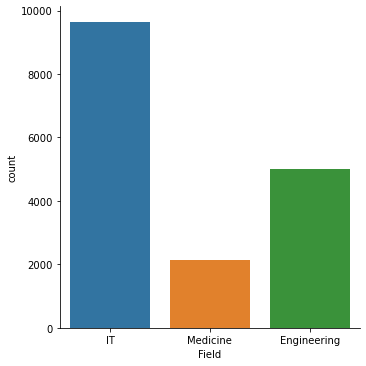

In [72]:
Monster_Fields = sns.catplot(x="Field", kind="count", data=MONSTERPH_COMPILED_DF)

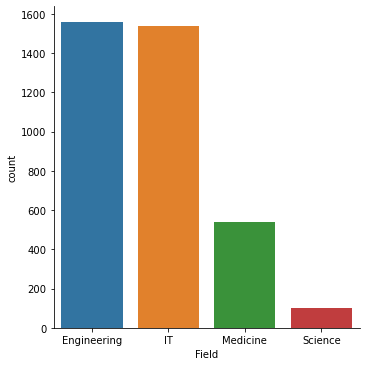

In [74]:
PinoyJobs_Fields = sns.catplot(x="Field", kind="count", data=PINOYJOBS_COMPILED_DF)

In [ ]:
Joblum_Field = sns.catplot(x="Field", kind="count", data=JOBLUM_COMPILED_DF)

In [ ]:
#Create PieChart JOBS_COMPILED_DF
JOBS_GB_Field = JOBS_COMPILED_DF.groupby(["Field"]).size().reset_index(name='counts')
JOBS_GB_Field.plot.pie(y='counts', figsize=(20, 20),autopct='%1.1f%%',labels=JOBS_GB_Field["Field"],
        shadow=True, startangle=90)

In [ ]:
#Create PieChart JOBS_COMPILED_DF
JOBS_GB_WEBSITE = JOBS_COMPILED_DF.groupby(["Website"]).size().reset_index(name='counts')
JOBS_GB_WEBSITE.plot.pie(y='counts', figsize=(20, 20),autopct='%1.1f%%',labels=JOBS_GB_WEBSITE["Website"],
        shadow=True, startangle=90)

In [ ]:
JOBS_COMPILED_DF_MinS_plot = sns.catplot(x="Field", y="Min Salary", kind="bar",data=JOBS_COMPILED_DF)

In [ ]:
JOBS_COMPILED_DF_MinS_plot = sns.catplot(x="Field", y="Max Salary", kind="bar",data=JOBLUM_COMPILED_DF)

In [ ]:
JOBS_GB_DateP = JOBS_COMPILED_DF.groupby(["Date Posted"]).size().reset_index(name='counts')